# Readme

This file compiles all the results presented in the article.

# Setup

In [1]:
library ("ggplot2") 
library ("dplyr")  
library ("tibble") 
library ("tidyr") 
library ("kableExtra")
library ("gridExtra")

source ("01_functions/functions.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Data description

In [2]:
pdat = read.csv (file = "00_data/ALFAM2_plot.csv")

In [3]:
pdat$country %>% unique %>% length

[1] 12

In [4]:
pdat$inst %>% unique %>% length

[1] 27

In [5]:
load (file = "02_scripts/00_data_preparation/processed_data/data.Rdata")

In [6]:
dim (data)

[1] 6169   23

In [7]:
head (data, n = 2) %>% embed

e.cum 
 e.rel 
 j.NH3 
 pmid 
 eid 
 exper 
 field 
 meas.tech 
 country 
 inst 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 tan.app 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 t.incorp 
 app.mthd 
 incorp 
 
 
 
 
 7.1480 
 0.0585374 
 1.7870 
 182 
 44 
 1 
 NA 
 micro met 
 DK 
 104 
 4 
 4 
 8.20 
 8.10 
 0 
 122.11 
 31.8 
 3.7 
 7.35 
 pig 
 1000 
 bc 
 none 
 
 
 8.2921 
 0.0679068 
 0.0673 
 182 
 44 
 1 
 NA 
 micro met 
 DK 
 104 
 21 
 17 
 4.45 
 3.98 
 0 
 122.11 
 31.8 
 3.7 
 7.35 
 pig 
 1000 
 bc 
 none

Mean final emissions:

In [8]:
data %>%
    filter (ct == max (ct), .by = pmid) %>%
    pull (e.cum) %>% 
    mean

[1] 15.63652

Corresponding MAE value, assuming normally distributed errors with a standard deviation of 31%:

In [9]:
15.6 * 0.31 * sqrt (2/pi)

[1] 3.85857

Median number of measurements per trial:

In [14]:
data %>%
    count (pmid) %>%
    pull (n) %>%
    median

[1] 8

## Statistical summary

In [43]:
data %>%
    select (app.mthd, pmid) %>%
    distinct %>%
    count (app.mthd)

app.mthd n  
1 bc       213
2 bsth     197
3 cs        12
4 os       119
5 ts       158

In [44]:
data %>%
    select (pmid, incorp) %>%
    distinct %>%
    count (incorp)

incorp  n  
1 deep      4
2 none    643
3 shallow  52

In [45]:
data %>%
    select (pmid, man.source) %>%
    distinct %>%
    count (man.source)

man.source n  
1 cat        485
2 pig        214

In [46]:
data %>%
    select (e.cum, air.temp, rain.rate, wind.2m) %>%
    summary

     e.cum             air.temp       rain.rate          wind.2m        
 Min.   : -0.4468   Min.   :-3.15   Min.   :0.00000   Min.   : 0.06598  
 1st Qu.:  2.5620   1st Qu.: 9.90   1st Qu.:0.00000   1st Qu.: 1.78000  
 Median :  6.7525   Median :13.70   Median :0.00000   Median : 2.74880  
 Mean   : 10.6363   Mean   :13.89   Mean   :0.02534   Mean   : 3.11774  
 3rd Qu.: 14.5970   3rd Qu.:17.70   3rd Qu.:0.00000   3rd Qu.: 4.00000  
 Max.   :125.1400   Max.   :35.24   Max.   :3.48500   Max.   :28.37400  

In [47]:
data %>%
    filter (ct == max (ct), .by = pmid) %>%
    select (ct, app.rate, tan.app, man.dm, man.ph) %>%
    summary

       ct            app.rate         tan.app           man.dm      
 Min.   : 24.00   Min.   :  6.60   Min.   : 10.90   Min.   : 0.772  
 1st Qu.: 93.70   1st Qu.: 19.74   1st Qu.: 37.53   1st Qu.: 4.005  
 Median : 96.55   Median : 28.21   Median : 54.18   Median : 6.590  
 Mean   :113.41   Mean   : 29.38   Mean   : 63.29   Mean   : 6.251  
 3rd Qu.:162.75   3rd Qu.: 35.00   3rd Qu.: 81.44   3rd Qu.: 8.150  
 Max.   :176.27   Max.   :132.60   Max.   :235.40   Max.   :13.800  
     man.ph     
 Min.   :4.300  
 1st Qu.:7.100  
 Median :7.400  
 Mean   :7.384  
 3rd Qu.:7.725  
 Max.   :8.900  

In [48]:
data %>%
    filter (ct == max (ct), .by = pmid) %>%
    filter (incorp != "none") %>%
    select (t.incorp) %>%
    summary

    t.incorp     
 Min.   : 0.000  
 1st Qu.: 0.000  
 Median : 0.000  
 Mean   : 1.768  
 3rd Qu.: 0.000  
 Max.   :24.000  

## Relative emissions

png 
  2

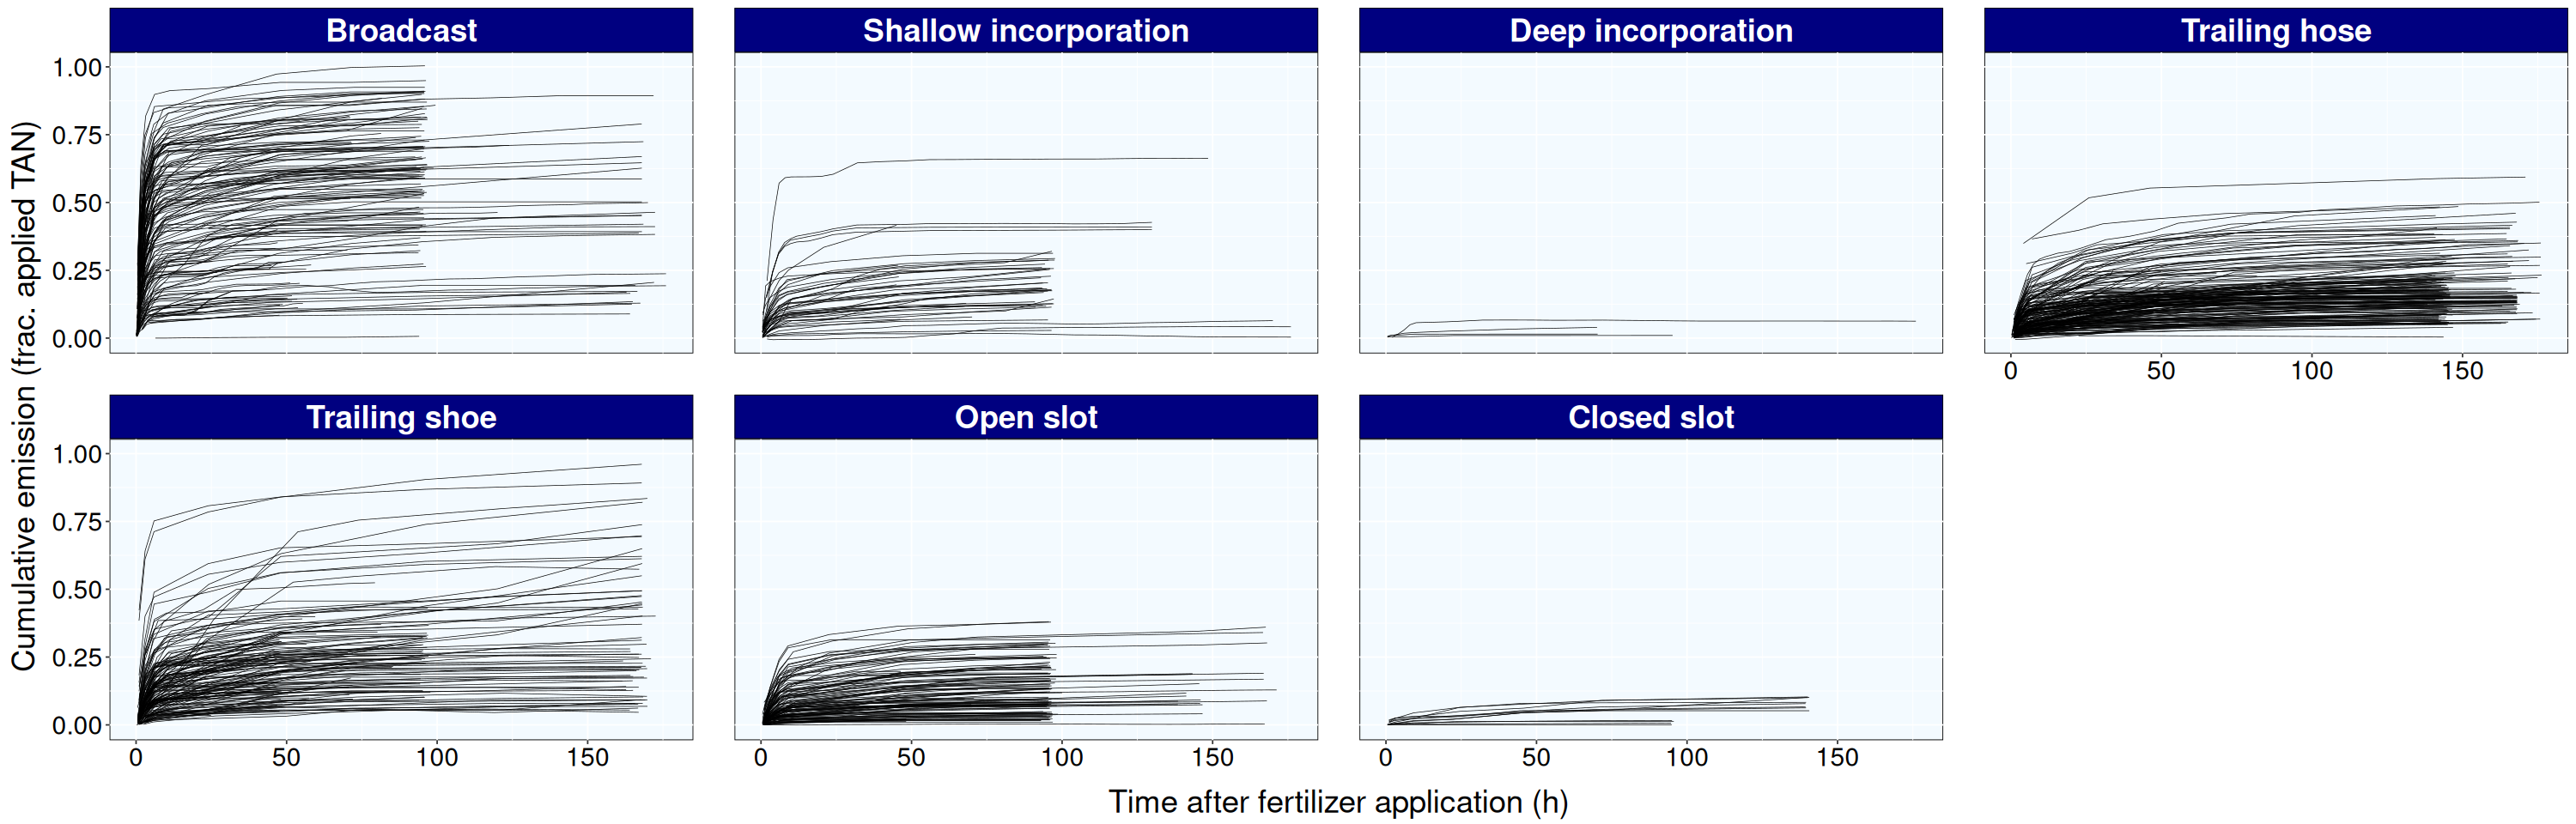

In [49]:
size (25, 8)

figure_data_description_relative_emissions = data %>%

    filter (! (app.mthd == "bsth" & incorp == "shallow")) %>%
    filter (! (app.mthd == "ts" & incorp == "shallow")) %>%

    mutate (strategy = paste (app.mthd, incorp, sep = " - ")) %>%
    mutate (strategy = recode (strategy, 
                               "bc - none" = "Broadcast", "bc - shallow" = "Shallow incorporation", "bc - deep" = "Deep incorporation", 
                               "bsth - none" = "Trailing hose", "os - none" = "Open slot", "cs - none" = "Closed slot", 
                               "ts - none" = "Trailing shoe")) %>%

    mutate (strategy = factor (strategy, levels = c ("Broadcast", "Shallow incorporation", "Deep incorporation", "Trailing hose",
                                                     "Trailing shoe", "Open slot", "Closed slot"))) %>%
    ggplot () +
        geom_line (aes (x = ct, y = e.rel, group = pmid), linewidth = 0.2) +
        facet_wrap (~ strategy, nrow = 2) +

        ylab ("Cumulative emission (frac. applied TAN)") +
        xlab ("Time after fertilizer application (h)")

figure_data_description_relative_emissions

png (file = "03_images/figure_data_description_relative_emissions.png", width = 1200, height = 500)
figure_data_description_relative_emissions
dev.off()

## Empirical efficacies

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


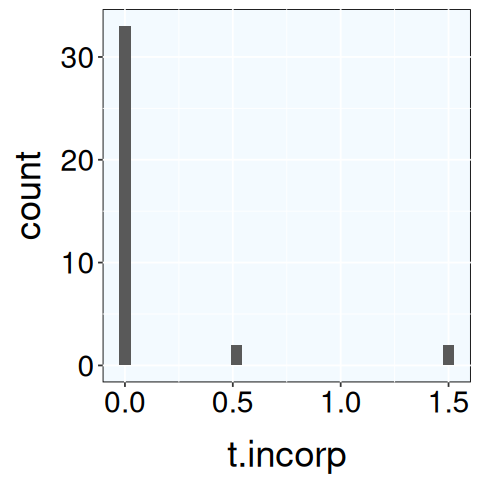

In [50]:
# Time of incorporation for trials involving a broadcast application without incorporation
size (4, 4)
data %>%
    filter (eid %in% eid [app.mthd == "bc" & incorp == "none"]) %>%
    filter (incorp != "none") %>%
    select (pmid, incorp, t.incorp) %>%
    distinct %>%
    ggplot () +
        geom_histogram (aes (x = t.incorp))

The maximum is 1.5; incorporation time will not be considered in the calculation of application technique efficacy. Values of 0, 0.5, and 1.5 will be grouped together under the 0 category.

In the two following experiments (eid = 452 and eid = 661), trial durations differ. To ensure comparability in efficacy calculations, we removed some observations from the trial with the longer duration.

In [51]:
data %>% mutate (id = row_number(), .before = e.cum) %>% filter (eid == 452) %>% embed

id 
 e.cum 
 e.rel 
 j.NH3 
 pmid 
 eid 
 exper 
 field 
 meas.tech 
 country 
 inst 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 tan.app 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 t.incorp 
 app.mthd 
 incorp 
 
 
 
 
 3433 
 2.4145 
 0.0302001 
 2.4145000 
 2527 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 1.0000 
 1.0000 
 5.6 
 0.92108 
 0 
 79.950 
 24.375 
 6.1 
 8 
 pig 
 1000 
 bc 
 none 
 
 
 3434 
 6.2960 
 0.0787492 
 1.9246789 
 2527 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 3.0167 
 2.0167 
 7.7 
 1.02470 
 0 
 79.950 
 24.375 
 6.1 
 8 
 pig 
 1000 
 bc 
 none 
 
 
 3435 
 10.8350 
 0.1355222 
 1.4409524 
 2527 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 6.1667 
 3.1500 
 9.3 
 1.32440 
 0 
 79.950 
 24.375 
 6.1 
 8 
 pig 
 1000 
 bc 
 none 
 
 
 3436 
 14.4940 
 0.1812883 
 1.1803226 
 2527 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 9.2667 
 3.1000 
 7.6 
 1.97650 
 0 
 79.950 
 24.375 
 6.1 
 8 
 pig 
 1000 
 bc 
 none 
 
 
 3437 
 18.9850 
 0.2374609 
 0.3215598 
 2527 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 23.2330 
 13.9663 
 4.7 
 1.56200 
 0 
 79.950 
 24.375 
 6.1 
 8 
 pig 
 1000 
 bc 
 none 
 
 
 3438 
 24.9460 
 0.3120200 
 0.2487170 
 2527 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 47.2000 
 23.9670 
 5.7 
 2.68260 
 0 
 79.950 
 24.375 
 6.1 
 8 
 pig 
 1000 
 bc 
 none 
 
 
 3439 
 27.8860 
 0.3487930 
 0.1203291 
 2527 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 71.6330 
 24.4330 
 6.8 
 2.55500 
 0 
 79.950 
 24.375 
 6.1 
 8 
 pig 
 1000 
 bc 
 none 
 
 
 3440 
 29.5670 
 0.3698186 
 0.0738901 
 2527 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 94.3830 
 22.7500 
 8.5 
 2.55160 
 0 
 79.950 
 24.375 
 6.1 
 8 
 pig 
 1000 
 bc 
 none 
 
 
 3441 
 0.4811 
 0.0066715 
 0.4811000 
 2528 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 1.0000 
 1.0000 
 5.3 
 0.97429 
 0 
 72.113 
 21.655 
 6.3 
 8 
 pig 
 1000 
 os 
 none 
 
 
 3442 
 1.1826 
 0.0163993 
 0.3659936 
 2528 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 2.9167 
 1.9167 
 7.4 
 0.97003 
 0 
 72.113 
 21.655 
 6.3 
 8 
 pig 
 1000 
 os 
 none 
 
 
 3443 
 2.2930 
 0.0317973 
 0.3581935 
 2528 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 6.0167 
 3.1000 
 9.3 
 1.27120 
 0 
 72.113 
 21.655 
 6.3 
 8 
 pig 
 1000 
 os 
 none 
 
 
 3444 
 3.4623 
 0.0480121 
 0.3751845 
 2528 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 9.1333 
 3.1166 
 7.8 
 1.96810 
 0 
 72.113 
 21.655 
 6.3 
 8 
 pig 
 1000 
 os 
 none 
 
 
 3445 
 4.5734 
 0.0634199 
 0.0762767 
 2528 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 23.7000 
 14.5667 
 4.8 
 1.54650 
 0 
 72.113 
 21.655 
 6.3 
 8 
 pig 
 1000 
 os 
 none 
 
 
 3446 
 6.8400 
 0.0948511 
 0.0949679 
 2528 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 47.5670 
 23.8670 
 5.7 
 2.69130 
 0 
 72.113 
 21.655 
 6.3 
 8 
 pig 
 1000 
 os 
 none 
 
 
 3447 
 8.6466 
 0.1199035 
 0.0754857 
 2528 
 452 
 B2002-13 
 Slootdorp 
 IHF 
 NL 
 214 
 71.5000 
 23.9330 
 6.9 
 2.58500 
 0 
 72.113 
 21.655 
 6.3 
 8 
 pig 
 1000 
 os 
 none

For eid 452, line with id = 3440 will be removed.

In [52]:
data %>% mutate (id = row_number(), .before = e.cum) %>% filter (eid == 661) %>% embed

id 
 e.cum 
 e.rel 
 j.NH3 
 pmid 
 eid 
 exper 
 field 
 meas.tech 
 country 
 inst 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 tan.app 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 t.incorp 
 app.mthd 
 incorp 
 
 
 
 
 5543 
 8.79110 
 0.1837489 
 11.9879181 
 3291 
 661 
 G1997-25 
 203-Zegveld 
 IHF 
 NL 
 214 
 0.73333 
 0.73333 
 14.8 
 3.3296 
 0 
 47.843 
 20.801 
 7.1 
 7.1 
 cat 
 1000 
 bc 
 none 
 
 
 5544 
 17.66600 
 0.3692494 
 8.7293812 
 3291 
 661 
 G1997-25 
 203-Zegveld 
 IHF 
 NL 
 214 
 1.75000 
 1.01667 
 15.7 
 3.4283 
 0 
 47.843 
 20.801 
 7.1 
 7.1 
 cat 
 1000 
 bc 
 none 
 
 
 5545 
 24.50800 
 0.5122588 
 4.8295334 
 3291 
 661 
 G1997-25 
 203-Zegveld 
 IHF 
 NL 
 214 
 3.16670 
 1.41670 
 16.9 
 3.2974 
 0 
 47.843 
 20.801 
 7.1 
 7.1 
 cat 
 1000 
 bc 
 none 
 
 
 5546 
 32.10400 
 0.6710282 
 2.5320000 
 3291 
 661 
 G1997-25 
 203-Zegveld 
 IHF 
 NL 
 214 
 6.16670 
 3.00000 
 17.2 
 3.3145 
 0 
 47.843 
 20.801 
 7.1 
 7.1 
 cat 
 1000 
 bc 
 none 
 
 
 5547 
 34.77600 
 0.7268775 
 0.4902482 
 3291 
 661 
 G1997-25 
 203-Zegveld 
 IHF 
 NL 
 214 
 11.61700 
 5.45030 
 15.5 
 3.1296 
 0 
 47.843 
 20.801 
 7.1 
 7.1 
 cat 
 1000 
 bc 
 none 
 
 
 5548 
 35.17000 
 0.7351128 
 0.0323853 
 3291 
 661 
 G1997-25 
 203-Zegveld 
 IHF 
 NL 
 214 
 23.78300 
 12.16600 
 10.1 
 1.3545 
 0 
 47.843 
 20.801 
 7.1 
 7.1 
 cat 
 1000 
 bc 
 none 
 
 
 5549 
 36.93900 
 0.7720879 
 0.0718609 
 3291 
 661 
 G1997-25 
 203-Zegveld 
 IHF 
 NL 
 214 
 48.40000 
 24.61700 
 14.8 
 1.7941 
 0 
 47.843 
 20.801 
 7.1 
 7.1 
 cat 
 1000 
 bc 
 none 
 
 
 5550 
 37.94900 
 0.7931986 
 0.0424959 
 3291 
 661 
 G1997-25 
 203-Zegveld 
 IHF 
 NL 
 214 
 72.16700 
 23.76700 
 15.9 
 2.9992 
 0 
 47.843 
 20.801 
 7.1 
 7.1 
 cat 
 1000 
 bc 
 none 
 
 
 5551 
 39.60400 
 0.8277909 
 0.0696373 
 3291 
 661 
 G1997-25 
 203-Zegveld 
 IHF 
 NL 
 214 
 95.93300 
 23.76600 
 15.0 
 3.9057 
 0 
 47.843 
 20.801 
 7.1 
 7.1 
 cat 
 1000 
 bc 
 none 
 
 
 5552 
 0.63393 
 0.0143145 
 1.0565500 
 3292 
 661 
 G1997-25 
 204-Zegveld 
 IHF 
 NL 
 214 
 0.60000 
 0.60000 
 14.6 
 2.9100 
 0 
 44.286 
 20.130 
 7.3 
 7.0 
 cat 
 1000 
 os 
 none 
 
 
 5553 
 1.37160 
 0.0309714 
 0.6509044 
 3292 
 661 
 G1997-25 
 204-Zegveld 
 IHF 
 NL 
 214 
 1.73330 
 1.13330 
 15.3 
 3.3866 
 0 
 44.286 
 20.130 
 7.3 
 7.0 
 cat 
 1000 
 os 
 none 
 
 
 5554 
 1.91810 
 0.0433117 
 0.3768966 
 3292 
 661 
 G1997-25 
 204-Zegveld 
 IHF 
 NL 
 214 
 3.18330 
 1.45000 
 16.9 
 3.2841 
 0 
 44.286 
 20.130 
 7.3 
 7.0 
 cat 
 1000 
 os 
 none 
 
 
 5555 
 3.30210 
 0.0745631 
 0.4884591 
 3292 
 661 
 G1997-25 
 204-Zegveld 
 IHF 
 NL 
 214 
 6.01670 
 2.83340 
 17.2 
 3.3078 
 0 
 44.286 
 20.130 
 7.3 
 7.0 
 cat 
 1000 
 os 
 none 
 
 
 5556 
 4.40280 
 0.0994174 
 0.2032199 
 3292 
 661 
 G1997-25 
 204-Zegveld 
 IHF 
 NL 
 214 
 11.43300 
 5.41630 
 16.0 
 3.1461 
 0 
 44.286 
 20.130 
 7.3 
 7.0 
 cat 
 1000 
 os 
 none 
 
 
 5557 
 4.78410 
 0.1080274 
 0.0298263 
 3292 
 661 
 G1997-25 
 204-Zegveld 
 IHF 
 NL 
 214 
 24.21700 
 12.78400 
 10.3 
 1.3968 
 0 
 44.286 
 20.130 
 7.3 
 7.0 
 cat 
 1000 
 os 
 none 
 
 
 5558 
 5.72110 
 0.1291853 
 0.0393697 
 3292 
 661 
 G1997-25 
 204-Zegveld 
 IHF 
 NL 
 214 
 48.01700 
 23.80000 
 14.8 
 1.7668 
 0 
 44.286 
 20.130 
 7.3 
 7.0 
 cat 
 1000 
 os 
 none 
 
 
 5559 
 5.72110 
 0.1291853 
 0.0000000 
 3292 
 661 
 G1997-25 
 204-Zegveld 
 IHF 
 NL 
 214 
 72.01700 
 24.00000 
 15.9 
 2.9587 
 0 
 44.286 
 20.130 
 7.3 
 7.0 
 cat 
 1000 
 os 
 none

In [53]:
df_efficacy = data %>% 

    mutate (id = row_number(), .before = e.cum) %>%

    # For eid 452 and 661: remove the last observation of one trial
    # to align final time points across application techniques:
    filter (! (id %in% c (3440, 5551))) %>% 

    mutate (app.mthd = paste (app.mthd, incorp)) %>%

    # Retain experiments with at least one broadcast application
    filter (eid %in% eid [app.mthd == "bc none"]) %>% 

    # Keep experiments that include at least one non-broadcast application method
    filter (eid %in% eid [app.mthd != "bc none"]) %>%

    filter (ct == max (ct), .by = pmid) %>% 
    select (- j.NH3, - exper, - country, - incorp, - meas.tech, - dt, - field, - id)

df_efficacy$eid %>% unique %>% length

[1] 58

In [54]:
eid_efficacy = df_efficacy$eid %>% unique

All experiments were manually reviewed to ensure that conditions were similar within each experiment across the different application methods — same final time, tan.app, app.rate, etc.

In [55]:
lapply (eid_efficacy, function (i) df_efficacy %>% filter (eid == i))

[[1]]
   e.cum     e.rel pmid eid inst     ct air.temp wind.2m rain.rate tan.app
1 7.1617 0.3072372 1449 243  207 27.517     18.7  2.3944         0  23.310
2 6.7922 0.2369510 1450 243  207 27.167     18.7  2.4696         0  28.665
3 4.2151 0.1262611 1451 243  207 26.983     18.8  2.4492         0  33.384
  app.rate man.dm man.ph man.source t.incorp  app.mthd
1     22.2   3.67    7.1        cat     1000   bc none
2     27.3   3.64    7.1        cat     1000 bsth none
3     32.1   3.61    7.1        cat     1000 bsth none

[[2]]
    e.cum      e.rel pmid eid inst     ct air.temp wind.2m rain.rate tan.app
1 1.98710 0.11999396 1452 244  207 24.833      7.8 0.72260         0  16.560
2 0.97046 0.07481190 1453 244  207 24.150      8.3 0.71181         0  12.972
3 0.62106 0.03534775 1454 244  207 24.900      7.1 2.05990         0  17.570
  app.rate man.dm man.ph man.source t.incorp  app.mthd
1     24.0   3.35    6.8        cat     1000   bc none
2     18.8   3.55    6.9        cat     1000 bsth none
3     25.1   3.01    6.8        cat     1000   ts none

[[3]]
   e.cum      e.rel pmid eid inst    ct air.temp wind.2m rain.rate tan.app
1 5.1260 0.28233091 1455 245  207 25.35     19.0 0.45693         0  18.156
2 1.4213 0.09114403 1456 245  207 25.85     19.0 0.45693         0  15.594
3 1.3532 0.10364583 1457 245  207 26.20     19.4 0.44578         0  13.056
  app.rate man.dm man.ph man.source t.incorp  app.mthd
1     26.7   2.90    7.7        cat     1000   bc none
2     22.6   3.32    7.7        cat     1000 bsth none
3     19.2   2.50    7.7        cat     1000   ts none

[[4]]
   e.cum      e.rel pmid eid inst     ct air.temp wind.2m rain.rate tan.app
1 3.4425 0.28042522 1458 246  207 49.517     17.7  1.5731         0  12.276
2 2.1407 0.14200332 1459 246  207 50.017     18.0  1.5045         0  15.075
3 2.0765 0.11229180 1460 246  207 50.517     17.7  1.5686         0  18.492
4 1.0509 0.06579639 1461 246  207 47.300     18.3  1.4692         0  15.972
  app.rate man.dm man.ph man.source t.incorp  app.mthd
1     18.6   2.60    7.7        cat     1000   bc none
2     22.5   2.74    7.7        cat     1000 bsth none
3     27.6   2.63    7.7        cat     1000   ts none
4     24.2   2.52    7.8        cat     1000   os none

[[5]]
   e.cum      e.rel pmid eid inst    ct air.temp wind.2m rain.rate tan.app
1 2.6037 0.12823582 1462 247  207 55.40      2.9 0.76998         0  20.304
2 1.2170 0.05365961 1463 247  207 55.80      2.9 0.56735         0  22.680
3 1.3531 0.08099970 1464 247  207 56.35      2.8 0.65529         0  16.705
  app.rate man.dm man.ph man.source t.incorp  app.mthd
1     28.2   1.04    7.7        cat     1000   bc none
2     31.5   1.04    7.7        cat     1000 bsth none
3     25.7   1.51    7.8        cat     1000   ts none

[[6]]
   e.cum      e.rel pmid eid inst     ct air.temp wind.2m rain.rate tan.app
1 1.6079 0.14745965 1465 248  207 50.283     17.4 1.00440         0  10.904
2 0.6712 0.05745592 1466 248  207 50.033     17.6 0.93739         0  11.682
3 1.4383 0.09380421 1467 248  207 48.083     17.8 0.99329         0  15.333
  app.rate man.dm man.ph man.source t.incorp  app.mthd
1     18.8   2.49    7.2        cat     1000   bc none
2     19.8   2.60    7.3        cat     1000 bsth none
3     26.9   1.72    7.2        cat     1000   ts none

[[7]]
  e.cum       e.rel pmid eid inst  ct air.temp wind.2m rain.rate tan.app
1 9.302 0.237295918 1504 260  208 176      8.4    1.18         0    39.2
2 7.570 0.193112245 1505 260  208 176      8.4    1.18         0    39.2
3 0.143 0.003647959 1506 260  208 176      8.4    1.18         0    39.2
4 1.634 0.041683673 1507 260  208 176      8.4    1.18         0    39.2
  app.rate man.dm man.ph man.source t.incorp   app.mthd
1       49    5.8    7.5        cat     1000    bc none
2       49    5.8    7.5        cat     1000    bc none
3       49    5.8    7.5        cat        0 bc shallow
4       49    5.8    7.5        cat        0 bc shallow

[[8]]
    e.cum     e.rel pmid eid inst

In [56]:
# eid ok
eid_ok = c (243, 244, 245, 246, 247, 248, 384, 452, 455, 456, 561, 562, 567, 569, 594, 595, 596, 599, 
            605, 606, 610, 611, 612, 615, 616, 620, 645, 650, 603, 618, 622, 623, 625, 626, 627, 630, 
            636, 639, 646, 649, 653, 661)

# eid with multiple "bc none" trials => compute the average emissions for "bc none"
eid_with_several_bc_none = c (260, 284, 287, 613, 637, 638, 655, 660, 662, 663, 664, 665, 666, 667)

# eid 628: some trials with cattle and some trials with pig => group by manure source
# and for cattle: two trials with bc method => compute the average for these two trials

# eid 597: 4 trials with a duration close to 45h and 4 trials with a duration close to 70h
# => group by trial duration

# Note: significant variability in the application rate for the following eids:
# 603, 618, 622, 623, 625, 626, 627, 630, 636, 639, 646, 649, 653, 661, 660, 662, 663, 664, 665, 666, 667

In [57]:
# eid ok
df_efficacy_1 = df_efficacy %>% 
    filter (eid %in% eid_ok) 

In [58]:
# for eid with multiple "bc none" trials, we merge these trials into one by averaging the emissions.
# this is necessary in order to compute the efficacy.

df_efficacy_fix1 = df_efficacy %>%

    filter (eid %in% eid_with_several_bc_none) %>% 
    filter (app.mthd == "bc none") %>%

    summarise (e.cum = mean (e.cum),
               e.rel = mean (e.rel),
               pmid = pmid [1],
               inst = inst [1],
               ct = mean (ct),
               air.temp = mean (air.temp),
               wind.2m = mean (wind.2m),
               rain.rate = mean (rain.rate),
               tan.app = mean (tan.app),
               app.rate = mean (app.rate),
               man.dm = mean (man.dm),
               man.ph = mean (man.ph),
               man.source = man.source[1],
               t.incorp = t.incorp[1],
               app.mthd = app.mthd[1],
               .by = eid) %>%

    relocate (eid, .after = pmid)


df_efficacy_fix2 = df_efficacy %>%
    filter (eid %in% eid_with_several_bc_none) %>% 
    filter (app.mthd != "bc none") 

df_efficacy_2 = rbind (
    df_efficacy_fix1,
    df_efficacy_fix2
)

In [59]:
df_efficacy_fix_628 = data %>%
    filter (ct == max (ct), .by = pmid) %>%
    filter (eid == 628)

In [60]:
df_efficacy_fix_628 %>% embed

e.cum 
 e.rel 
 j.NH3 
 pmid 
 eid 
 exper 
 field 
 meas.tech 
 country 
 inst 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 tan.app 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 t.incorp 
 app.mthd 
 incorp 
 
 
 
 
 7.2645 
 0.3149304 
 0.0044440 
 3206 
 628 
 G1990-24 
 12-Luttenberg 
 IHF 
 NL 
 214 
 93.8 
 24.1 
 12.4 
 1.0 
 0 
 23.067 
 9.9 
 8.30 
 7.2 
 cat 
 1000 
 bc 
 none 
 
 
 1.7269 
 0.0338210 
 0.0001818 
 3207 
 628 
 G1990-24 
 14-Luttenberg 
 IHF 
 NL 
 214 
 93.6 
 24.2 
 12.4 
 1.0 
 0 
 51.060 
 22.2 
 8.30 
 7.3 
 cat 
 1000 
 os 
 none 
 
 
 15.4090 
 0.2735973 
 0.0117004 
 3208 
 628 
 G1990-24 
 34-Duiven 
 IHF 
 NL 
 214 
 95.4 
 24.7 
 13.0 
 1.1 
 0 
 56.320 
 8.8 
 11.30 
 7.2 
 pig 
 1000 
 ts 
 none 
 
 
 3.3655 
 0.1701466 
 0.0054777 
 3209 
 628 
 G1990-24 
 35-Duiven 
 IHF 
 NL 
 214 
 94.5 
 24.7 
 13.0 
 1.1 
 0 
 19.780 
 8.6 
 8.45 
 7.2 
 cat 
 1000 
 ts 
 none 
 
 
 25.3100 
 0.4598474 
 0.0253306 
 3210 
 628 
 G1990-24 
 36-Duiven 
 IHF 
 NL 
 214 
 95.5 
 24.2 
 13.0 
 1.1 
 0 
 55.040 
 8.6 
 11.30 
 7.2 
 pig 
 1000 
 bc 
 none 
 
 
 10.8540 
 0.5685699 
 0.0058436 
 3211 
 628 
 G1990-24 
 37-Duiven 
 IHF 
 NL 
 214 
 94.6 
 24.3 
 13.0 
 1.1 
 0 
 19.090 
 8.3 
 8.45 
 7.2 
 cat 
 1000 
 bc 
 none

In [61]:
df_efficacy_fix_628 = df_efficacy %>%
    filter (eid == 628)

df_efficacy_fix3_1 = df_efficacy_fix_628 %>%
    filter (pmid %in% c (3206, 3207)) %>%
    mutate (eid = 1)

df_efficacy_fix3_2 = df_efficacy_fix_628 %>%
    filter (pmid %in% c (3208, 3210)) %>%
    mutate (eid = 2)

df_efficacy_fix3_3 = df_efficacy_fix_628 %>%
    filter (pmid %in% c (3209, 3211)) %>%
    mutate (eid = 3)


In [62]:
df_efficacy_3 = rbind (
    df_efficacy_fix3_1,
    df_efficacy_fix3_2,
    df_efficacy_fix3_3
)

df_efficacy_3

e.cum   e.rel      pmid eid inst ct   air.temp wind.2m rain.rate tan.app
1  7.2645 0.31493042 3206 1   214  93.8 12.4     1.0     0         23.067 
2  1.7269 0.03382099 3207 1   214  93.6 12.4     1.0     0         51.060 
3 15.4090 0.27359730 3208 2   214  95.4 13.0     1.1     0         56.320 
4 25.3100 0.45984738 3210 2   214  95.5 13.0     1.1     0         55.040 
5  3.3655 0.17014661 3209 3   214  94.5 13.0     1.1     0         19.780 
6 10.8540 0.56856993 3211 3   214  94.6 13.0     1.1     0         19.090 
  app.rate man.dm man.ph man.source t.incorp app.mthd
1  9.9      8.30  7.2    cat        1000     bc none 
2 22.2      8.30  7.3    cat        1000     os none 
3  8.8     11.30  7.2    pig        1000     ts none 
4  8.6     11.30  7.2    pig        1000     bc none 
5  8.6      8.45  7.2    cat        1000     ts none 
6  8.3      8.45  7.2    cat        1000     bc none

In [63]:
df_efficacy_fix_597 = df_efficacy %>%
    filter (eid == 597)

df_efficacy_fix_597 %>% embed

e.cum 
 e.rel 
 pmid 
 eid 
 inst 
 ct 
 air.temp 
 wind.2m 
 rain.rate 
 tan.app 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 t.incorp 
 app.mthd 
 
 
 
 
 67.9140 
 0.6898324 
 3128 
 597 
 214 
 46.8 
 12.0 
 3.9 
 0 
 98.45 
 17.9 
 8.82 
 7.725 
 pig 
 1000 
 bc none 
 
 
 27.0300 
 0.2685544 
 3129 
 597 
 214 
 45.5 
 12.0 
 3.9 
 0 
 100.65 
 18.3 
 8.82 
 7.725 
 pig 
 0 
 bc shallow 
 
 
 7.6438 
 0.0780776 
 3130 
 597 
 214 
 70.1 
 10.9 
 4.9 
 0 
 97.90 
 17.8 
 8.82 
 7.725 
 pig 
 0 
 bc shallow 
 
 
 4.1678 
 0.0394678 
 3131 
 597 
 214 
 70.1 
 10.9 
 4.9 
 0 
 105.60 
 19.2 
 8.82 
 7.725 
 pig 
 0 
 bc deep 
 
 
 95.4410 
 0.8185334 
 3132 
 597 
 214 
 70.9 
 11.7 
 5.6 
 0 
 116.60 
 22.0 
 8.20 
 7.725 
 pig 
 1000 
 bc none 
 
 
 54.0340 
 0.4161263 
 3133 
 597 
 214 
 45.0 
 13.0 
 4.6 
 0 
 129.85 
 24.5 
 8.20 
 7.725 
 pig 
 0 
 bc shallow 
 
 
 23.5350 
 0.1964852 
 3134 
 597 
 214 
 45.0 
 13.1 
 4.6 
 0 
 119.78 
 22.6 
 8.20 
 7.725 
 pig 
 0 
 bc shallow 
 
 
 1.8015 
 0.0148430 
 3135 
 597 
 214 
 70.3 
 11.7 
 5.6 
 0 
 121.37 
 22.9 
 8.20 
 7.725 
 pig 
 0 
 bc deep

In [64]:
df_efficacy_4 = df_efficacy_fix_597 %>%
    mutate (eid = c (4, 4, 5, 5, 5, 4, 4, 5)) %>% arrange (eid)

In [65]:
df_efficacy_clean = rbind (df_efficacy_1, df_efficacy_2, df_efficacy_3, df_efficacy_4)

In [66]:
df_plot = df_efficacy_clean %>%
    mutate (efficacy = ((e.rel / e.rel[app.mthd == "bc none"]) - 1) * 100, .by = c (eid))

In [67]:
df_plot$eid %>% unique %>% length

[1] 61

In [68]:
df_plot %>% count (app.mthd)

app.mthd   n 
1 bc deep     3
2 bc none    61
3 bc shallow 34
4 bsth none   7
5 cs none     4
6 os none    34
7 ts none    41

png 
  2

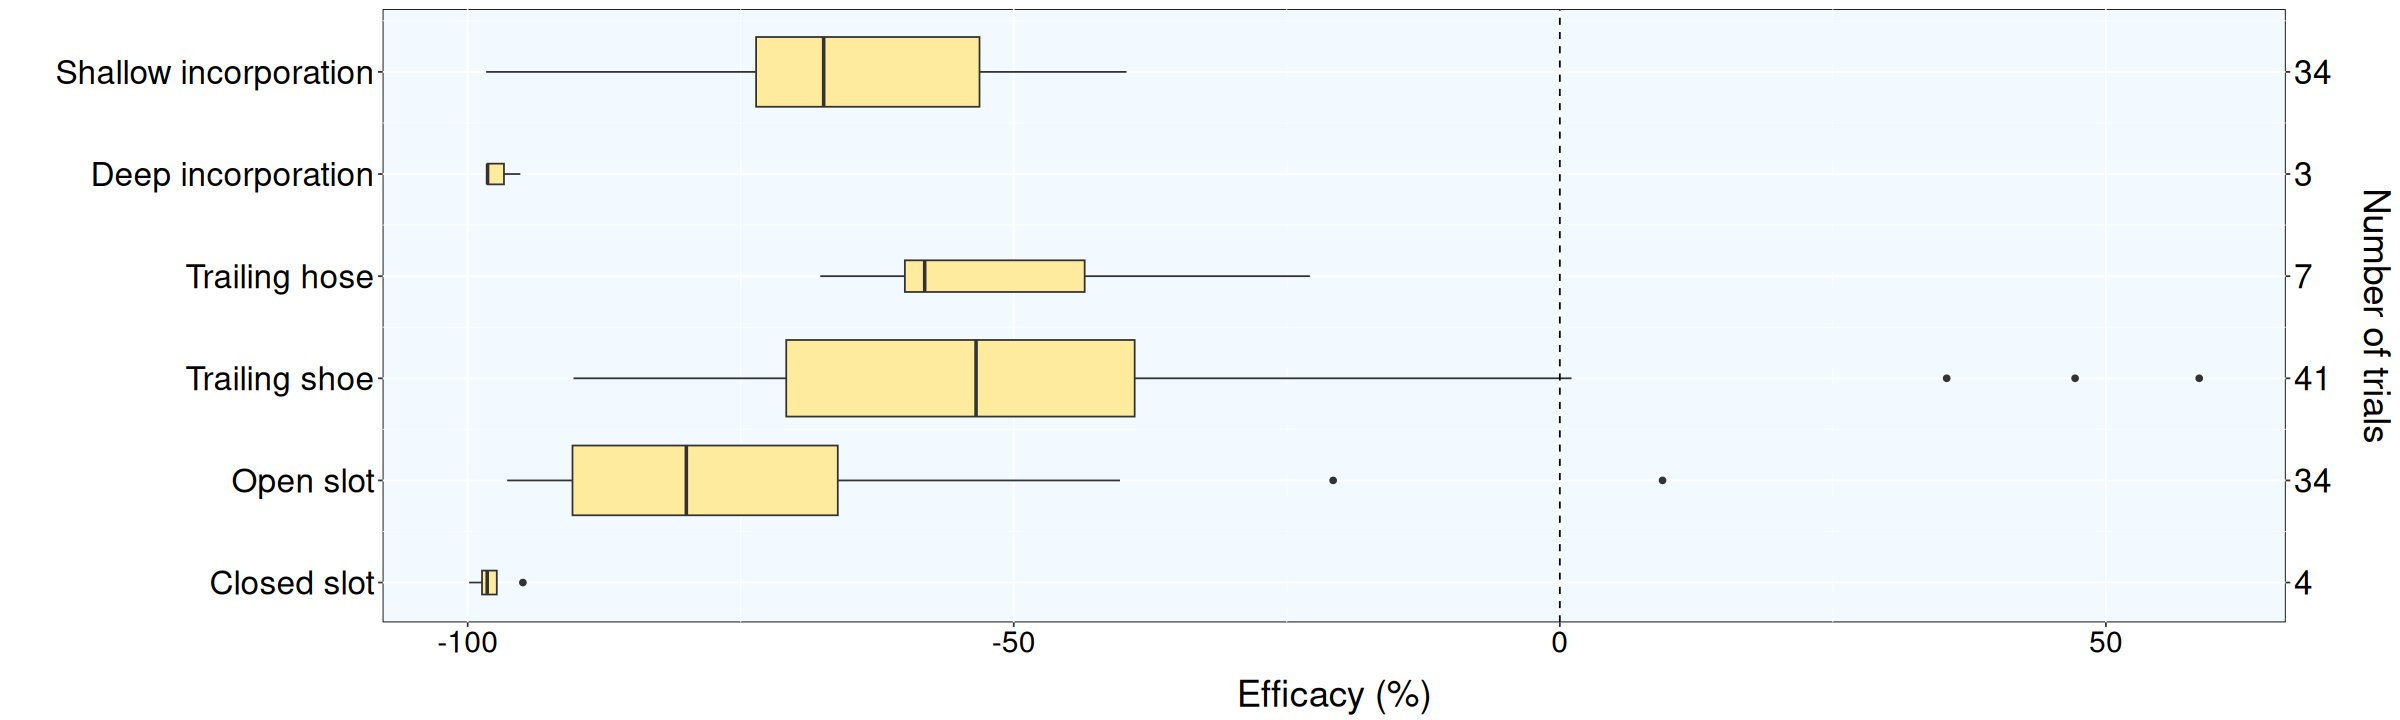

In [69]:
size (20, 6)

df_plot2 = df_plot %>%
    filter (app.mthd != "bc none") %>%

    mutate (Ordonnee = recode (app.mthd, 
                               "cs none" = "1",
                               "os none" = "2",
                               "bsth none" = "4",
                               "ts none" = "3",
                               "bc deep" = "5",
                               "bc shallow" = "6")) %>%

    mutate (app.mthd = recode (app.mthd, 
                               "cs none" = "Closed slot",
                               "os none" = "Open slot",
                               "ts none" = "Trailing shoe",
                               "bsth none" = "Trailing hose",
                               "bc shallow" = "Shallow incorporation",
                               "bc deep" = "Deep incorporation")) %>%

    mutate (app.mthd = factor (app.mthd, levels = c ("Closed slot", "Open slot", "Trailing shoe", "Trailing hose", "Deep incorporation", "Shallow incorporation"))) %>%
    mutate (Ordonnee = as.numeric (Ordonnee)) %>%
    {.}


labels = c("Closed slot", "Open slot", "Trailing shoe", "Trailing hose", "Deep incorporation", "Shallow incorporation")
breaks = c(1 : 6)
number_of_obs = as.character (c (4, 34, 41, 7, 3, 34))


figure_empirical_efficacies = df_plot2 %>%
    ggplot () +
        geom_boxplot (aes (x = efficacy, y = Ordonnee, group = Ordonnee), fill = "#ffeb9d", varwidth = TRUE) +
        geom_vline (aes (xintercept = 0), linetype = 2) +
        scale_y_continuous(
            breaks = breaks, 
            labels = labels,
            sec.axis = sec_axis(~., breaks = breaks, labels = number_of_obs, name = "Number of trials")
        ) +        
        theme (axis.title.y.right = element_text (margin = ggplot2::margin (0, 0, 0, 15))) +
        xlab ("Efficacy (%)") +
        theme (axis.text.y = element_text (size = 20)) +
        ylab ("")

figure_empirical_efficacies

png (file = "03_images/figure_empirical_efficacies.png", width = 1000, height = 400)
figure_empirical_efficacies
dev.off()

# ALFAM2

In [70]:
load (file = "02_scripts/01_ALFAM2/results/df_res_ALFAM2.Rdata")

In [71]:
head (df_res_ALFAM2) %>% embed

e.cum 
 e.rel 
 j.NH3 
 pmid 
 eid 
 exper 
 field 
 meas.tech 
 country 
 inst 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 tan.app 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 t.incorp 
 app.mthd 
 incorp 
 wind.sqrt 
 prediction_ecum 
 sample 
 
 
 
 
 8.6395 
 0.0789789 
 1.8381915 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 4.7 
 4.7 
 11.82 
 7.47 
 0.000000 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 2.733130 
 13.071582 
 1 
 
 
 12.3890 
 0.1132553 
 0.2005080 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 23.4 
 18.7 
 8.68 
 6.75 
 0.000000 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 2.598076 
 16.293183 
 1 
 
 
 14.3920 
 0.1315660 
 0.0953810 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 44.4 
 21.0 
 10.97 
 5.91 
 0.000000 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 2.431049 
 18.598923 
 1 
 
 
 15.8820 
 0.1451869 
 0.0295050 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 94.9 
 50.5 
 12.48 
 5.52 
 0.091089 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 2.349468 
 21.497537 
 1 
 
 
 18.5000 
 0.1691197 
 0.0385000 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 162.9 
 68.0 
 13.03 
 5.91 
 0.041176 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 2.431049 
 22.791687 
 1 
 
 
 1.8680 
 0.0219985 
 0.4151111 
 196 
 58 
 6 
 NA 
 micro met 
 DK 
 104 
 4.5 
 4.5 
 11.82 
 7.47 
 0.000000 
 84.915 
 25.5 
 3.0 
 7.53 
 pig 
 1000 
 bsth 
 none 
 2.733130 
 4.675393 
 1

# Static nn

In [72]:
files <- dir("02_scripts/03_static_nn/results/02_model_comparison/df_res/", pattern = "df_res", full.names = TRUE)

In [73]:
df_res_static_nn <- do.call(rbind, lapply(files, function(x) read.csv(x)))

In [74]:
df_res_static_nn %>% head (2)

sample model pmid e.cum   ct     prediction_ecum running_time
1 0      1     195  18.5000 162.90 18.09439        2.677137    
2 0      1     196   4.5944 162.85 17.14792        2.677137

# Static nn with normalisation

Only the architecture corresponding to the 'static nn 12' model was tested with data renormalization.

In [75]:
files <- dir("02_scripts/03_static_nn/results/03_static_nn_12_with_normalisation/df_res/", pattern = "df_res", full.names = TRUE)

In [76]:
df_res_static_nn_with_normalisation <- do.call(rbind, lapply(files, function(x) read.csv(x)))

In [77]:
df_res_static_nn_with_normalisation %>% head (2)

sample model pmid e.cum   ct     prediction_ecum running_time
1 0      12    195  18.5000 162.90 10.72689        7.003442    
2 0      12    196   4.5944 162.85 11.26087        7.003442

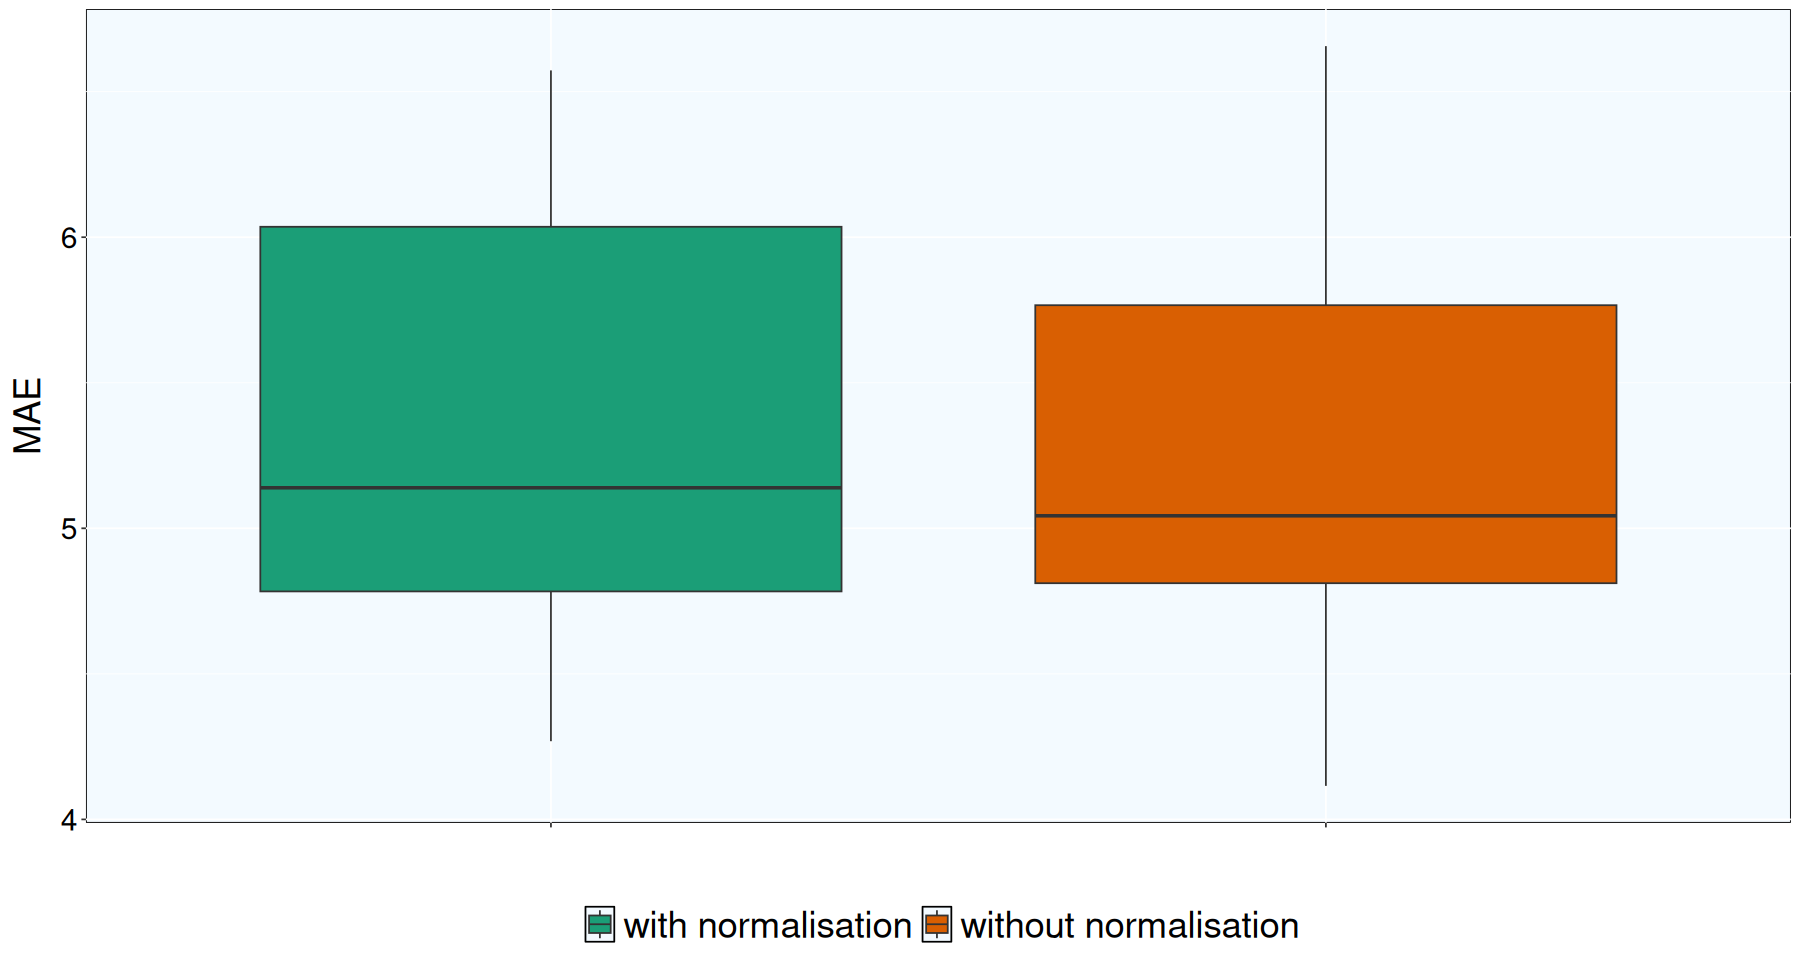

In [78]:
size (15, 8)
rbind (
    df_res_static_nn %>% filter (model == 12) %>% mutate (type = "without normalisation"),
    df_res_static_nn_with_normalisation %>% mutate (type = "with normalisation")
) %>%
    mutate (type = factor (type)) %>%
    summarise (MAE = mean (abs (e.cum - prediction_ecum)), .by = c (sample, type)) %>%

    ggplot () +
        geom_boxplot (aes (x = type, y = MAE, fill = type)) +
        xlab ("") +
        theme (legend.position = "bottom", axis.text.x = element_blank ()) +
        labs (fill = "")

# RNNs

## Hidden size choice

In [79]:
files <- dir("02_scripts/04_rnn/results/04_hidden_size_choice/df_res", pattern = "df_res", full.names = TRUE)

In [80]:
df_selection_of_h <- do.call(rbind, lapply(files, function(x) read.csv(x)))

In [81]:
head (df_selection_of_h, n = 2) %>% embed

model 
 hidden_size 
 with_embeddings 
 min_mae_eval 
 sample 
 running_time 
 
 
 
 
 1 
 16 
 True 
 4.601866 
 0 
 12.667585 
 
 
 2 
 16 
 False 
 4.765752 
 0 
 9.733027

png 
  2

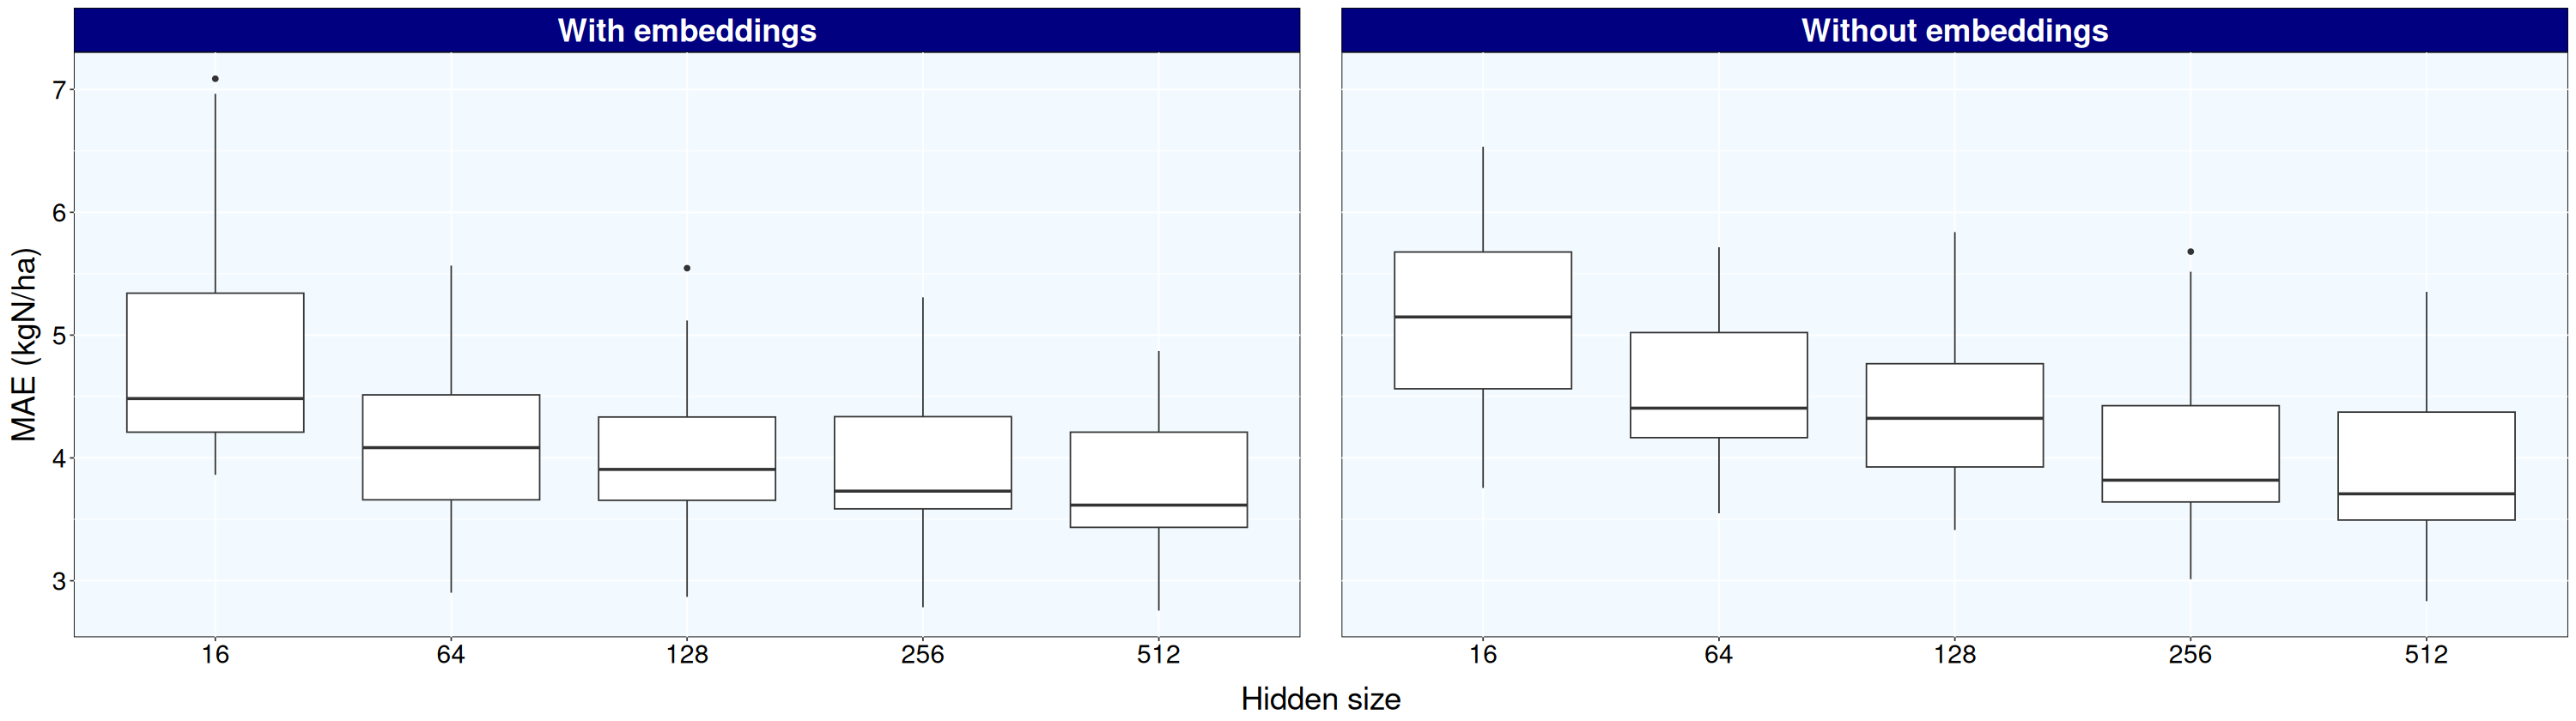

In [82]:
size (25, 7)
figure_choice_of_h = df_selection_of_h %>% 
    mutate (with_embeddings = recode (with_embeddings, "True" = "With embeddings", "False" = "Without embeddings")) %>%
    ggplot () +
        geom_boxplot (aes (x = factor(hidden_size), y = min_mae_eval)) +
        facet_wrap (~ with_embeddings) +
        xlab ("Hidden size") +
        ylab ("MAE (kgN/ha)")

figure_choice_of_h

png (file = "03_images/figure_choice_of_h.png", width = 1000, height = 500)
figure_choice_of_h
dev.off()

## With real data

It corresponds to models 'rnn 1', 'rnn 2', ..., 'rnn 24'.

In [83]:
files <- dir("02_scripts/04_rnn/results/05_1_model_comparison/df_res", pattern = "df_res", full.names = TRUE)

df_res_rnn <- do.call(rbind, lapply(files, function(x) read.csv(x)))

In [84]:
rnn_models = read.csv (file = "02_scripts/04_rnn/results/rnn_models.csv")

df_res_rnn = df_res_rnn %>%
    left_join (rnn_models, by = "model")

In [85]:
df_res_rnn %>% head (n = 2)

sample model pmid e.cum   delta_e.cum ct   dt   air.temp wind.2m rain.rate
1 0      1     195   8.6395 8.6395       4.7  4.7 11.82    7.47    0        
2 0      1     195  12.3890 3.7495      23.4 18.7  8.68    6.75    0        
  prediction_ecum prediction_delta_ecum running_time response bidirectional
1  5.586869       NA                    25.9386      e.cum    True         
2 10.954136       NA                    25.9386      e.cum    True         
  mlp  with_embeddings num_params
1 True True            570474    
2 True True            570474

For models 'rnn 9' to 'rnn 16' using absolute emissions as the target variable, cumulative emissions must be recalculated. For models 'rnn 17' to 'rnn 24', which use the pair (cumulative emissions, absolute emissions) as the target, cumulative emissions need to be computed from the absolute emissions.

In [86]:
df_res_rnn_ecum = df_res_rnn %>%
    filter (model %in% c (1 : 8))

df_res_rnn_delta_ecum = df_res_rnn %>%
    filter (model %in% c (9 : 16))

df_res_rnn_ecum_delta_ecum = df_res_rnn %>%
    filter (model %in% c (17 : 24))

In [87]:
df_res_rnn_delta_ecum = df_res_rnn_delta_ecum %>%
    mutate (prediction_ecum = cumsum (prediction_delta_ecum), .by = c (sample, model, pmid))

In [88]:
df_res_rnn_ecum_delta_ecum_1 = df_res_rnn_ecum_delta_ecum %>%
    mutate (model = paste (model, "ecum"))

In [89]:
df_res_rnn_ecum_delta_ecum_2 = df_res_rnn_ecum_delta_ecum %>%
    mutate (prediction_ecum = cumsum (prediction_delta_ecum), .by = c (sample, model, pmid)) %>%
    mutate (model = paste (model, "delta_ecum"))

In [90]:
df_res_rnn_all = rbind (
    df_res_rnn_ecum %>% mutate (response2 = "ecum"),
    df_res_rnn_delta_ecum %>% mutate (response2 = "delta_ecum"),
    df_res_rnn_ecum_delta_ecum_1 %>% mutate (response2 = "ecum2"),
    df_res_rnn_ecum_delta_ecum_2 %>% mutate (response2 = "delta_ecum2")
)

In [91]:
level_models = c (
    "1", "2", "3", "4", "5", "6", "7", "8",
    "9", "10", "11", "12", "13", "14", "15", "16",
    "17 ecum", "18 ecum", "19 ecum", "20 ecum", "21 ecum", "22 ecum", "23 ecum", "24 ecum",
    "17 delta_ecum", "18 delta_ecum", "19 delta_ecum", "20 delta_ecum", "21 delta_ecum", "22 delta_ecum", "23 delta_ecum", "24 delta_ecum"
)

level_models = paste ("rnn", level_models)

png 
  2

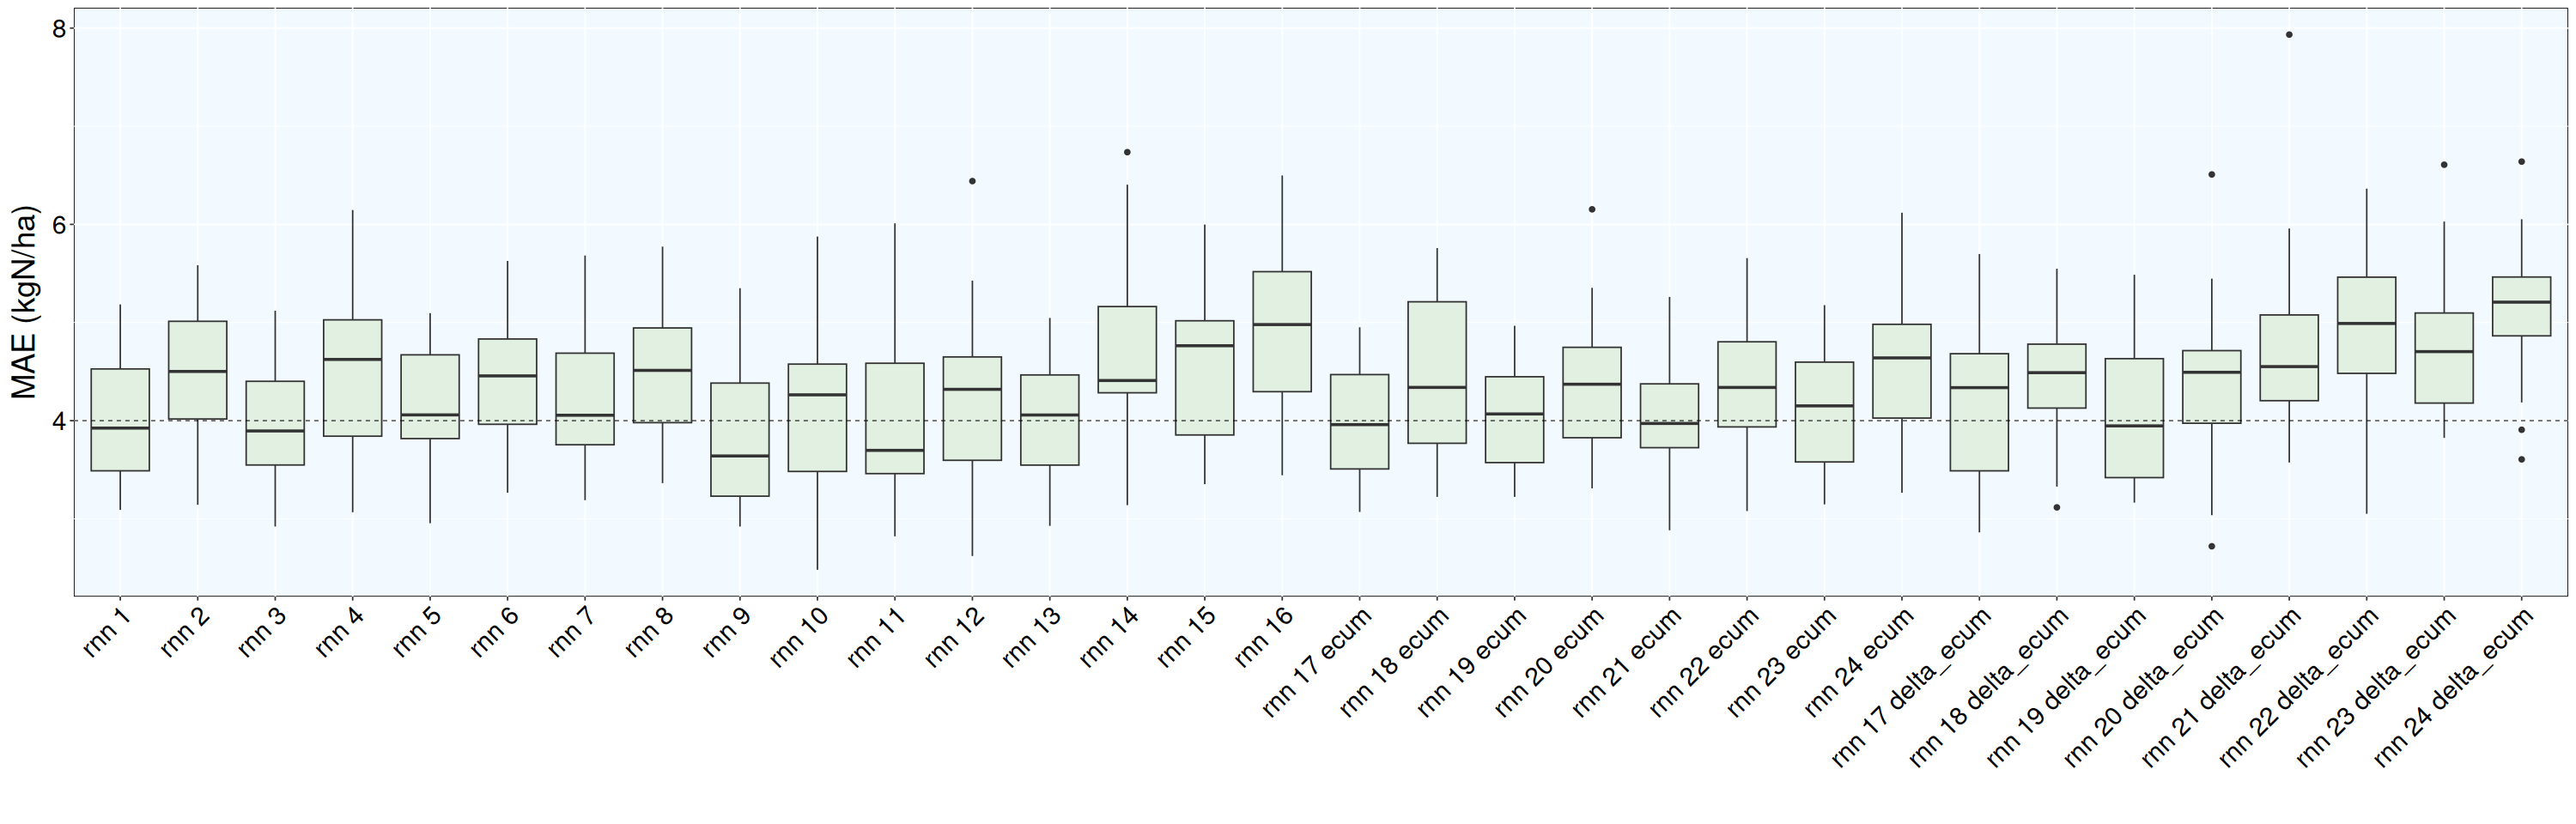

In [92]:
size (25, 8)
figure_rnn_comparison_of_all_models = df_res_rnn_all %>%
    summarise (MAE = mean (abs (e.cum - prediction_ecum)), .by = c (sample, model)) %>%
    mutate (model = paste ("rnn", model)) %>%
    mutate (model = factor (model, levels = level_models)) %>%

    ggplot () +
        geom_boxplot (aes (x = model, y = MAE), fill = "#e1f0e1") +
        theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
        geom_hline (yintercept = 4, linetype = 2, linewidth = 0.3) +
        ylab ("MAE (kgN/ha)") +
        xlab ("")

figure_rnn_comparison_of_all_models

png (file = "03_images/figure_rnn_comparison_of_all_models.png", width = 1200, height = 400)
figure_rnn_comparison_of_all_models
dev.off()

In [93]:
df_res_rnn_all %>% head

sample model pmid e.cum   delta_e.cum ct    dt   air.temp wind.2m rain.rate
1 0      1     195   8.6395 8.6395        4.7  4.7 11.82    7.47    0.000000 
2 0      1     195  12.3890 3.7495       23.4 18.7  8.68    6.75    0.000000 
3 0      1     195  14.3920 2.0030       44.4 21.0 10.97    5.91    0.000000 
4 0      1     195  15.8820 1.4900       94.9 50.5 12.48    5.52    0.091089 
5 0      1     195  18.5000 2.6180      162.9 68.0 13.03    5.91    0.041176 
6 0      1     196   1.8680 1.8680        4.5  4.5 11.82    7.47    0.000000 
  prediction_ecum prediction_delta_ecum running_time response bidirectional
1  5.586869       NA                    25.9386      e.cum    True         
2 10.954136       NA                    25.9386      e.cum    True         
3 15.855942       NA                    25.9386      e.cum    True         
4 20.052640       NA                    25.9386      e.cum    True         
5 21.625322       NA                    25.9386      e.cum    True         
6  2.099327       NA                    25.9386      e.cum    True         
  mlp  with_embeddings num_params response2
1 True True            570474     ecum     
2 True True            570474     ecum     
3 True True            570474     ecum     
4 True True            570474     ecum     
5 True True            570474     ecum     
6 True True            570474     ecum

png 
  2

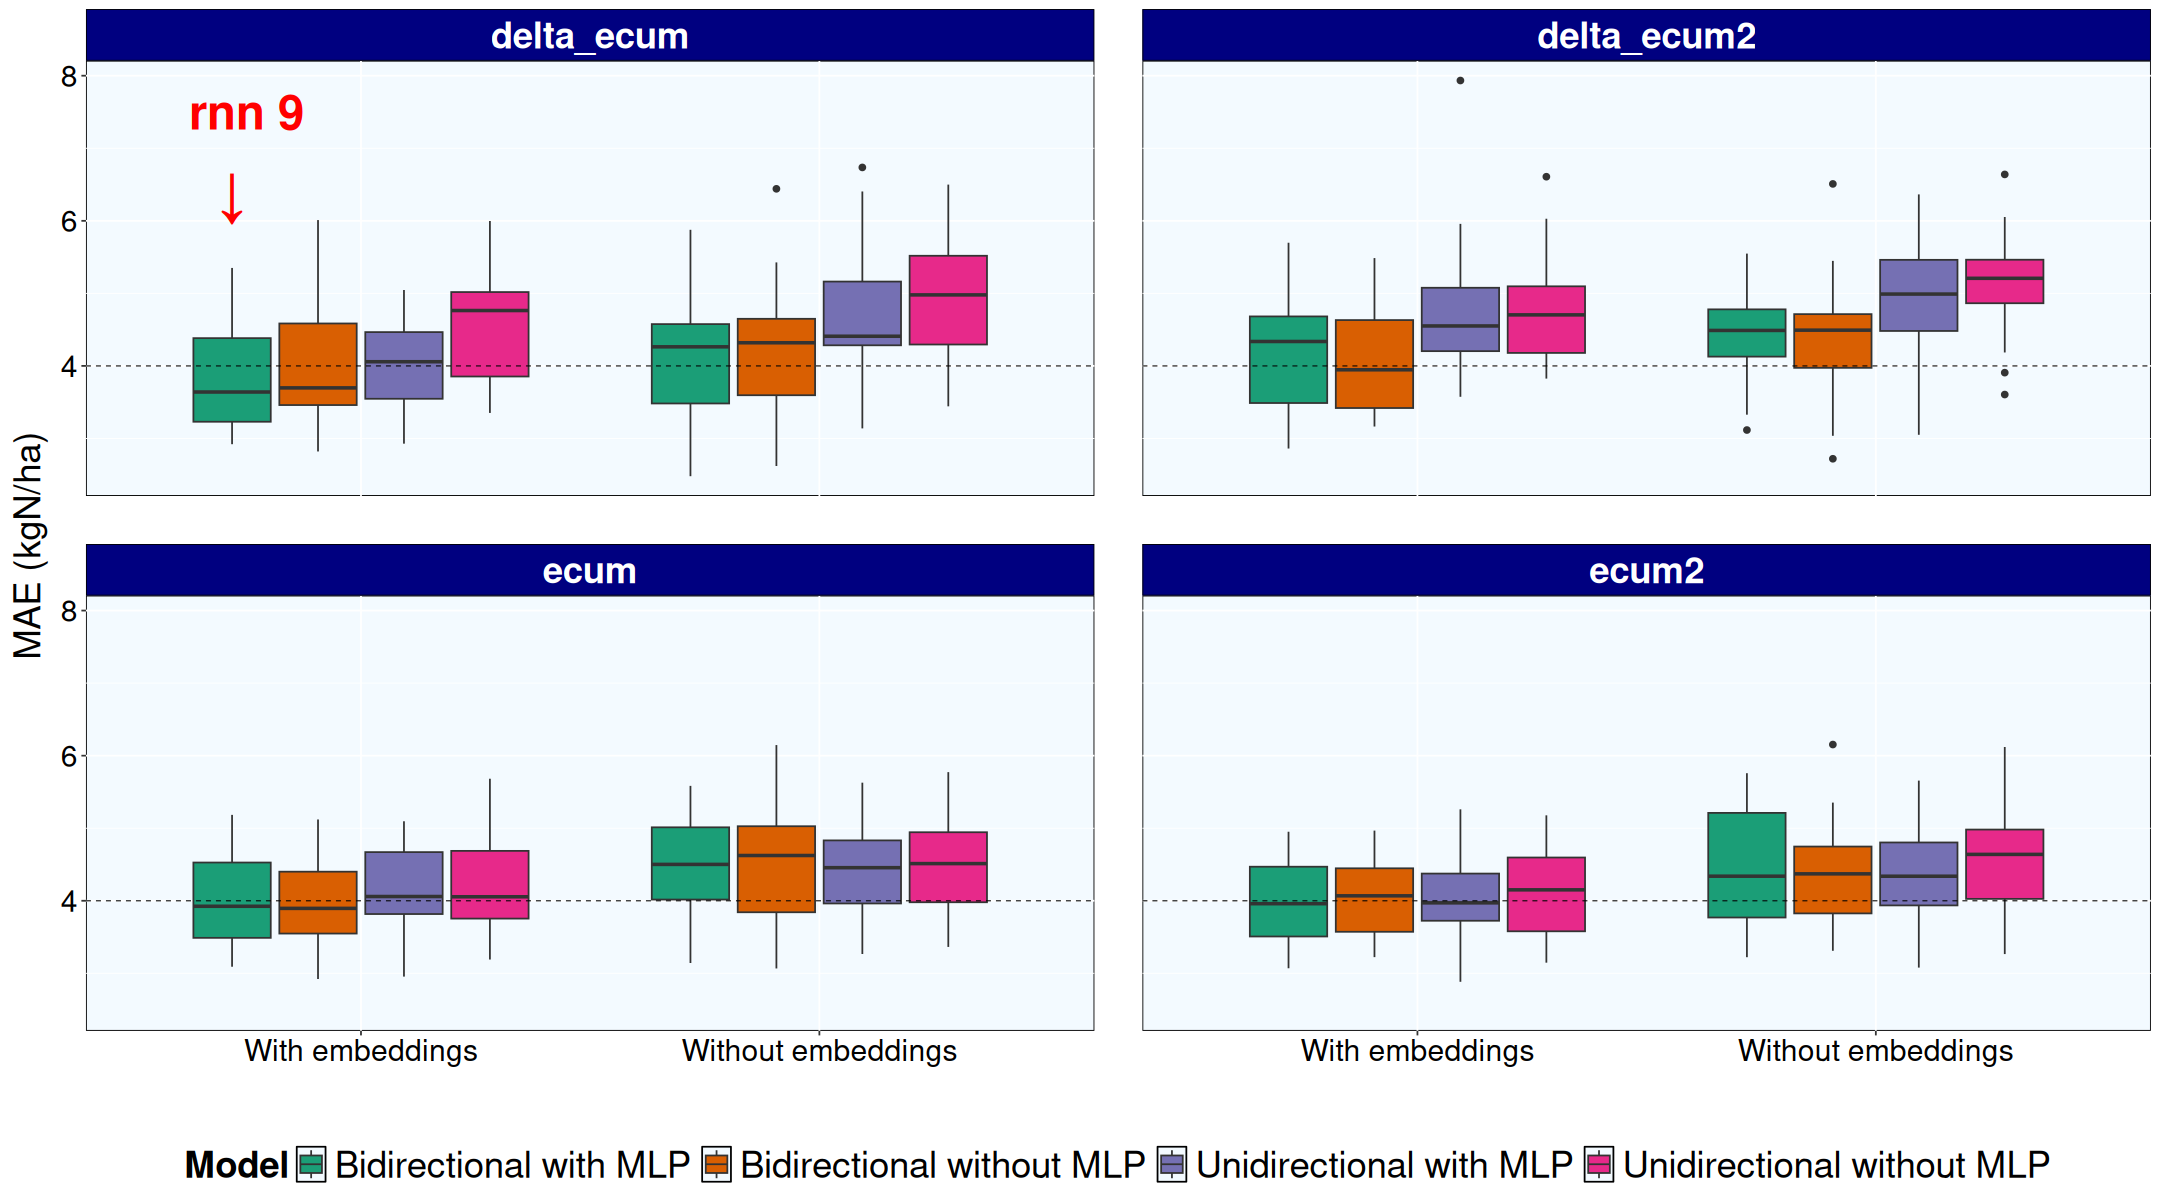

In [94]:
size (18, 10)
figure_rnn_comparison_of_all_models_2 = df_res_rnn_all %>%
    summarise (MAE = mean (abs (e.cum - prediction_ecum)), .by = c (bidirectional, mlp, with_embeddings, sample, response2)) %>%
    mutate (bidi_mlp = paste (bidirectional, mlp)) %>%
    mutate (with_embeddings = recode (with_embeddings, "True" = "With embeddings", "False" = "Without embeddings")) %>%
    mutate (bidi_mlp = recode (
        bidi_mlp,
        "False False" = "Unidirectional without MLP",
        "False True" = "Unidirectional with MLP",
        "True False" = "Bidirectional without MLP",
        "True True" = "Bidirectional with MLP"
    )) %>%

    ggplot () +
        geom_boxplot (aes (x = with_embeddings, y = MAE, fill = bidi_mlp)) +
        facet_wrap (~ response2) +
        labs (fill = "Model") +
        theme (legend.position = "bottom") +
        geom_hline (yintercept = 4, linetype = 2, linewidth = 0.3) +
        xlab ("") +
        #theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
        geom_text (data = data.frame (response2 = factor("delta_ecum", levels = "delta_ecum")), 
                   aes (x = 0.75, y = 7.5, label = "rnn 9"), size = 10, color = "red", fontface = "bold") +
        geom_text (data = data.frame (response2 = factor("delta_ecum", levels = "delta_ecum")), 
                   aes (x = 0.72, y = 6.35, label = "\u2193"), size = 13, color = "red", fontface = "bold") +
        ylab ("MAE (kgN/ha)") +
        NULL

figure_rnn_comparison_of_all_models_2

png (file = "03_images/figure_rnn_comparison_of_all_models_2.png", width = 1200, height = 700)
figure_rnn_comparison_of_all_models_2
dev.off()

## With interpolation

It to corresponds to the model 'rnn 9 - 2'.

In [95]:
head (data, n = 2)

e.cum  e.rel      j.NH3  pmid eid exper field meas.tech country inst ⋯
1 7.1480 0.05853738 1.7870 182  44  1     NA    micro met DK      104  ⋯
2 8.2921 0.06790681 0.0673 182  44  1     NA    micro met DK      104  ⋯
  wind.2m rain.rate tan.app app.rate man.dm man.ph man.source t.incorp app.mthd
1 8.10    0         122.11  31.8     3.7    7.35   pig        1000     bc      
2 3.98    0         122.11  31.8     3.7    7.35   pig        1000     bc      
  incorp
1 none  
2 none

In [96]:
files <- dir("02_scripts/04_rnn/results/05_2_model_comparison_with_interpolation/df_res", pattern = "df_res", full.names = TRUE)

df_res_rnn_with_interpolation <- do.call(rbind, lapply(files, function(x) read.csv(x)))

For this model, predictions were made at a time step of 2. A linear interpolation is therefore performed to obtain predictions at the observed time points. Before performing this interpolation, the value e.cum = 0 must be added at time 0 for all trials.

In [97]:
# Adding e.cum = 0 at t = 0, for all the trials

df_zero = NULL

samples = df_res_rnn_with_interpolation$sample %>% unique

for (i in samples){
    df_sample = df_res_rnn_with_interpolation %>% filter (sample == i)
    pmids = df_sample %>% pull (pmid) %>% unique

    for (k in pmids){
        df_tmp = df_sample %>% filter (pmid == k)
        df_tmp = rbind (
            df_tmp[1, ] %>% mutate (prediction_ecum = 0, ct = 0),
            df_tmp
        )

        df_zero = rbind (df_tmp, df_zero)
    }
}

In [98]:
# Interpolation at measured times

df_res_rnn_interpolated = NULL

for (i in samples){
    df_sample = df_zero %>% filter (sample == i)
    pmids = df_sample %>% pull (pmid) %>% unique

    for (k in pmids){
        df_tmp = df_sample %>% filter (pmid == k)

        df_res_rnn_interpolated_tmp = data %>% filter (pmid == k)

        real_times = df_res_rnn_interpolated_tmp %>% pull (ct) 
        interpolation = approx (df_tmp$ct, df_tmp$prediction_ecum, xout = real_times)

        df_res_rnn_interpolated_tmp = df_res_rnn_interpolated_tmp %>%
            mutate (prediction_ecum = interpolation$y) %>%
            mutate (sample = i)
        
        df_res_rnn_interpolated = rbind (df_res_rnn_interpolated, df_res_rnn_interpolated_tmp)
    }
}

## With data augmentation

It corresponds to the model 'rnn 9 - data a.'.

In [99]:
files <- dir("02_scripts/04_rnn/results/05_3_model_comparison_with_data_augmentation/df_res", pattern = "df_res", full.names = TRUE)

In [100]:
df_res_rnn_with_data_augmentation <- do.call(rbind, lapply(files, function(x) read.csv(x)))

In [101]:
dim (df_res_rnn_with_data_augmentation)

[1] 9976   14

In [102]:
df_res_rnn_with_data_augmentation %>% head (n = 2) %>% embed

sample 
 model 
 n_parameters 
 pmid 
 e.cum 
 delta_e.cum 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 prediction_ecum 
 prediction_delta_ecum 
 running_time 
 
 
 
 
 0 
 1 
 570474 
 195 
 8.6395 
 8.6395 
 4.7 
 4.7 
 11.82 
 7.47 
 0 
 9.764041 
 9.764041 
 268.1685 
 
 
 0 
 1 
 570474 
 195 
 12.3890 
 3.7495 
 23.4 
 18.7 
 8.68 
 6.75 
 0 
 11.815341 
 2.051300 
 268.1685

## With data augmentation and normalisation

In [103]:
files <- dir("02_scripts/04_rnn/results/05_4_model_comparison_with_data_augmentation_with_normalisation/df_res", pattern = "df_res", full.names = TRUE)

In [104]:
df_res_rnn_with_normalisation <- do.call(rbind, lapply(files, function(x) read.csv(x)))

In [105]:
df_res_rnn_with_normalisation %>% head %>% embed

sample 
 model 
 n_parameters 
 pmid 
 e.cum 
 delta_e.cum 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 prediction_ecum 
 prediction_delta_ecum 
 running_time 
 
 
 
 
 0 
 1 
 570474 
 195 
 8.6395 
 8.6395 
 -1.3745800 
 -0.0461916 
 -0.1572488 
 1.7405382 
 -0.2491759 
 8.055802 
 8.0558020 
 265.6435 
 
 
 0 
 1 
 570474 
 195 
 12.3890 
 3.7495 
 -0.9549468 
 2.6242190 
 -0.8195364 
 1.4368648 
 -0.2491759 
 11.450428 
 3.3946261 
 265.6435 
 
 
 0 
 1 
 570474 
 195 
 14.3920 
 2.0030 
 -0.4837009 
 3.0629294 
 -0.3365305 
 1.0825790 
 -0.2491759 
 12.992561 
 1.5421330 
 265.6435 
 
 
 0 
 1 
 570474 
 195 
 15.8820 
 1.4900 
 0.6495331 
 8.6898662 
 -0.0180419 
 0.9180892 
 0.6507855 
 13.702600 
 0.7100383 
 265.6435 
 
 
 0 
 1 
 570474 
 195 
 18.5000 
 2.6180 
 2.1754720 
 12.0278795 
 0.0979639 
 1.0825790 
 0.1576439 
 15.151098 
 1.4484984 
 265.6435 
 
 
 0 
 1 
 570474 
 196 
 1.8680 
 1.8680 
 -1.3790680 
 -0.0843404 
 -0.1572488 
 1.7405382 
 -0.2491759 
 4.785005 
 4.7850050 
 265.6435

In [106]:
dim (df_res_rnn_with_normalisation)

[1] 9976   14

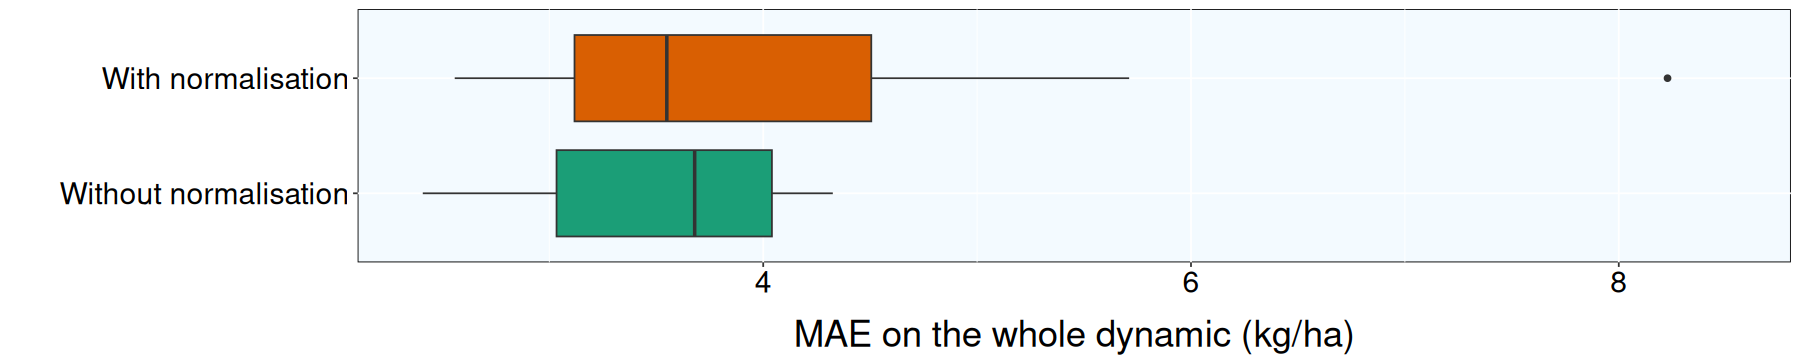

In [107]:
size (15, 3)
rbind (
    df_res_rnn_with_data_augmentation %>%
        mutate (type = factor ("Without normalisation")) %>%
        select (e.cum, prediction_ecum, sample, type),

    df_res_rnn_with_normalisation %>%
        mutate (type = factor ("With normalisation")) %>%
        select (e.cum, prediction_ecum, sample, type)
    
) %>%
    mutate (type = factor (type)) %>%
    summarise (MAE = mean (abs (e.cum - prediction_ecum)), .by = c (sample, type)) %>%

    ggplot () +
        geom_boxplot (aes (y = type, x = MAE, fill = type)) +
        ylab ("") +
        xlab ("MAE on the whole dynamic (kg/ha)") +
        theme (legend.position = "none") +
        expand_limits (x = c (3, 8.5)) +

        labs (fill = "")


In [108]:
size (15, 6)
df_tmp = rbind (
    df_res_rnn_with_data_augmentation %>%
        mutate (type = "Without normalisation", model = "rnn 9 - data a.") %>%
        filter (ct == max (ct), .by = c (pmid, sample)) %>%
        select (e.cum, prediction_ecum, sample, type, model),

    df_res_rnn_with_normalisation %>%
        mutate (type = "With normalisation", model = "rnn 9 - data a.") %>%
        filter (ct == max (ct), .by = c (pmid, sample)) %>%
        select (e.cum, prediction_ecum, sample, type, model),

    df_res_static_nn %>% 
        filter (model == 12) %>% 
        mutate (type = "Without normalisation", model = "static nn 12") %>%
        select (e.cum, prediction_ecum, sample, type, model),

    df_res_static_nn_with_normalisation %>% 
        mutate (type = "With normalisation", model = "static nn 12") %>%
        select (e.cum, prediction_ecum, sample, type, model)
    
)

figure_with_and_without_normalisation = df_tmp %>%

    mutate (type = factor (type)) %>%

    summarise (MAE = mean (abs (e.cum - prediction_ecum)), .by = c (sample, type, model)) %>%

    ggplot () +
        geom_boxplot (aes (y = type, x = MAE, fill = type)) +
        facet_wrap (~ model, ncol = 1) +
        xlab ("MAE on the final cumul (kgN/ha)") +
        ylab ("") +
        expand_limits (x = c (3, 8.5)) +
        theme (legend.position = "none") +
        labs (fill = "")

png (file = "03_images/figure_with_and_without_normalisation.png", width = 1000, height = 400)
figure_with_and_without_normalisation
dev.off()

png 
  2

## Data augmentation and time sequence effect 

In [109]:
load (file = "02_scripts/04_rnn/results/07_time_seq_effect/predictions_without_data_a_on_observed_times.Rdata")

predictions_without_data_a_on_observed_times = predictions_without_data_a_on_observed_times %>%
    mutate (seq = recode (seq, "dt = 2.0" = "dt = 2"))

'predictions_without_data_a_on_observed_times' contains the predictions at the observed time points from the 'rnn 9' model for the 15 test sets, obtained either by directly applying the model at the observed times, or by applying it to a regular time sequence with a step of two, followed by an interpolation step.

In [110]:
head (predictions_without_data_a_on_observed_times, n = 2) %>% embed

e.cum 
 e.rel 
 j.NH3 
 pmid 
 eid 
 exper 
 field 
 meas.tech 
 country 
 inst 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 tan.app 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 t.incorp 
 app.mthd 
 incorp 
 prediction_ecum 
 newpmid 
 test_subset 
 seq 
 
 
 
 
 8.6395 
 0.0789789 
 1.838191 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 4.7 
 4.7 
 11.82 
 7.47 
 0 
 109.39 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 6.000607 
 195 dt = 2.0 
 0 
 dt = 2 
 
 
 12.3890 
 0.1132553 
 0.200508 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 23.4 
 18.7 
 8.68 
 6.75 
 0 
 109.39 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 21.981915 
 195 dt = 2.0 
 0 
 dt = 2

In [111]:
load (file = "02_scripts/04_rnn/results/07_time_seq_effect/predictions_with_data_a_on_observed_times.Rdata")

predictions_with_data_a_on_observed_times = predictions_with_data_a_on_observed_times %>%
    mutate (seq = recode (seq, "dt = 2.0" = "dt = 2", "dt = 4.0" = "dt = 4", "dt = 6.0" = "dt = 6", "dt = 8.0" = "dt = 8", "dt = 10.0" = "dt = 10"))

'predictions_with_data_a_on_observed_times': same as 'predictions_without_data_a_on_observed_times', but for the 'rnn 9 - data a.' model and for multiple time steps (dt = 2, 4, 6, 8, and 10).

In [112]:
pmids_check = predictions_without_data_a_on_observed_times %>%
    filter (test_subset == 1) %>%
    pull (pmid) %>%
    unique

png 
  2

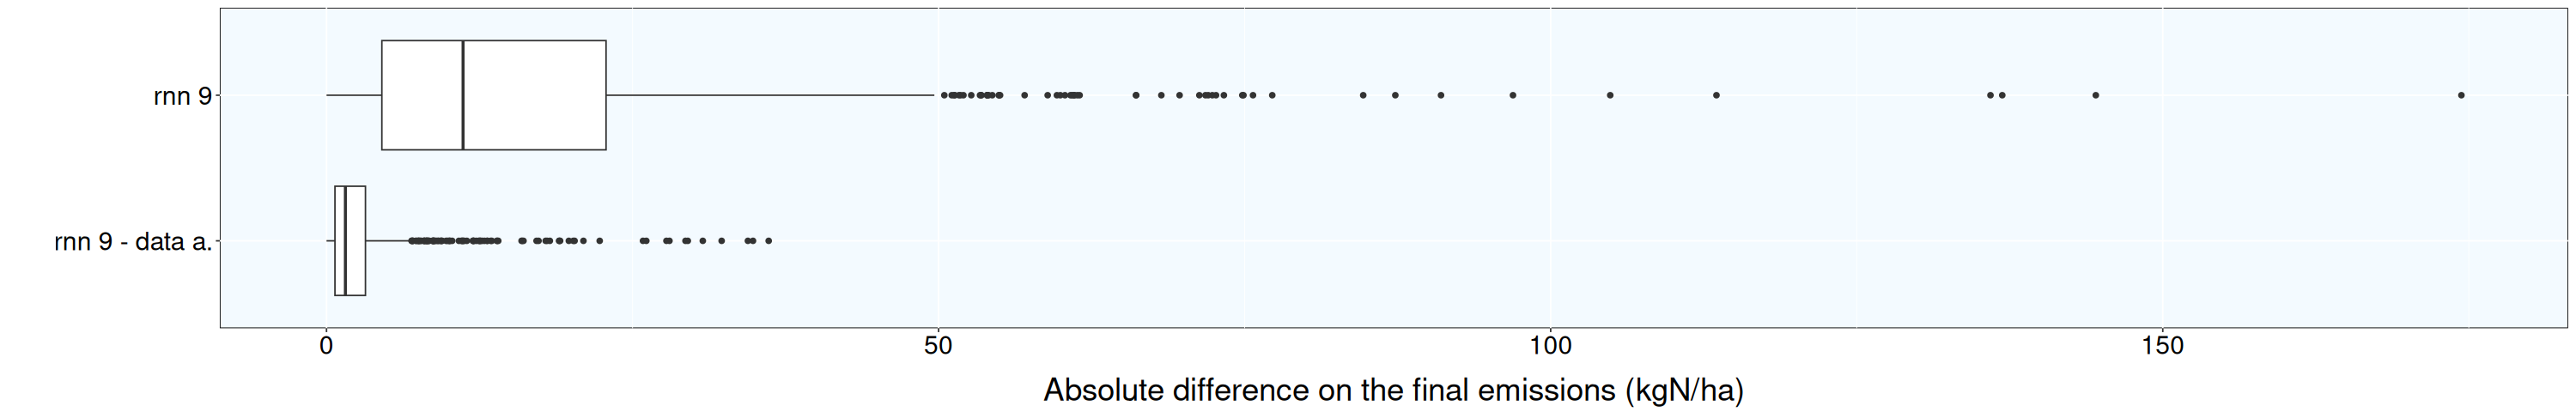

In [113]:
df_comparison = rbind (
    predictions_without_data_a_on_observed_times %>% mutate (model = "Without data augmentation"),
    predictions_with_data_a_on_observed_times %>% mutate (model = "With data augmentation")
)

size (25, 4)
figure_time_sequence_effect_rnn_1 = df_comparison %>%
    mutate (model = recode (model, 
                            "Without data augmentation" = "rnn 9", "With data augmentation" = "rnn 9 - data a.")) %>%
    filter (seq %in% c ("dt = 2", "real times")) %>%
    filter (ct == max (ct), .by = c (test_subset, seq, pmid, model)) %>%
    select (e.cum, prediction_ecum, test_subset, seq, pmid, model) %>%
    pivot_wider (names_from = seq, values_from = prediction_ecum) %>%
    mutate (diff = abs (`dt = 2` - `real times`)) %>%

    ggplot () +
        geom_boxplot (aes (x = diff, y = model)) +
        xlab ("Absolute difference on the final emissions (kgN/ha)") +
        scale_y_discrete (limits = c ("rnn 9 - data a.", "rnn 9")) +
        ylab ("")

figure_time_sequence_effect_rnn_1

png (file = "03_images/figure_time_sequence_effect_rnn_1.png", width = 1000, height = 250)
figure_time_sequence_effect_rnn_1
dev.off()

In [114]:
prediction_example_without_data_a = predictions_without_data_a_on_observed_times %>%
    filter (seq %in% c ("dt = 2", "real times")) %>%
    filter (test_subset == 1 & pmid %in% pmids_check [1:4]) %>%
    select (ct, e.cum, prediction_ecum, test_subset, seq, pmid) %>%
    ggplot () +
        geom_line (aes (x = ct, y = prediction_ecum, color = seq)) +
        ggtitle ("rnn 9") +
        expand_limits (y = c (0, 60)) +
        facet_wrap (~ pmid, nrow = 1) +
        expand_limits (y = c (0, 90)) +
        theme (legend.position = "none") +
        theme (plot.title = element_text (hjust = 0)) +
        xlab ("Time since fertilizer application (h)") +
        ylab ("Predicted emissions (kgN/ha)")

prediction_example_with_data_a = predictions_with_data_a_on_observed_times %>%
    filter (seq %in% c ("dt = 2", "real times")) %>%
    filter (test_subset == 1 & pmid %in% pmids_check [1:4]) %>%
    select (ct, e.cum, prediction_ecum, test_subset, seq, pmid) %>%
    ggplot () +
        geom_line (aes (x = ct, y = prediction_ecum, color = seq)) +
        facet_wrap (~ pmid, nrow = 1) +
        expand_limits (y = c (0, 90)) +
        ggtitle ("rnn 9 - data a.") +
        theme (legend.position = "bottom") +
        theme (plot.title = element_text (hjust = 0)) +
        xlab ("Time since fertilizer application (h)") +
        ylab ("Predicted emissions (kgN/ha)") +
        theme (axis.title.x = element_text (margin = ggplot2::margin (10, 0, 20, 0))) +
        labs (color = "Time sequence")

png 
  2

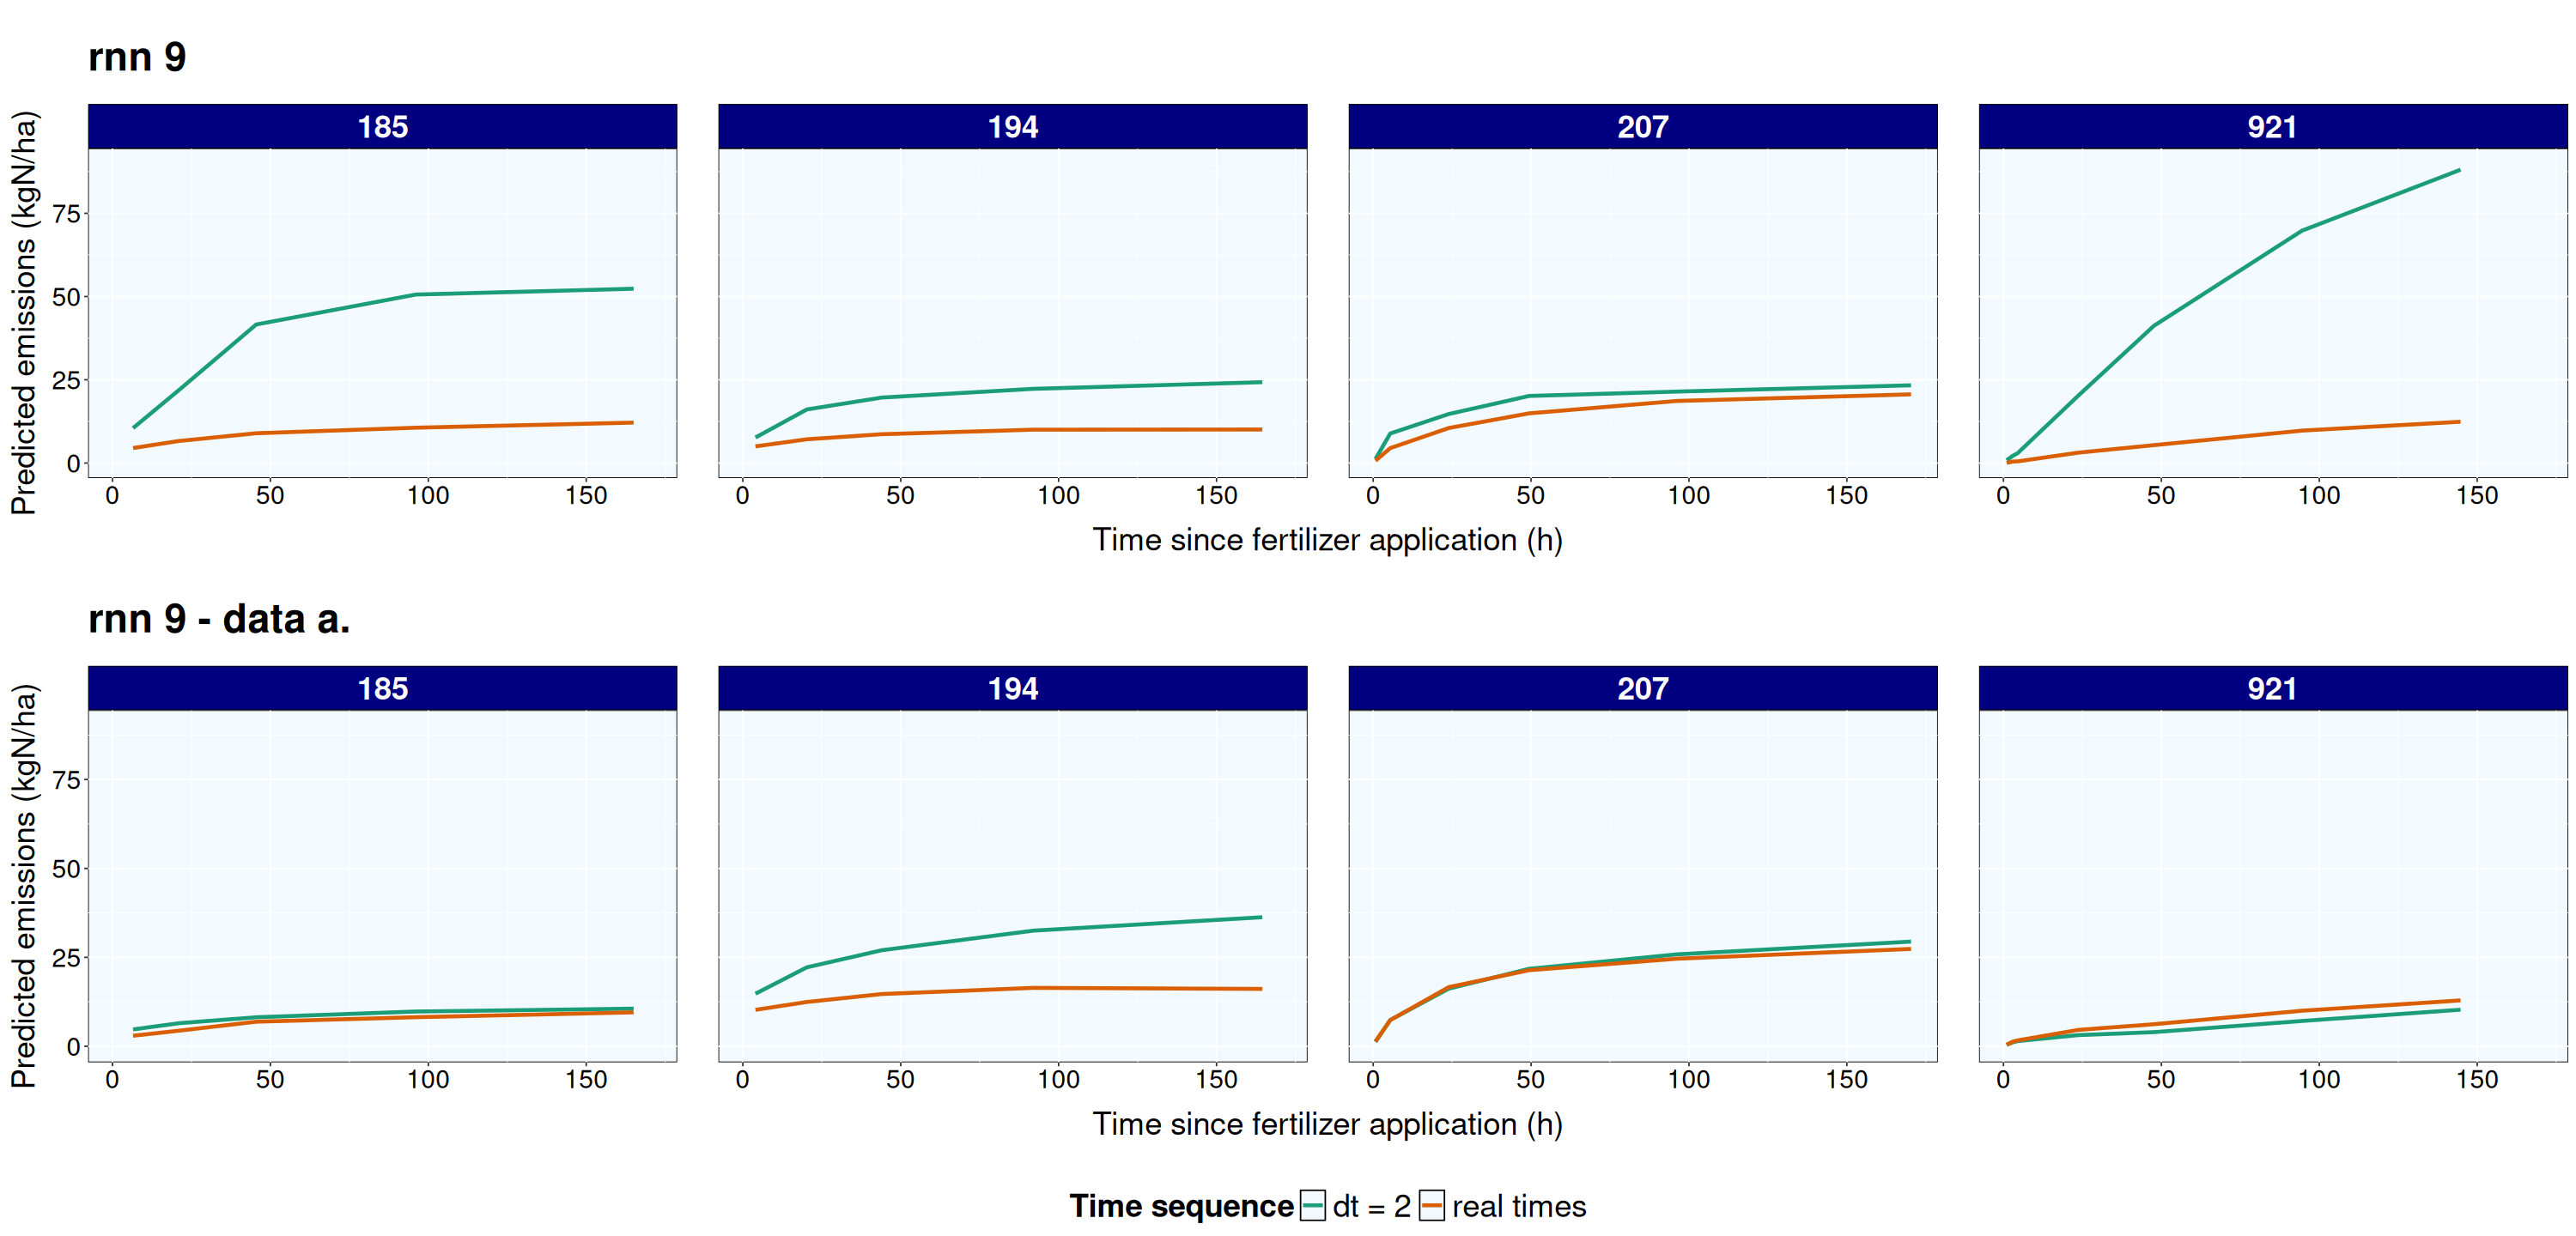

In [115]:
size (25, 12)
grid.arrange (prediction_example_without_data_a, prediction_example_with_data_a, heights = c (1, 1.2))

png (file = "03_images/figure_time_sequence_effect_rnn_2.png", width = 1000, height = 700)
grid.arrange (
    prediction_example_without_data_a + theme (axis.title.y = element_text (size = 16), axis.title.x = element_text (size = 16), plot.title = element_text (size = 22)), 
    prediction_example_with_data_a + theme (axis.title.y = element_text (size = 16), axis.title.x = element_text (size = 16), plot.title = element_text (size = 22)), 
    heights = c (1, 1.2))
dev.off()

png 
  2

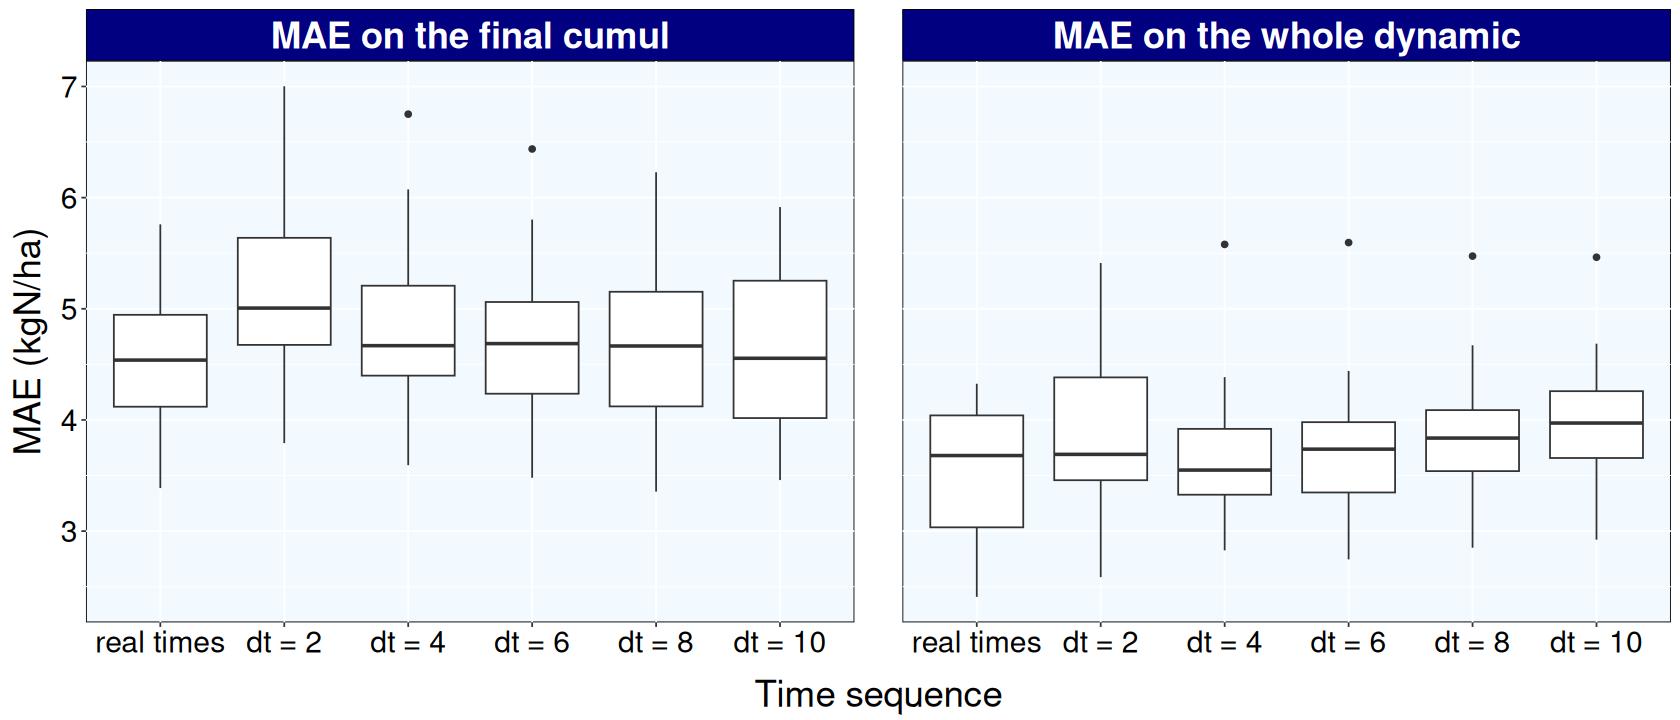

In [116]:
df_plot_final_cumul = predictions_with_data_a_on_observed_times %>%
    filter (ct == max (ct), .by = c (test_subset, seq, pmid)) %>%
    select (e.cum, prediction_ecum, test_subset, seq, pmid) %>%
    summarise (MAE = mean (abs (e.cum - prediction_ecum)), .by = c(test_subset, seq)) 

df_plot_whole_dynamic = predictions_with_data_a_on_observed_times %>%
    select (e.cum, prediction_ecum, test_subset, seq, pmid) %>%
    summarise (MAE = mean (abs (e.cum - prediction_ecum)), .by = c(test_subset, seq)) 

size (14, 6)

figure_time_sequence_effect_rnn_3 = rbind (
    df_plot_final_cumul %>% mutate (group = "MAE on the final cumul"),
    df_plot_whole_dynamic %>% mutate (group = "MAE on the whole dynamic")
) %>%

    mutate (seq = factor (seq, levels = c ("real times", "dt = 2", "dt = 4", "dt = 6", "dt = 8", "dt = 10"))) %>%

    ggplot () +
        geom_boxplot (aes (x = seq, y = MAE)) +
        xlab ("Time sequence") +
        theme (axis.title.x = element_text (margin = ggplot2::margin (10, 0, 0, 0))) +
        facet_wrap (~ group) +
        ylab ("MAE (kgN/ha)")

figure_time_sequence_effect_rnn_3

png (file = "03_images/figure_time_sequence_effect_rnn_3.png", width = 1000, height = 450)
figure_time_sequence_effect_rnn_3
dev.off()

# Static random forest

It corresponds to the 'static rf' model.

In [117]:
load (file = "02_scripts/02_random_forest/results/statique/df_res_random_forest_statique.Rdata")
df_res = df_res_random_forest_statique

In [118]:
df_res_random_forest_statique %>% head (2) %>% embed

e.cum 
 e.rel 
 pmid 
 meas.tech 
 country 
 inst 
 ct 
 tan.app 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 t.incorp 
 app.mthd 
 incorp 
 air_temp_1 
 air_temp_2 
 air_temp_3 
 air_temp_4 
 air_temp_5 
 air_temp_6 
 wind.2m_1 
 wind.2m_2 
 wind.2m_3 
 wind.2m_4 
 wind.2m_5 
 wind.2m_6 
 rain.rate_1 
 rain.rate_2 
 rain.rate_3 
 rain.rate_4 
 rain.rate_5 
 rain.rate_6 
 e.cum_hat 
 sample 
 
 
 
 
 18.5000 
 0.1691197 
 195 
 micro met 
 DK 
 104 
 162.90 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 11.82 
 11.51775 
 10.84610 
 10.17444 
 9.502781 
 11.88444 
 7.47 
 7.400695 
 7.246684 
 7.092674 
 6.938663 
 5.828249 
 0 
 0 
 0 
 0 
 0 
 0.0477052 
 20.00409 
 sample_1 
 
 
 4.5944 
 0.0541059 
 196 
 micro met 
 DK 
 104 
 162.85 
 84.915 
 25.5 
 3.0 
 7.53 
 pig 
 1000 
 bsth 
 none 
 11.82 
 11.48684 
 10.82053 
 10.15422 
 9.487905 
 11.88574 
 7.47 
 7.393607 
 7.240822 
 7.088037 
 6.935252 
 5.827908 
 0 
 0 
 0 
 0 
 0 
 0.0477193 
 13.72990 
 sample_1

In [119]:
df_res %>%
    summarise (MAE = mean (abs (e.cum - e.cum_hat)), .by = sample)

sample    MAE     
1  sample_1  5.454745
2  sample_2  5.725414
3  sample_3  9.053416
4  sample_4  4.825975
5  sample_5  5.715135
6  sample_6  5.083295
7  sample_7  6.069839
8  sample_8  6.014270
9  sample_9  4.605080
10 sample_10 5.489327
11 sample_11 5.656200
12 sample_12 4.513305
13 sample_13 5.283821
14 sample_14 4.910124
15 sample_15 4.781413

# Dynamic random forest

## With real data

It corresponds to the 'dynamic rf' model.

In [120]:
files <- dir("02_scripts/02_random_forest/results/dynamique_without_interpolation/", pattern = "df_res_sample_", full.names = TRUE)

df_res_random_forest_dynamique_without_interpolation <- do.call(rbind, lapply(files, function(x) get(load(x))))

In [121]:
head (df_res_random_forest_dynamique_without_interpolation) %>% embed

e.cum 
 e.rel 
 j.NH3 
 pmid 
 eid 
 exper 
 field 
 meas.tech 
 country 
 inst 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 tan.app 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 t.incorp 
 app.mthd 
 incorp 
 e.cum_hat 
 sample 
 running_time 
 
 
 
 
 8.6395 
 0.0789789 
 1.8381915 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 4.7 
 4.7 
 11.82 
 7.47 
 0.000000 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 8.250697 
 sample_1 
 34.23937 secs 
 
 
 12.3890 
 0.1132553 
 0.2005080 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 23.4 
 18.7 
 8.68 
 6.75 
 0.000000 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 11.288619 
 sample_1 
 34.23937 secs 
 
 
 14.3920 
 0.1315660 
 0.0953810 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 44.4 
 21.0 
 10.97 
 5.91 
 0.000000 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 13.512849 
 sample_1 
 34.23937 secs 
 
 
 15.8820 
 0.1451869 
 0.0295050 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 94.9 
 50.5 
 12.48 
 5.52 
 0.091089 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 15.242374 
 sample_1 
 34.23937 secs 
 
 
 18.5000 
 0.1691197 
 0.0385000 
 195 
 57 
 5 
 NA 
 micro met 
 DK 
 104 
 162.9 
 68.0 
 13.03 
 5.91 
 0.041176 
 109.390 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 16.192814 
 sample_1 
 34.23937 secs 
 
 
 1.8680 
 0.0219985 
 0.4151111 
 196 
 58 
 6 
 NA 
 micro met 
 DK 
 104 
 4.5 
 4.5 
 11.82 
 7.47 
 0.000000 
 84.915 
 25.5 
 3.0 
 7.53 
 pig 
 1000 
 bsth 
 none 
 4.875475 
 sample_1 
 34.23937 secs

## With interpolation

It corresponds to the 'dynamic rf - 2', ..., 'dynamic rf - 10' models.

In [122]:
files <- dir("02_scripts/02_random_forest/results/dynamique", pattern = "df_res_sample_", full.names = TRUE)

df_res_random_forest_dynamique <- do.call(rbind, lapply(files, function(x) get(load(x))))

In [123]:
df_res_random_forest_dynamique %>% head (n = 2) %>% embed

e.cum 
 e.rel 
 j.NH3 
 pmid 
 meas.tech 
 country 
 inst 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 tan.app 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 t.incorp 
 app.mthd 
 incorp 
 e.cum_hat 
 sample 
 running_time 
 
 
 
 
 8.6395 
 0.0789789 
 1.838191 
 195 
 micro met 
 DK 
 104 
 4.7 
 2 
 11.82 
 7.47 
 0 
 109.39 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 8.021116 
 sample_1 
 19.19374 mins 
 
 
 12.3890 
 0.1132553 
 0.200508 
 195 
 micro met 
 DK 
 104 
 23.4 
 2 
 8.68 
 6.75 
 0 
 109.39 
 30.9 
 3.1 
 7.53 
 pig 
 1000 
 bc 
 none 
 10.255831 
 sample_1 
 19.19374 mins

## With data augmentation

It corresponds to the 'dynamic rf - data a.' model.

In [124]:
files <- dir("02_scripts/02_random_forest/results/dynamique_data_a/", pattern = "df_res_sample_", full.names = TRUE)

df_res_random_forest_dynamique_data_a <- do.call(rbind, lapply(files, function(x) get(load(x))))

# Comparison on the final cumul

In [125]:
df_res_all_static = rbind (

    # results for ALFAM2
    df_res_ALFAM2 %>%
        filter (ct == max (ct), .by = pmid) %>%
        select (sample, pmid, e.cum, ct, prediction_ecum) %>%
        mutate (running_time = NA) %>%
        mutate (model = "", .after = sample) %>%
        mutate (model_type = "ALFAM2", .before = sample),

    # results for 'static rf'
    df_res_random_forest_statique %>%
        select (sample, pmid, e.cum, ct, prediction_ecum = e.cum_hat) %>%
        mutate (sample = as.integer (gsub ("sample_", "", sample))) %>%
        mutate (running_time = NA) %>%
        mutate (model = "", .after = sample) %>%
        mutate (model_type = "static rf", .before = sample),

    # results for 'static nn 1', 'static nn 2', ..., 'static nn 12'
    df_res_static_nn %>% 
        mutate (model_type = "static nn", .before = sample)%>%
        mutate (sample = sample + 1),

    # results for 'dynamic rf - 2', 'dynamic rf - 4', ..., 'dynamic rf - 10'
    df_res_random_forest_dynamique %>%
        filter (ct == max (ct), .by = pmid) %>%
        mutate (dt = as.character (dt)) %>%
        mutate (dt = paste ("-", dt)) %>% 
        select (sample, model = dt, pmid, e.cum, ct, prediction_ecum = e.cum_hat, running_time) %>%
        mutate (sample = as.integer (gsub ("sample_", "", sample))) %>%
        mutate (model_type = "dynamic rf", .before = sample),

    # results for 'dyamic rf'
    df_res_random_forest_dynamique_without_interpolation %>%
        filter (ct == max (ct), .by = pmid) %>%
        mutate (model = "") %>%
        select (sample, model, pmid, e.cum, ct, prediction_ecum = e.cum_hat, running_time) %>%
        mutate (sample = as.integer (gsub ("sample_", "", sample))) %>%
        mutate (model_type = "dynamic rf", .before = sample),

    # results for 'dynamic rf - data a.'
    df_res_random_forest_dynamique_data_a %>%
        filter (ct == max (ct), .by = pmid) %>%
        mutate (model = "- data a.") %>%
        select (sample, model, pmid, e.cum, ct, prediction_ecum = e.cum_hat, running_time) %>%
        mutate (sample = as.integer (gsub ("sample_", "", sample))) %>%
        mutate (model_type = "dynamic rf", .before = sample),

    # results for 'rnn 9'
    df_res_rnn_all %>%
        filter (ct == max (ct), .by = pmid) %>%
        filter (model == "9") %>%
        select (sample, model, pmid, e.cum, ct, prediction_ecum, running_time) %>%
        mutate (model_type = "rnn", .before = sample) %>%
        mutate (sample = sample + 1),

    # results for 'rnn 9 - 2'
    df_res_rnn_interpolated %>%
        filter (ct == max (ct), .by = pmid) %>%
        mutate (model = "9 - 2", running_time = NA) %>%
        select (sample, model, pmid, e.cum, ct, prediction_ecum, running_time) %>%
        mutate (model_type = "rnn", .before = sample) %>%
        mutate (sample = sample + 1),

    # results for 'rnn 9 - data a.'
    df_res_rnn_with_data_augmentation %>%
        filter (ct == max (ct), .by = pmid) %>%
        mutate (model = "9 - data a.", running_time = NA) %>%
        select (sample, model, pmid, e.cum, ct, prediction_ecum, running_time) %>%
        mutate (model_type = "rnn", .before = sample) %>%
        mutate (sample = sample + 1)

) %>%
    mutate (Model = paste (model_type, model)) %>%
    mutate (Model = factor (Model, 
                            levels = c ("ALFAM2 ", 
                                        "rnn 9", "rnn 9 - 2", "rnn 9 - data a.", 
                                        "dynamic rf - 2", "dynamic rf - 4", "dynamic rf - 6", "dynamic rf - 8", "dynamic rf - 10", 
                                        "dynamic rf ", "dynamic rf - data a.", 
                                        "static nn 1", "static nn 2", "static nn 3", "static nn 4", "static nn 5", "static nn 6", 
                                        "static nn 7", "static nn 8", "static nn 9", "static nn 10", "static nn 11", "static nn 12", 
                                        "static rf ")))

png 
  2

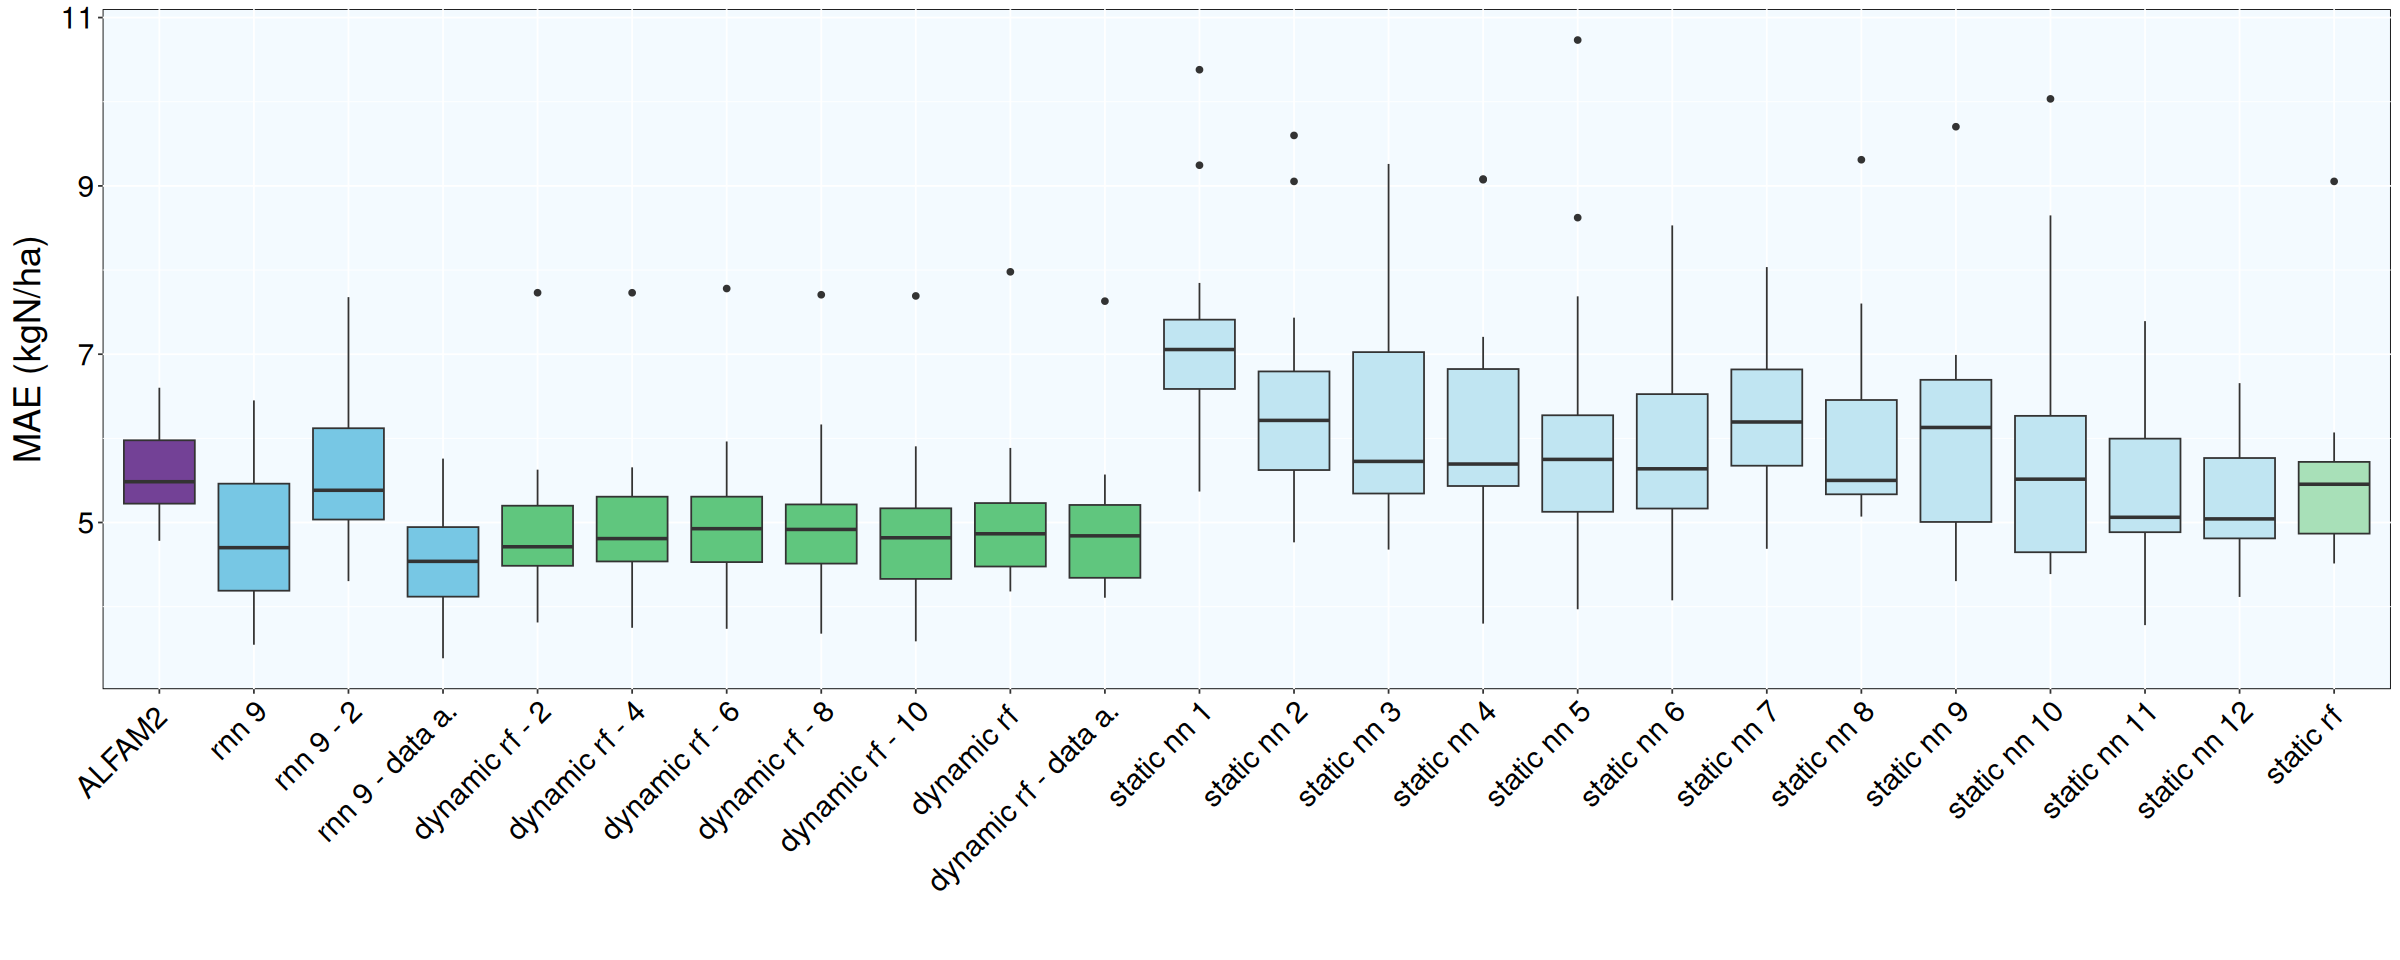

In [126]:
colors = c ("#734196", "#60c67e", "#77c7e4", "#c0e5f2", "#a8e0b8")

size (20, 8)
figure_comparison_on_final_cumul_1 = df_res_all_static %>%

    summarise (MAE = mean (abs (e.cum - prediction_ecum)), model_type = model_type[1], .by = c (sample, Model)) %>%

    ggplot () +
        geom_boxplot (aes (x = Model, y = MAE, fill = model_type)) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1),
              legend.position = "none") +
        scale_fill_manual (values = colors) +
        xlab ("") +
        ylab ("MAE (kgN/ha)") +
        NULL

figure_comparison_on_final_cumul_1

png (file = "03_images/figure_comparison_on_final_cumul_1.png", height = 600, width = 1200)
figure_comparison_on_final_cumul_1
dev.off()

In [127]:
size (20, 8)
df_res_all_static %>%
    filter (Model %in% c ("ALFAM2 ", "rnn 9", "rnn 9 - 2", "rnn 9 - data a.",
                          "dynamic rf - 2", "dynamic rf - 4", "dynamic rf - 6", "dynamic rf - 8", 
                          "dynamic rf - 10", "dynamic rf ", "dynamic rf - data a.", "static nn 12", "static rf ")) %>%

    summarise (MAE = mean (abs (e.cum - prediction_ecum)), model_type = model_type[1], .by = c (sample, Model)) %>%

    summarise (mean_MAE = round (mean (MAE), digits = 2), .by = Model) %>%
    mutate (diff_with_static_rf = round (((mean_MAE [Model == "static rf "] - mean_MAE) / mean_MAE [Model == "static rf "]) * 100 , digit = 2)) %>%
    mutate (diff_with_static_nn12 = round (((mean_MAE [Model == "static nn 12"] - mean_MAE) / mean_MAE [Model == "static nn 12"]) * 100 , digit = 2)) %>%
    mutate (diff_with_ALFAM2 = round (((mean_MAE [Model == "ALFAM2 "] - mean_MAE) / mean_MAE [Model == "ALFAM2 "]) * 100 , digit = 2)) %>%
    mutate (diff_with_rnn9_dataa = round (((mean_MAE [Model == "rnn 9 - data a."] - mean_MAE) / mean_MAE [Model == "rnn 9 - data a."]) * 100 , digit = 2)) %>%

    kable (caption = "Mean MAE and differences with some models") %>%
    kable_styling %>%
    as.character %>% display_html %>%
    {.}

Mean MAE and differences with some models 
 
 
 Model 
 mean_MAE 
 diff_with_static_rf 
 diff_with_static_nn12 
 diff_with_ALFAM2 
 diff_with_rnn9_dataa 
 
 
 
 
 ALFAM2 
 5.61 
 -1.08 
 -6.25 
 0.00 
 -23.03 
 
 
 static rf 
 5.55 
 0.00 
 -5.11 
 1.07 
 -21.71 
 
 
 static nn 12 
 5.28 
 4.86 
 0.00 
 5.88 
 -15.79 
 
 
 dynamic rf - 2 
 4.95 
 10.81 
 6.25 
 11.76 
 -8.55 
 
 
 dynamic rf - 4 
 4.98 
 10.27 
 5.68 
 11.23 
 -9.21 
 
 
 dynamic rf - 6 
 5.03 
 9.37 
 4.73 
 10.34 
 -10.31 
 
 
 dynamic rf - 8 
 5.01 
 9.73 
 5.11 
 10.70 
 -9.87 
 
 
 dynamic rf - 10 
 4.93 
 11.17 
 6.63 
 12.12 
 -8.11 
 
 
 dynamic rf 
 5.05 
 9.01 
 4.36 
 9.98 
 -10.75 
 
 
 dynamic rf - data a. 
 4.95 
 10.81 
 6.25 
 11.76 
 -8.55 
 
 
 rnn 9 
 4.84 
 12.79 
 8.33 
 13.73 
 -6.14 
 
 
 rnn 9 - 2 
 5.67 
 -2.16 
 -7.39 
 -1.07 
 -24.34 
 
 
 rnn 9 - data a. 
 4.56 
 17.84 
 13.64 
 18.72 
 0.00

In [128]:
((5.55 - 5.28) / 5.55) * 100

[1] 4.864865

In [129]:
((4.93 - 4.56) / 4.56) * 100

[1] 8.114035

In [130]:
size (20, 8)
df_res_all_static %>%
    filter (Model %in% c ("ALFAM2 ", "rnn 9", "rnn 9 - 2", "rnn 9 - data a.",
                          "dynamic rf - 2", "dynamic rf - 4", "dynamic rf - 6", "dynamic rf - 8", 
                          "dynamic rf - 10", "dynamic rf ", "dynamic rf - data a.", "static nn 12", "static rf ")) %>%

    summarise (
        MAE = mean (abs (e.cum - prediction_ecum)), 
        MSE = mean ((e.cum - prediction_ecum) ^ 2),
        RMSE = sqrt (mean ((e.cum - prediction_ecum) ^ 2)),
        Pearsons_r = cor (e.cum, prediction_ecum),
        ME = 1 - (sum ( (prediction_ecum - e.cum) ^ 2) / sum ( (e.cum - mean (e.cum)) ^ 2)),
        MBE = mean (prediction_ecum - e.cum),

        model_type = model_type[1], 
        .by = c (sample, Model)
    ) %>%

    summarise (
        mean_MAE = round (mean (MAE), digits = 2), 
        mean_MSE = round (mean (MSE), digits = 2), 
        mean_RMSE = round (mean (RMSE), digits = 2), 
        mean_Pearsons_r = round (mean (Pearsons_r), digits = 2), 
        mean_ME = round (mean (ME), digits = 2), 
        mean_MBE = round (mean (MBE), digits = 2), 
        .by = Model
    ) %>%

    kable (caption = "MAE and other metrics") %>%
    kable_styling %>%
    as.character %>% display_html %>%
    {.}

MAE and other metrics 
 
 
 Model 
 mean_MAE 
 mean_MSE 
 mean_RMSE 
 mean_Pearsons_r 
 mean_ME 
 mean_MBE 
 
 
 
 
 ALFAM2 
 5.61 
 68.51 
 8.16 
 0.82 
 0.66 
 -0.10 
 
 
 static rf 
 5.55 
 81.92 
 8.70 
 0.80 
 0.63 
 0.29 
 
 
 static nn 12 
 5.28 
 65.81 
 8.00 
 0.84 
 0.67 
 0.66 
 
 
 dynamic rf - 2 
 4.95 
 69.38 
 8.04 
 0.83 
 0.67 
 0.03 
 
 
 dynamic rf - 4 
 4.98 
 69.32 
 8.03 
 0.83 
 0.68 
 0.29 
 
 
 dynamic rf - 6 
 5.03 
 70.42 
 8.09 
 0.83 
 0.67 
 0.80 
 
 
 dynamic rf - 8 
 5.01 
 68.78 
 8.01 
 0.84 
 0.68 
 0.77 
 
 
 dynamic rf - 10 
 4.93 
 67.43 
 7.92 
 0.84 
 0.68 
 0.61 
 
 
 dynamic rf 
 5.05 
 68.04 
 7.99 
 0.84 
 0.68 
 0.07 
 
 
 dynamic rf - data a. 
 4.95 
 67.18 
 7.96 
 0.84 
 0.69 
 -0.99 
 
 
 rnn 9 
 4.84 
 51.83 
 7.06 
 0.87 
 0.75 
 -0.73 
 
 
 rnn 9 - 2 
 5.67 
 95.79 
 9.10 
 0.80 
 0.55 
 -0.96 
 
 
 rnn 9 - data a. 
 4.56 
 46.22 
 6.71 
 0.88 
 0.77 
 -0.29

In [131]:
((5.28 - 4.56) / 5.28) * 100

[1] 13.63636

In [132]:
((5.55 - 4.93) / 5.55) * 100

[1] 11.17117

In [133]:
((4.84 - 4.56) / 4.84) * 100

[1] 5.785124

In [134]:
df_res_all_static %>%

    filter (Model %in% c ("ALFAM2 ", "rnn 9", "rnn 9 - 2", "rnn 9 - data a.",
                          "dynamic rf - 2", "dynamic rf - 4", "dynamic rf - 6", "dynamic rf - 8", 
                          "dynamic rf - 10", "dynamic rf ", "dynamic rf - data a.", "static nn 12", "static rf ")) %>%


    left_join (data %>% select (pmid, tan.app) %>% distinct, by = "pmid") %>%
    mutate (e.rel = e.cum / tan.app) %>%
    mutate (prediction_erel = prediction_ecum / tan.app) %>%

    summarise (
        MAE = mean (abs (e.rel - prediction_erel)), 
        ME = 1 - (sum ( (prediction_erel - e.rel) ^ 2) / sum ( (e.rel - mean (e.rel)) ^ 2)),
        model_type = model_type[1], 
        .by = c (sample, Model)
    ) %>%

    summarise (
        mean_MAE = round (mean (MAE), digits = 3), 
        mean_ME = round (mean (ME), digits = 2), 
        .by = Model
    ) %>%

    kable (caption = "Mean MAE and ME on the final relative emissions") %>%
    kable_styling %>%
    as.character %>% display_html %>%
    {.}

    

Mean MAE and ME on the final relative emissions 
 
 
 Model 
 mean_MAE 
 mean_ME 
 
 
 
 
 ALFAM2 
 0.094 
 0.65 
 
 
 static rf 
 0.094 
 0.61 
 
 
 static nn 12 
 0.091 
 0.63 
 
 
 dynamic rf - 2 
 0.083 
 0.68 
 
 
 dynamic rf - 4 
 0.084 
 0.67 
 
 
 dynamic rf - 6 
 0.085 
 0.67 
 
 
 dynamic rf - 8 
 0.084 
 0.68 
 
 
 dynamic rf - 10 
 0.083 
 0.69 
 
 
 dynamic rf 
 0.086 
 0.68 
 
 
 dynamic rf - data a. 
 0.085 
 0.69 
 
 
 rnn 9 
 0.084 
 0.71 
 
 
 rnn 9 - 2 
 0.095 
 0.58 
 
 
 rnn 9 - data a. 
 0.077 
 0.75

In the chunk below, we compute the difference in MAE between the 'rnn 9 - data a.' model and all other models, for each test set. The results are displayed using boxplots.

png 
  2

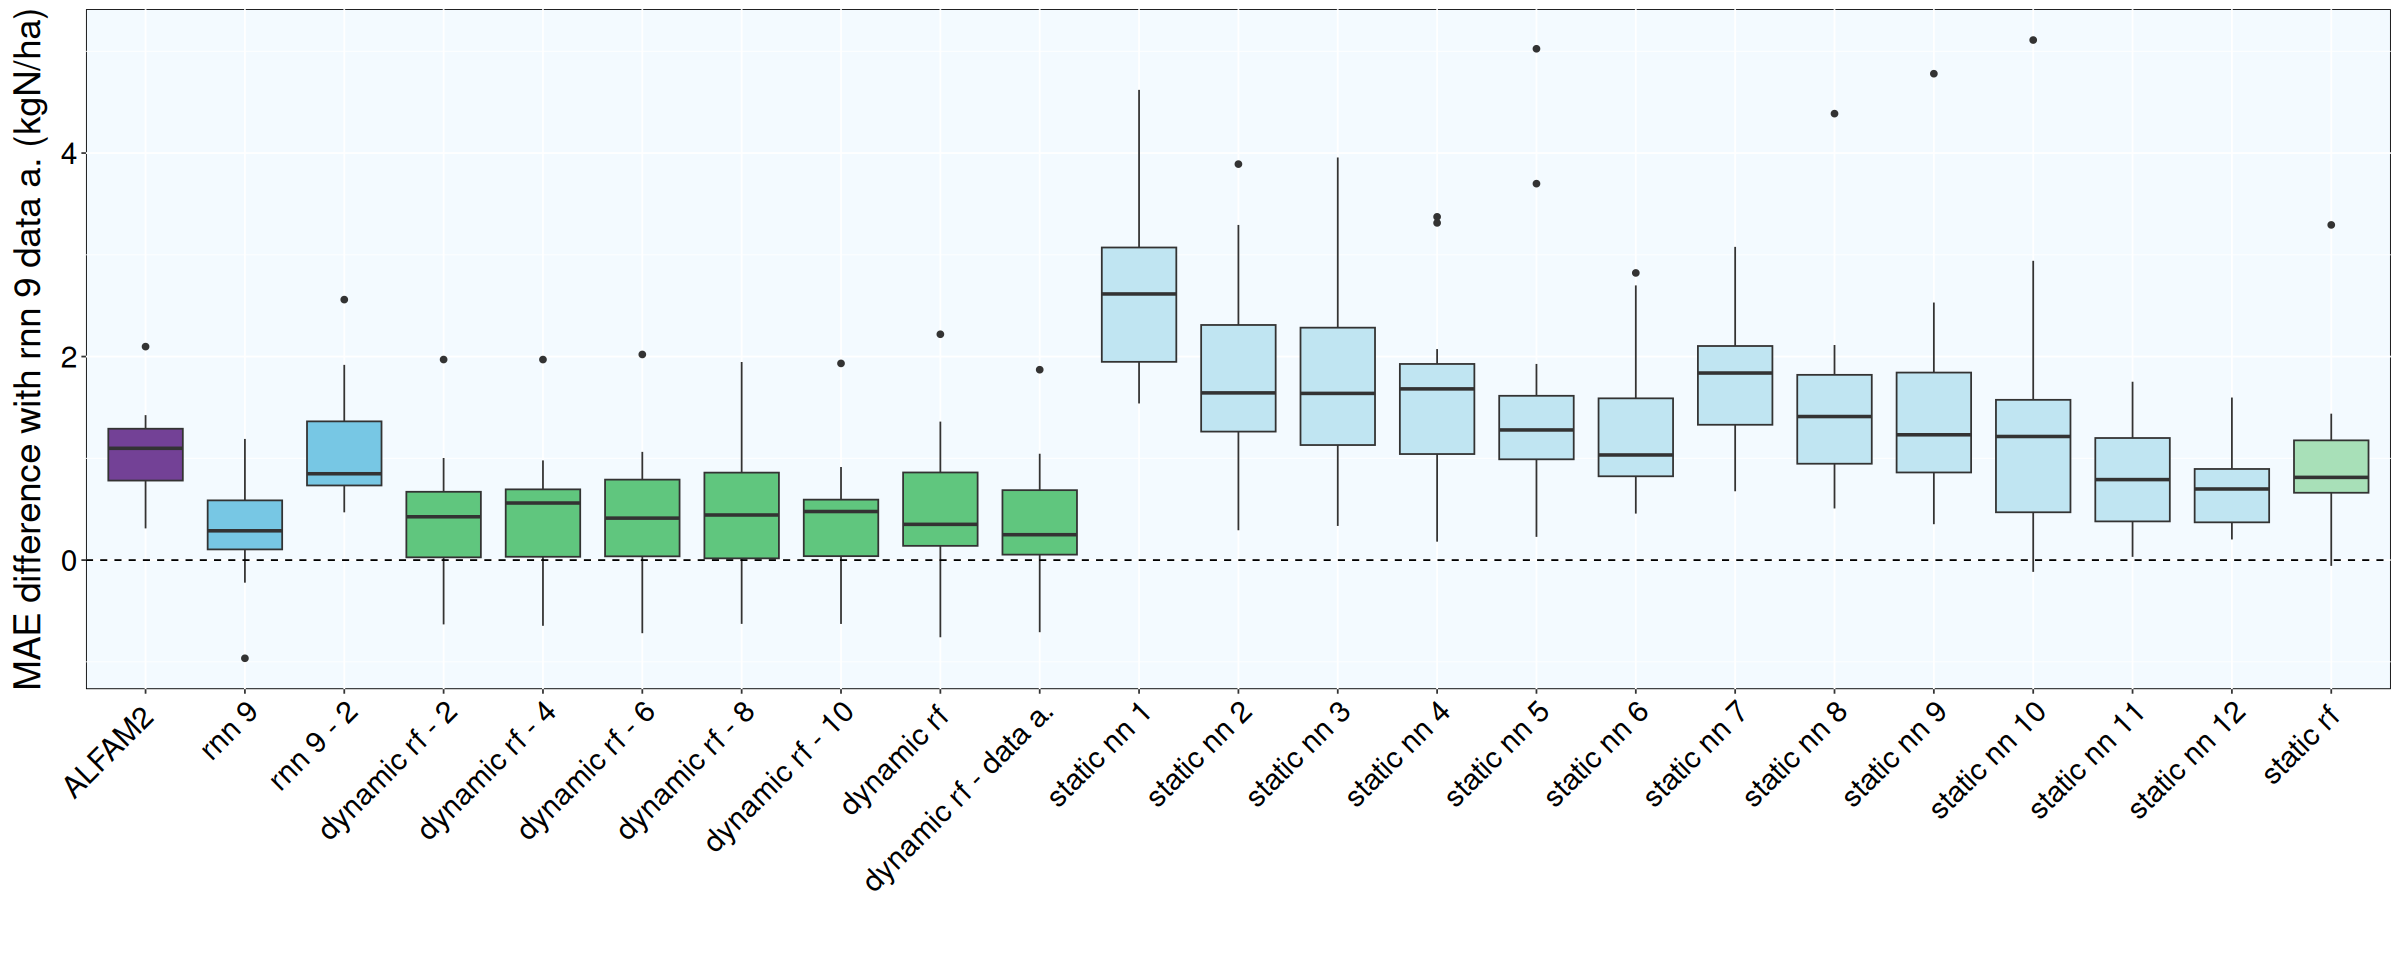

In [135]:
size (20, 8)
figure_comparison_on_final_cumul_2 = df_res_all_static %>%
    filter (Model %in% c ("ALFAM2 ", "rnn 9", "rnn 9 - 2", "rnn 9 - data a.",
                          "dynamic rf - 2", "dynamic rf - 4", "dynamic rf - 6", "dynamic rf - 8", 
                          "dynamic rf - 10", "dynamic rf ", "dynamic rf - data a.", "static nn 1", "static nn 2", "static nn 3", "static nn 4", 
                          "static nn 5", "static nn 6", "static nn 7", "static nn 8", "static nn 9", 
                          "static nn 10", "static nn 11", "static nn 12", "static rf ")) %>%

    summarise (MAE = mean (abs (e.cum - prediction_ecum)), model_type = model_type[1], .by = c (sample, Model)) %>%


    mutate (MAE_rnn_data_a = MAE [Model == "rnn 9 - data a."], .by = sample) %>%
    mutate (diff = MAE - MAE_rnn_data_a) %>%

    filter (Model != "rnn 9 - data a.") %>%

    ggplot () +
        geom_boxplot (aes (x = Model, y = diff, fill = model_type)) +
        geom_hline (yintercept = 0, linetype = 2) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1),
              legend.position = "none") +
        scale_fill_manual (values = colors) +
        xlab ("") +
        ylab ("MAE difference with rnn 9 data a. (kgN/ha)") +
        NULL

figure_comparison_on_final_cumul_2

png (file = "03_images/figure_comparison_on_final_cumul_2.png", height = 600, width = 1200)
figure_comparison_on_final_cumul_2
dev.off()

png 
  2

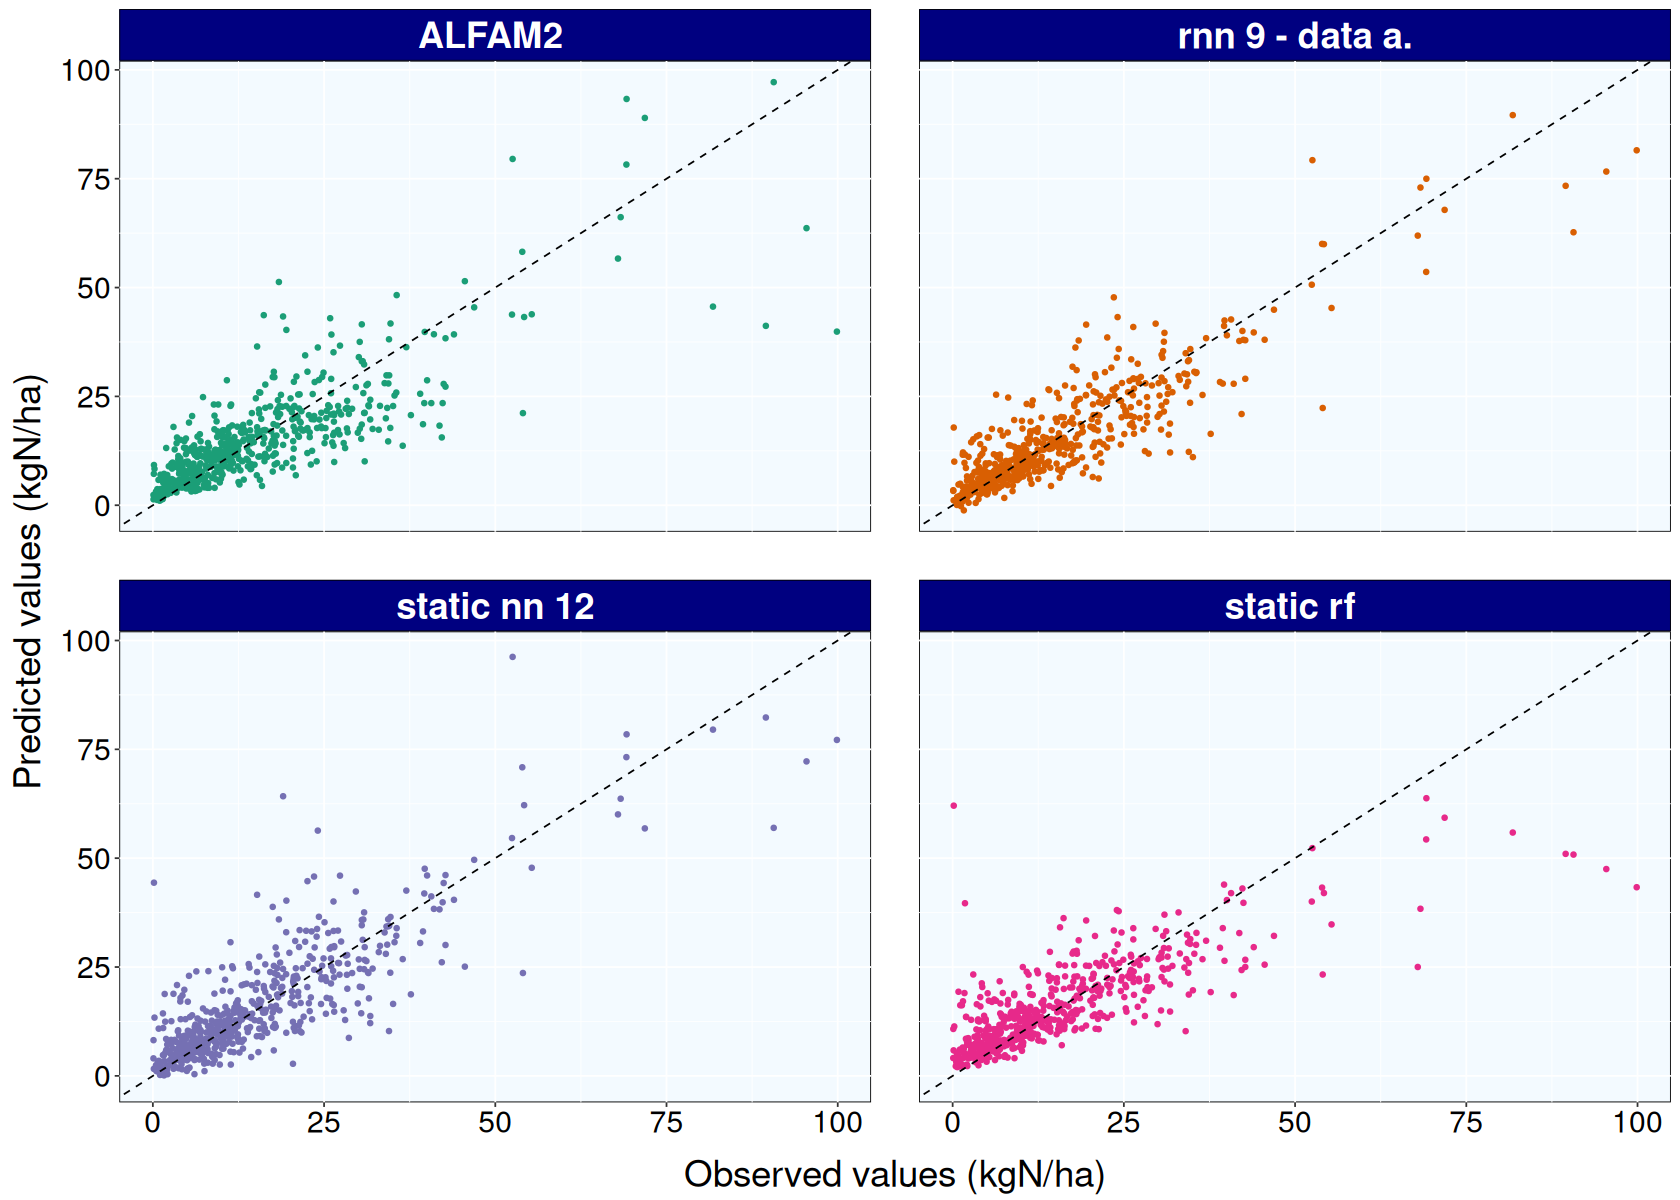

In [136]:
size (14, 10)
figure_obs_vs_pred = df_res_all_static %>%
    summarise (prediction_ecum = mean (prediction_ecum), e.cum = unique (e.cum), .by = c (pmid, Model)) %>%
    filter (Model %in% c ("ALFAM2 ", "static nn 12", "rnn 9 - data a.", "static rf ")) %>%
    ggplot () +
        geom_point (aes (x = e.cum, y = prediction_ecum, color = Model), size = 1.2) +
        theme (legend.position = "none") +
        geom_abline (slope = 1, linetype = 2) +
        xlab ("Observed values (kgN/ha)") +
        ylab ("Predicted values (kgN/ha)") +
        facet_wrap (~ Model)

figure_obs_vs_pred

png (file = "03_images/figure_obs_vs_pred.png", height = 600, width = 800)
figure_obs_vs_pred
dev.off()

# Comparison on the whole dynamic

In [137]:
df_res_all_dynamic = rbind (

    # results for the ALFAM2 model
    df_res_ALFAM2 %>%
        select (sample, pmid, e.cum, ct, prediction_ecum) %>%
        mutate (running_time = NA) %>%
        mutate (model = "", .after = sample) %>%
        mutate (model_type = "ALFAM2", .before = sample),

    # results for 'dynamic rf - 2', 'dynamic rf - 4', ..., 'dynamic rf - 10'
    df_res_random_forest_dynamique %>%
        mutate (dt = as.character (dt)) %>%
        mutate (dt = paste ("-", dt)) %>%
        select (sample, model = dt, pmid, e.cum, ct, prediction_ecum = e.cum_hat, running_time) %>%
        mutate (sample = as.integer (gsub ("sample_", "", sample))) %>%
        mutate (model_type = "dynamic rf", .before = sample),

    # results for 'dynamic rf'
    df_res_random_forest_dynamique_without_interpolation %>%
        mutate (model = "") %>%
        select (sample, model, pmid, e.cum, ct, prediction_ecum = e.cum_hat, running_time) %>%
        mutate (sample = as.integer (gsub ("sample_", "", sample))) %>%
        mutate (model_type = "dynamic rf", .before = sample),

    # results for 'dynamic rf - data a.'
    df_res_random_forest_dynamique_data_a %>%
        mutate (model = "- data a.") %>%
        select (sample, model, pmid, e.cum, ct, prediction_ecum = e.cum_hat, running_time) %>%
        mutate (sample = as.integer (gsub ("sample_", "", sample))) %>%
        mutate (model_type = "dynamic rf", .before = sample),

    # results for 'rnn 9'
    df_res_rnn_all %>%
        filter (model == "9") %>%
        select (sample, model, pmid, e.cum, ct, prediction_ecum, running_time) %>%
        mutate (model_type = "rnn", .before = sample) %>%
        mutate (sample = sample + 1),

    # results for 'rnn 9 - 2'
    df_res_rnn_interpolated %>%
        mutate (model = "9 - 2", running_time = NA) %>%
        select (sample, model, pmid, e.cum, ct, prediction_ecum, running_time) %>%
        mutate (model_type = "rnn", .before = sample) %>%
        mutate (sample = sample + 1),

    # results for 'rnn 9 - data a.'
    df_res_rnn_with_data_augmentation %>%
        mutate (model = "9 - data a.", running_time = NA) %>%
        select (sample, model, pmid, e.cum, ct, prediction_ecum, running_time) %>%
        mutate (model_type = "rnn", .before = sample) %>%
        mutate (sample = sample + 1)
    
) %>%
    mutate (Model = paste (model_type, model)) %>%
    mutate (Model = factor (Model, 
                            levels = c ("ALFAM2 ", 
                                        "rnn 9", "rnn 9 - 2", "rnn 9 - data a.", 
                                        "dynamic rf - 2", "dynamic rf - 4", "dynamic rf - 6", "dynamic rf - 8", "dynamic rf - 10", 
                                        "dynamic rf ", "dynamic rf - data a.")))

In [138]:
df_res_all_dynamic %>%

    mutate (e.cum_shift = c (0, e.cum [0 : (n() - 1)]), .by = c (pmid, sample, Model)) %>%
    mutate (ct_shift = c (0, ct [0 : (n() - 1)]), .by = c (pmid, sample, Model)) %>%
    mutate (delta_ecum = e.cum - e.cum_shift) %>%
    mutate (dt = ct - ct_shift) %>%
    mutate (j.NH3 = delta_ecum / dt) %>%

    mutate (e.cum_hat_shift = c (0, prediction_ecum [0 : (n() - 1)]), .by = c (pmid, sample, Model)) %>%
    mutate (delta_ecum_hat = prediction_ecum - e.cum_hat_shift) %>%
    mutate (j.NH3_hat = delta_ecum_hat / dt) %>%

    summarise (MAE = mean (abs (j.NH3 - j.NH3_hat)), model_type = model_type[1], .by = c (sample, Model)) %>%

    summarise (mean_MAE = round (mean (MAE), digits = 2), .by = Model) %>%

    kable (caption = "Mean MAE on the flux") %>%
    kable_styling %>%
    as.character %>% display_html %>%
    {.}

Mean MAE on the flux 
 
 
 Model 
 mean_MAE 
 
 
 
 
 ALFAM2 
 0.46 
 
 
 dynamic rf - 2 
 0.39 
 
 
 dynamic rf - 4 
 0.44 
 
 
 dynamic rf - 6 
 0.49 
 
 
 dynamic rf - 8 
 0.53 
 
 
 dynamic rf - 10 
 0.57 
 
 
 dynamic rf 
 0.42 
 
 
 dynamic rf - data a. 
 0.55 
 
 
 rnn 9 
 0.38 
 
 
 rnn 9 - 2 
 0.39 
 
 
 rnn 9 - data a. 
 0.35

png 
  2

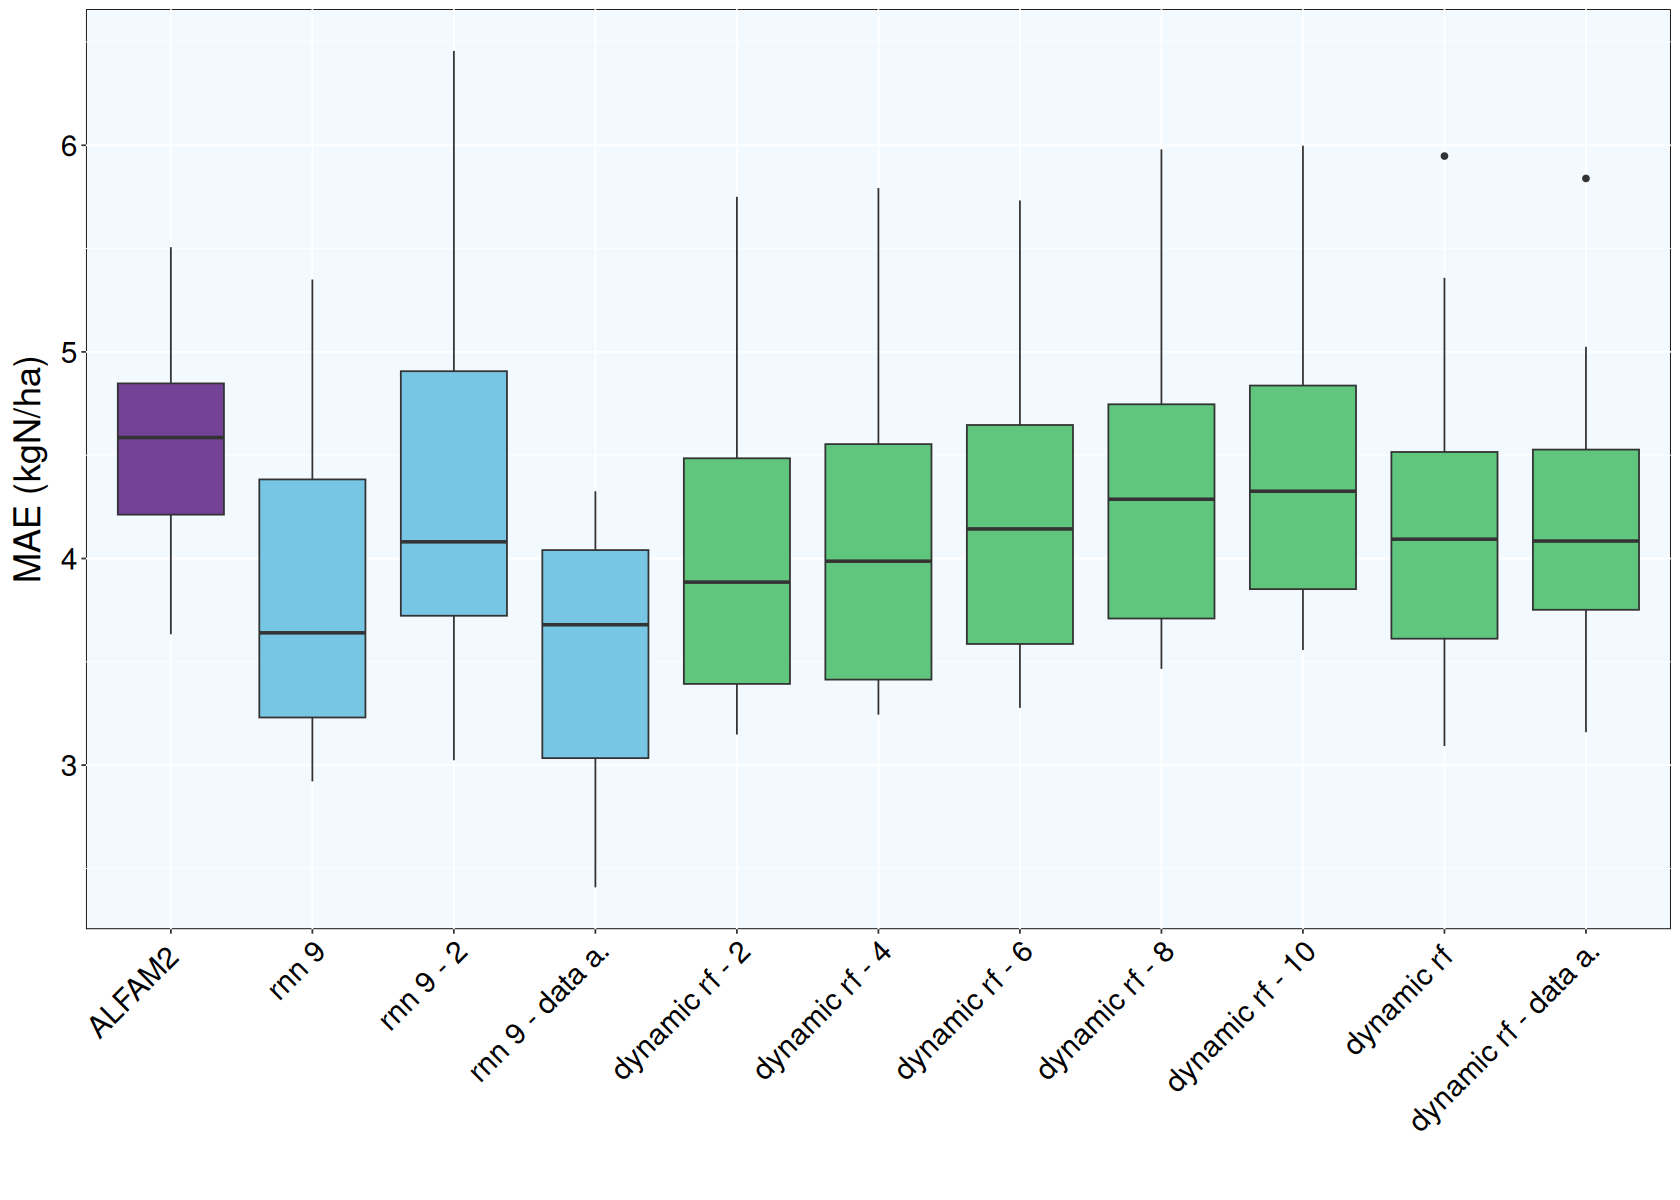

In [139]:
colors = c ("#734196", "#60c67e", "#77c7e4")

figure_comparison_on_the_whole_dynamic_1 = df_res_all_dynamic %>%

    summarise (MAE = mean (abs (e.cum - prediction_ecum)), model_type = model_type [1], .by = c (sample, Model)) %>%

    ggplot () +
        geom_boxplot (aes (x = Model, y = MAE, fill = model_type)) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1), 
              legend.position = "none") +
        scale_fill_manual (values = colors) +
        xlab ("") +
        ylab ("MAE (kgN/ha)")

figure_comparison_on_the_whole_dynamic_1

png (file = "03_images/figure_comparison_on_the_whole_dynamic_1.png", height = 600, width = 700)
figure_comparison_on_the_whole_dynamic_1
dev.off()

In [140]:
df_res_all_dynamic %>%

    summarise (MAE = mean (abs (e.cum - prediction_ecum)), model_type = model_type[1], .by = c (sample, Model)) %>%

    summarise (mean_MAE = round (mean (MAE), digits = 2), .by = Model) %>%
    mutate (diff_with_ALFAM2 = round (((mean_MAE [Model == "ALFAM2 "] - mean_MAE) / mean_MAE [Model == "ALFAM2 "]) * 100 , digit = 2)) %>%
    mutate (diff_with_dyn_rf2 = round (((mean_MAE [Model == "dynamic rf - 2"] - mean_MAE) / mean_MAE [Model == "dynamic rf - 2"]) * 100 , digit = 2)) %>%
    {.}


Model                mean_MAE diff_with_ALFAM2 diff_with_dyn_rf2
1  ALFAM2               4.57      0.00            -12.84           
2  dynamic rf - 2       4.05     11.38              0.00           
3  dynamic rf - 4       4.16      8.97             -2.72           
4  dynamic rf - 6       4.24      7.22             -4.69           
5  dynamic rf - 8       4.39      3.94             -8.40           
6  dynamic rf - 10      4.49      1.75            -10.86           
7  dynamic rf           4.20      8.10             -3.70           
8  dynamic rf - data a. 4.19      8.32             -3.46           
9  rnn 9                3.83     16.19              5.43           
10 rnn 9 - 2            4.26      6.78             -5.19           
11 rnn 9 - data a.      3.54     22.54             12.59

In [141]:
((3.83 - 3.54) / 3.83) * 100

[1] 7.571802

png 
  2

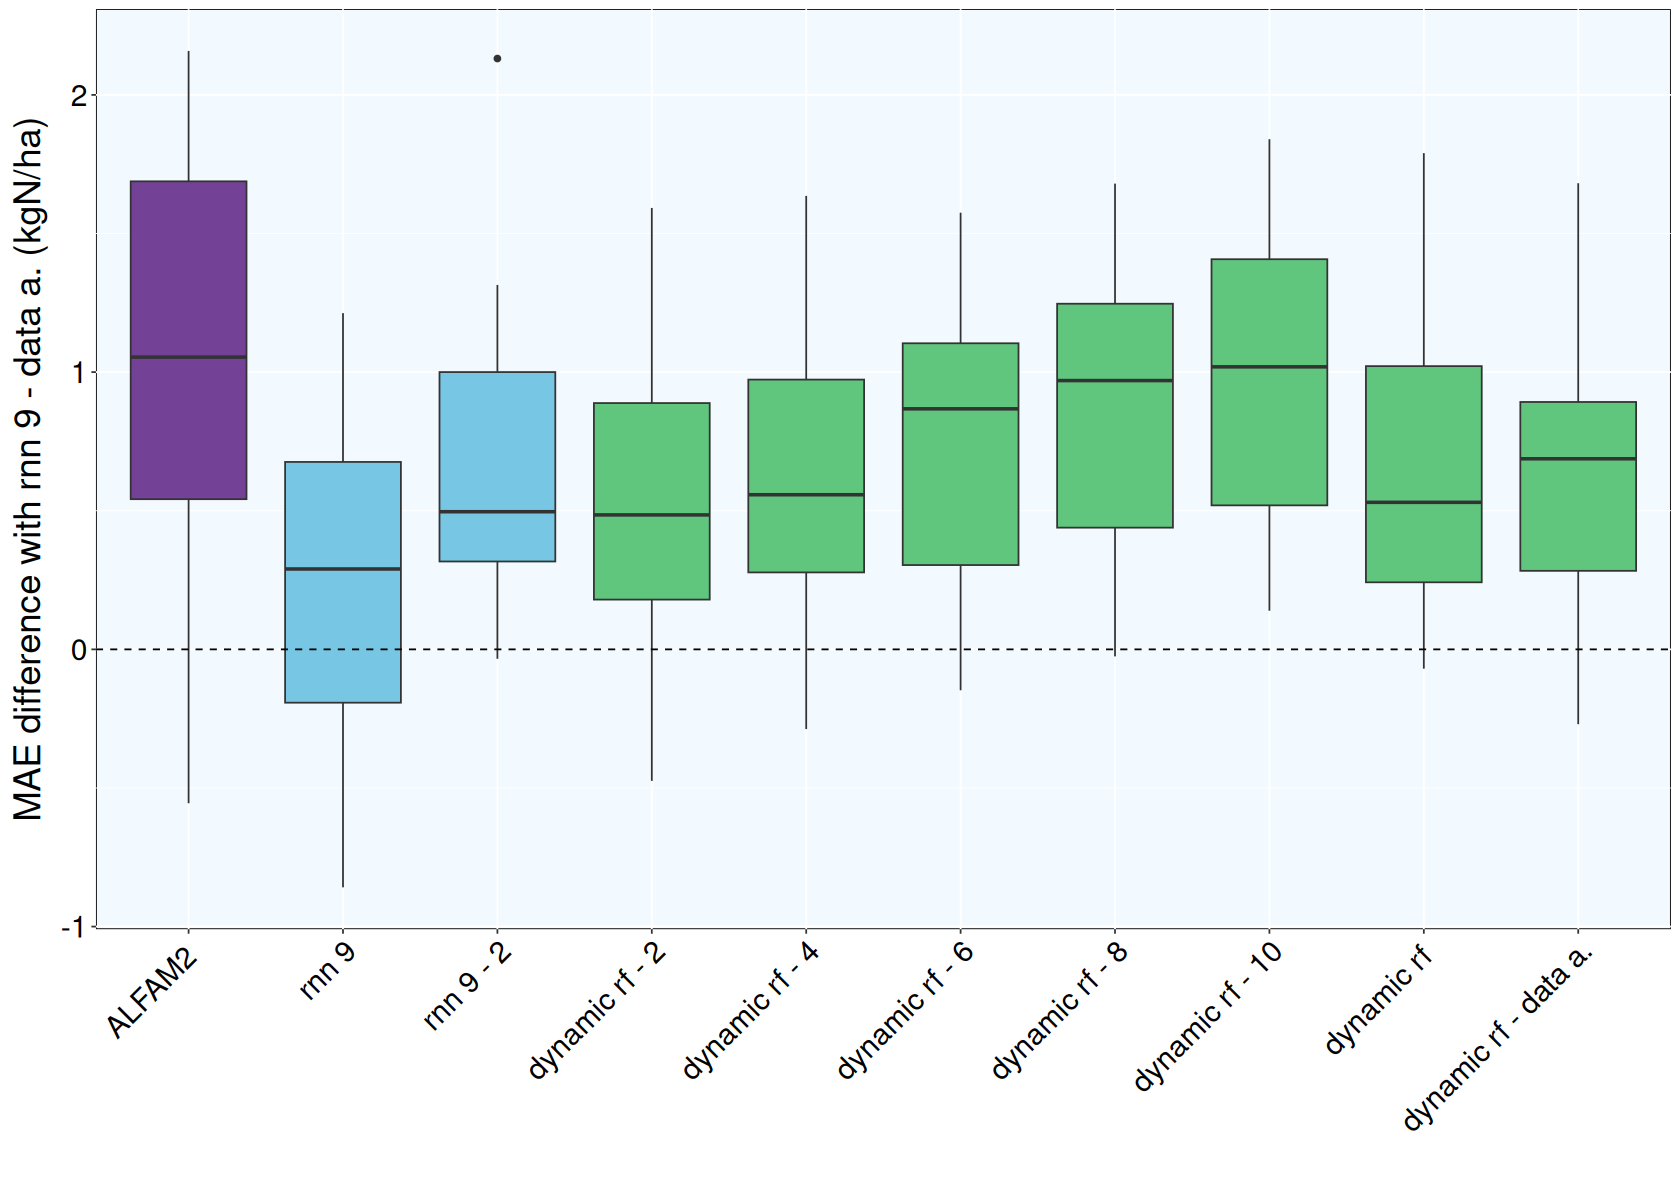

In [142]:
figure_comparison_on_the_whole_dynamic_2 = df_res_all_dynamic %>%
    summarise (MAE = mean (abs (e.cum - prediction_ecum)), model_type = model_type [1], .by = c (sample, Model)) %>%


    mutate (MAE_rnn_data_a = MAE [Model == "rnn 9 - data a."], .by = sample) %>%
    mutate (diff = MAE - MAE_rnn_data_a) %>%

    filter (Model != "rnn 9 - data a.") %>%

    ggplot () +
        geom_boxplot (aes (x = Model, y = diff, fill = model_type)) +
        geom_hline (yintercept = 0, linetype = 2) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1),
              legend.position = "none") +
        scale_fill_manual (values = colors) +
        xlab ("") +
        ylab ("MAE difference with rnn 9 - data a. (kgN/ha)") +
        NULL

figure_comparison_on_the_whole_dynamic_2

png (file = "03_images/figure_comparison_on_the_whole_dynamic_2.png", height = 600, width = 700)
figure_comparison_on_the_whole_dynamic_2
dev.off()

png 
  2

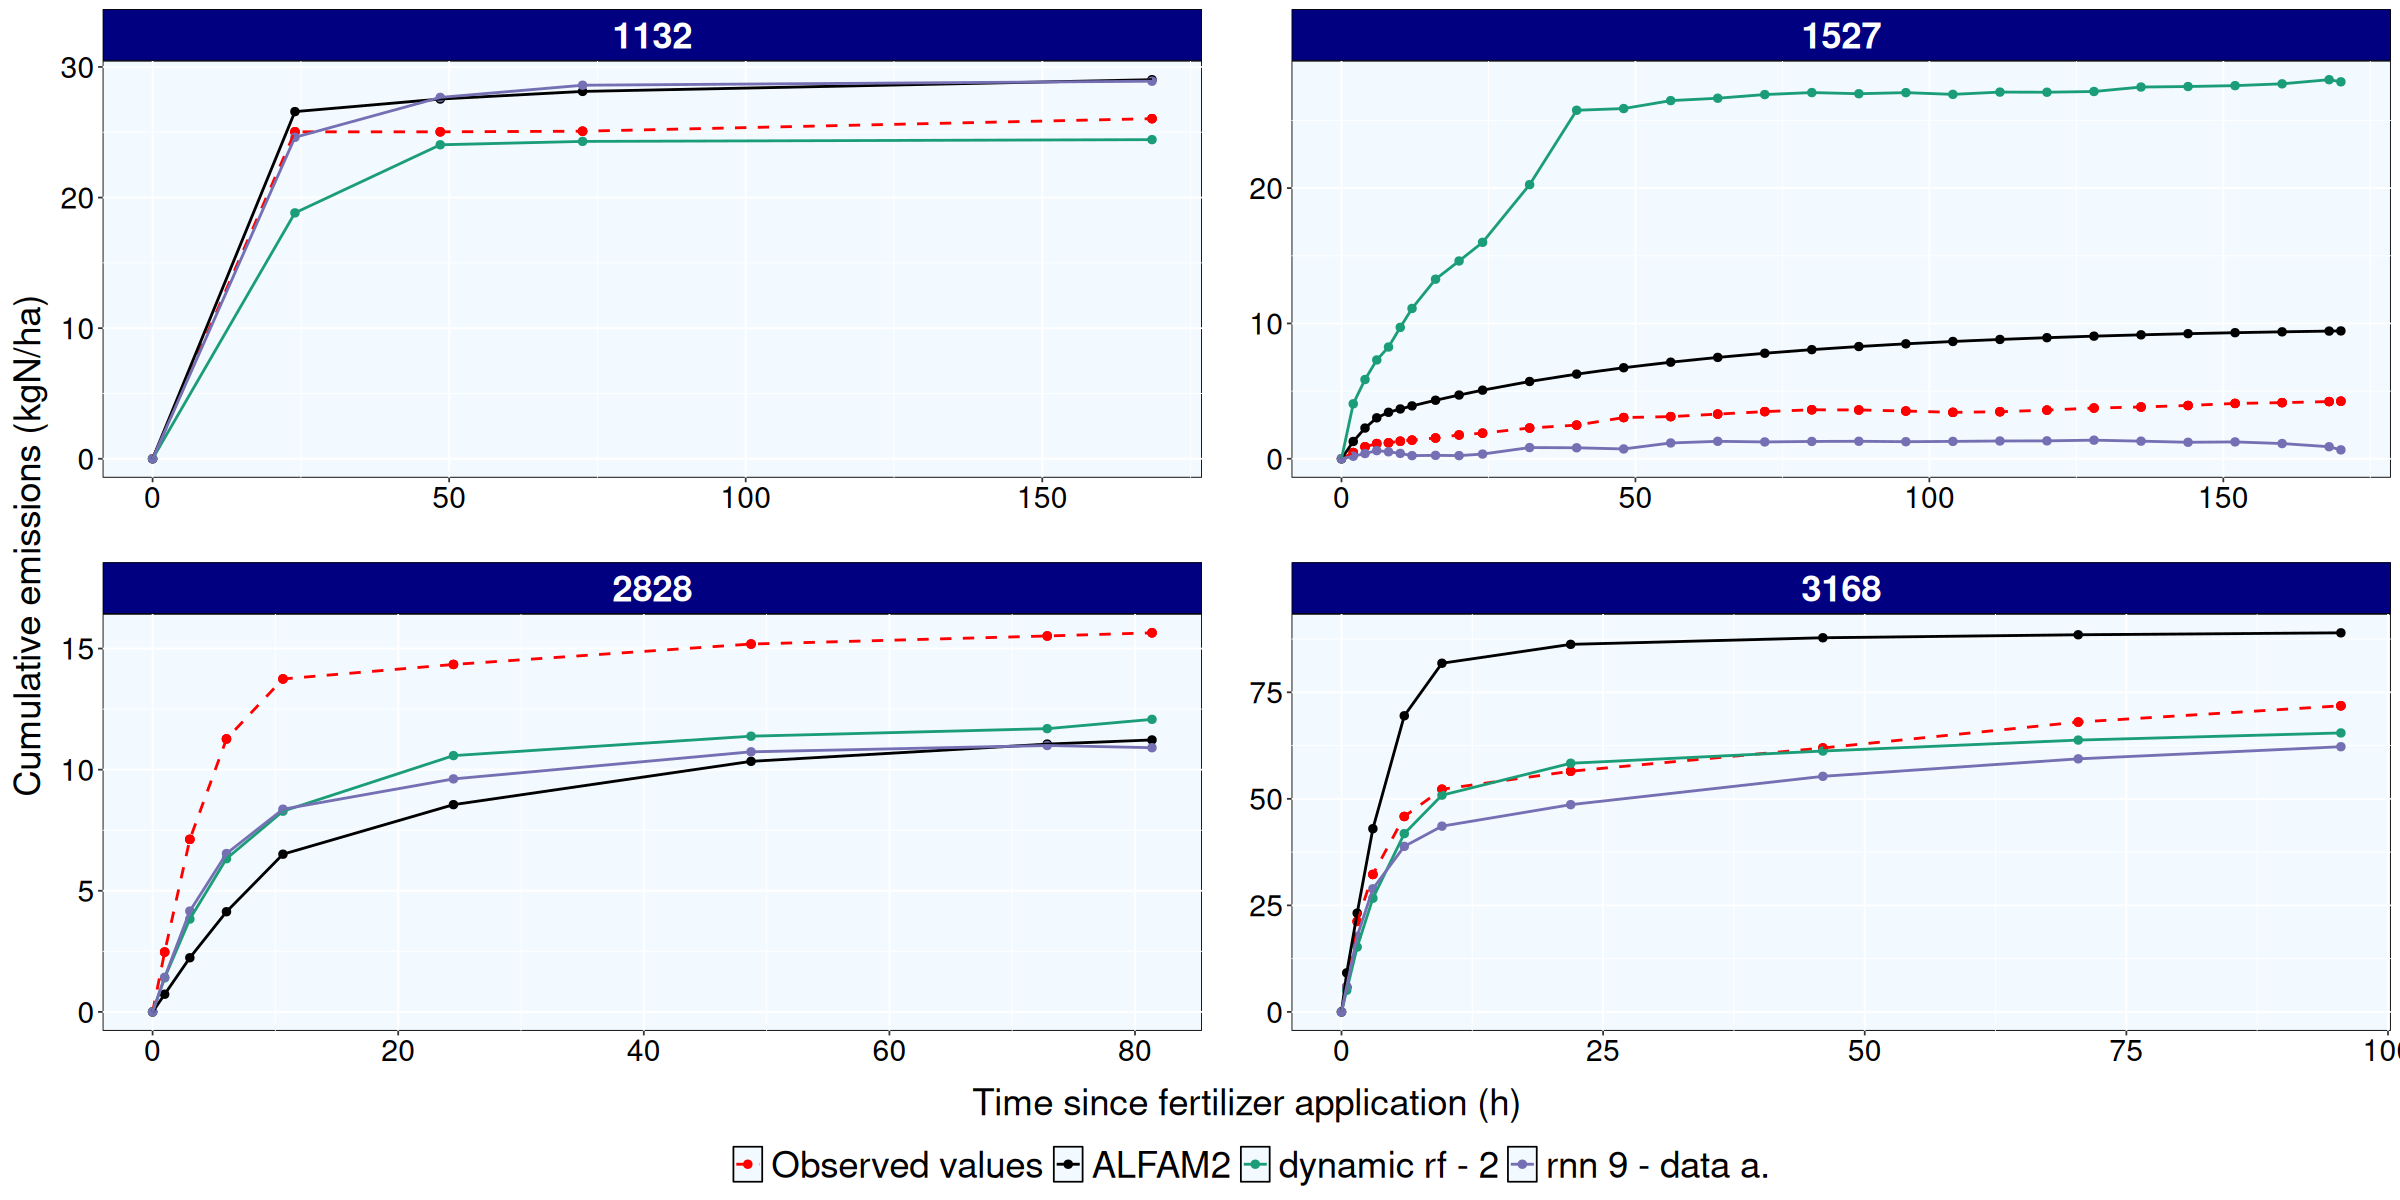

In [190]:
pmids_check = c (1132, 1527, 2828, 3168)

df_plot = df_res_all_dynamic %>%
    filter (sample == 1) %>%
    filter (pmid %in% pmids_check) %>%
    filter (model != "9 interp") %>%
    filter (model_type == "ALFAM2" | (model_type == "dynamic rf" & model == "- 2") | (model_type == "rnn" & model == 9)) %>%
    select (model_type, pmid, e.cum, ct, prediction_ecum) %>%
    pivot_longer (cols = c (e.cum, prediction_ecum)) %>%
    mutate (name = ifelse (name == "prediction_ecum" & model_type == "ALFAM2", "ALFAM2", name)) %>%
    mutate (name = ifelse (name == "prediction_ecum" & model_type == "dynamic rf", "dynamic rf - 2", name)) %>%
    mutate (name = ifelse (name == "prediction_ecum" & model_type == "rnn", "rnn 9 - data a.", name)) %>%
    mutate (name = ifelse (name == "e.cum", "Observed values", name)) %>%
    distinct

# adding value e.cum = 0 at t = 0
df_plot_final = NULL
for (i in pmids_check){
    for (n in df_plot$name %>% unique){
        df_tmp = df_plot %>% filter (name == n & pmid == i)
        to_bind = df_tmp[1, ] %>% mutate (ct = 0, value = 0)
        df_tmp = rbind (to_bind, df_tmp)
        df_plot_final = rbind (df_plot_final, df_tmp)
    }
}

df_plot_final = df_plot_final %>%
    mutate (name = factor (name, levels = c ("Observed values", "ALFAM2", "dynamic rf - 2", "rnn 9 - data a.")))

size (20, 10)
figure_prediction_examples = df_plot_final %>%
    ggplot () +
        geom_point (aes (x = ct, y = value, color = name), size = 2) +
        geom_line (aes (x = ct, y = value, color = name, linetype = name), linewidth = 0.8) +
        facet_wrap (~ pmid, scales = "free") +
        scale_color_manual (values = c ("red", "black", Dark2 [c(1, 3)])) +
        scale_linetype_manual(values = c("dashed", "solid", "solid", "solid")) +
        labs(color = "", linetype = "") +
        xlab ("Time since fertilizer application (h)") +
        ylab ("Cumulative emissions (kgN/ha)") +
        theme (legend.position = "bottom") +
        NULL

figure_prediction_examples

png (file = "03_images/figure_prediction_examples.png", width = 1000, height = 500)
figure_prediction_examples
dev.off()

In [189]:
Dark2

<colors>
#1B9E77FF #D95F02FF #7570B3FF #E7298AFF #66A61EFF #E6AB02FF #A6761DFF #666666FF 

# Scenarios

## ALFAM2

In [144]:
load (file = "02_scripts/01_ALFAM2/results/predictions_on_scenarios_ALFAM2.Rdata")

df_efficacy_ALFAM2 = predictions_on_scenarios_ALFAM2

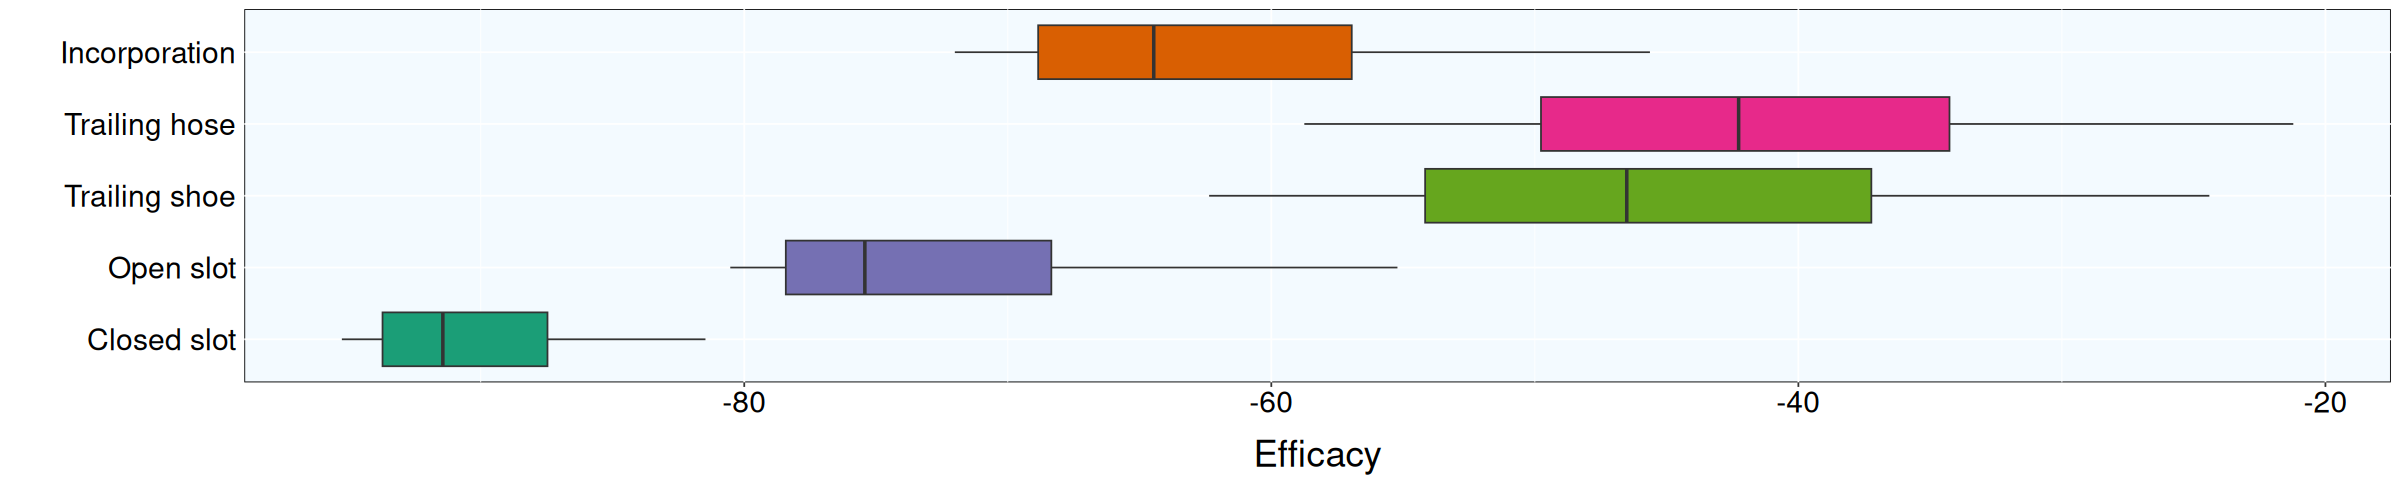

In [145]:
size (20, 4)
df_efficacy_ALFAM2 %>%
    filter (strategy != "Broadcast") %>%
    
    ggplot () +
        
        geom_boxplot (aes (x = efficacy, y = strategy, fill = strategy)) +
        scale_fill_manual (values = Dark2) +
        scale_y_discrete (limits = c ("Closed slot", "Open slot", "Trailing shoe", "Trailing hose", "Incorporation")) +
        ylab ("") + xlab ("Efficacy") +
        theme (legend.position = "none",
               axis.ticks.y = element_blank(),
               strip.text.x = element_text(margin = ggplot2::margin(t = 8, b = 8, r = 0, l = 0))) +
        NULL

## static rf

In [146]:
load (file = "02_scripts/02_random_forest/results/predictions_on_scenarios_static_random_forest.Rdata")

In [147]:
df_efficacy_static_rf = predictions_on_scenarios_static_random_forest %>%
    mutate (model = "static rf")

head (df_efficacy_static_rf, n = 2)

scenario pmid e.cum_hat strategy      group_temp group_wind group_rain ct
1 1        1    10.90903  Incorporation 1          1          1          72
2 1        2    13.83639  Broadcast     1          1          1          72
  tan.app app.rate ⋯ wind.2m_5 wind.2m_6 rain.rate_1 rain.rate_2 rain.rate_3
1 36.7    18.7     ⋯ 1.4       2.2       0           0           0          
2 36.7    18.7     ⋯ 1.4       2.2       0           0           0          
  rain.rate_4 rain.rate_5 rain.rate_6 efficacy  model    
1 0           0           0           -21.15693 static rf
2 0           0           0             0.00000 static rf

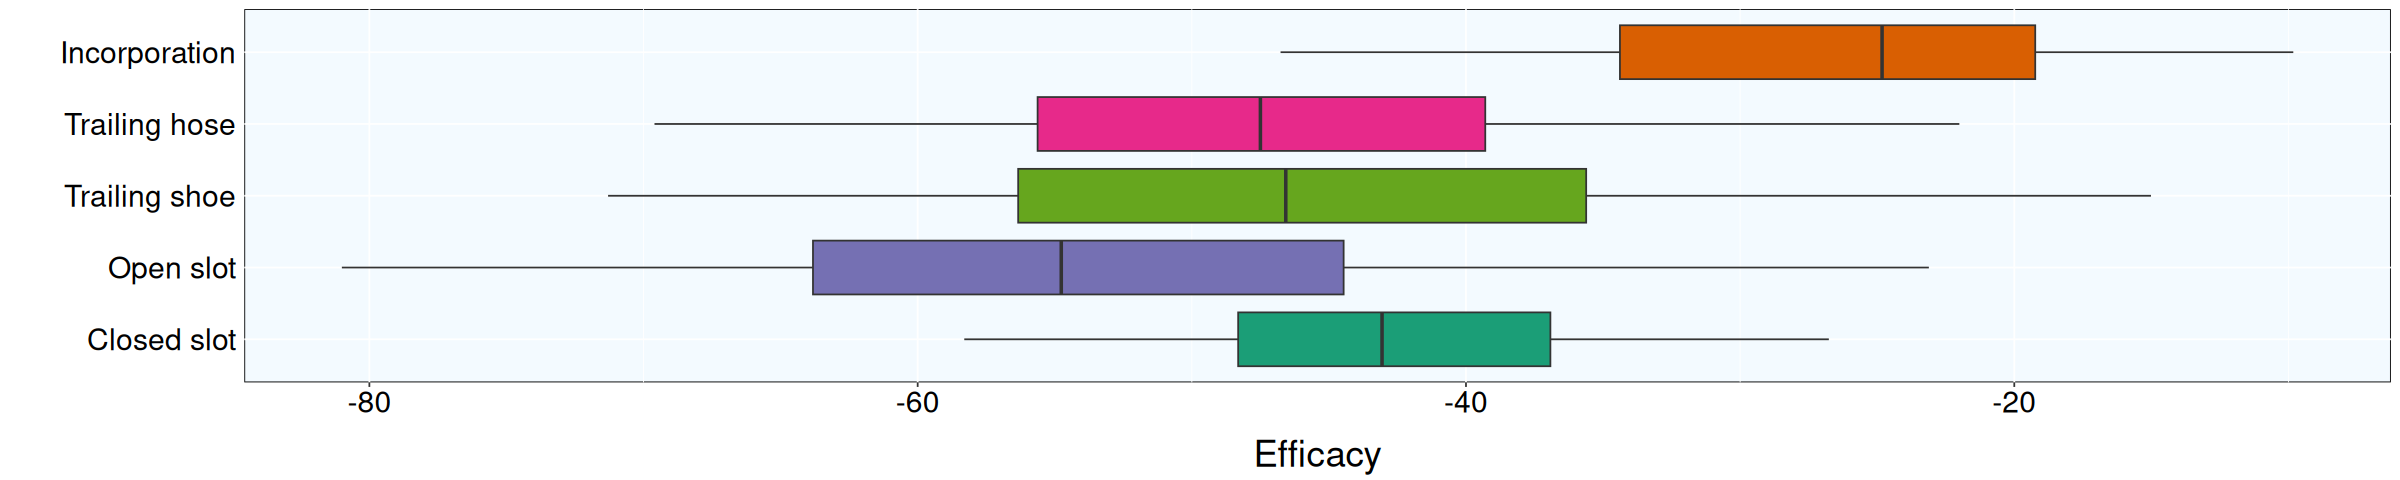

In [148]:
size (20, 4)
df_efficacy_static_rf %>%
    filter (strategy != "Broadcast") %>%
    
    ggplot () +
        
        geom_boxplot (aes (x = efficacy, y = strategy, fill = strategy)) +
        scale_fill_manual (values = Dark2) +
        scale_y_discrete (limits = c ("Closed slot", "Open slot", "Trailing shoe", "Trailing hose", "Incorporation")) +
        ylab ("") + xlab ("Efficacy") +
        theme (legend.position = "none",
               axis.ticks.y = element_blank(),
               strip.text.x = element_text(margin = ggplot2::margin(t = 8, b = 8, r = 0, l = 0))) +
        NULL

## static nn 12

In [149]:
scenarios_predictions_static_nn = read.csv (file = "02_scripts/03_static_nn/results/04_predictions_on_scenarios/predictions_on_scenarios_static_nn.csv")

In [150]:
df_efficacy_static_nn = scenarios_predictions_static_nn %>% 
    mutate (efficacy = ((prediction_ecum / prediction_ecum[strategy == "Broadcast"]) - 1) * 100, 
            .by = c (scenario)) %>%
    mutate (model = "static nn 12") 

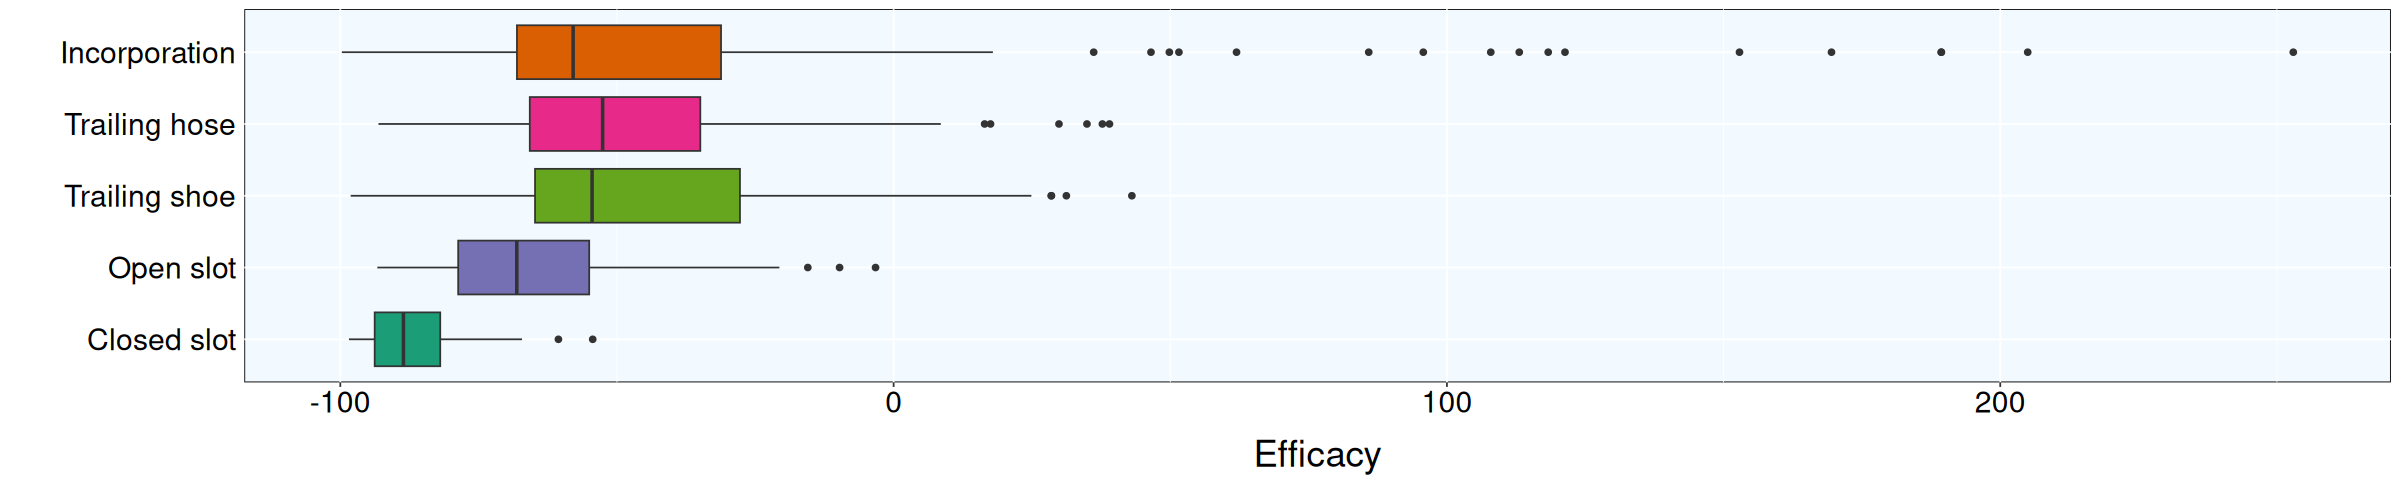

In [151]:
# static nn
size (20, 4)
df_efficacy_static_nn %>%
    filter (strategy != "Broadcast") %>%
    
    ggplot () +
        
        geom_boxplot (aes (x = efficacy, y = strategy, fill = strategy)) +
        scale_fill_manual (values = Dark2) +
        scale_y_discrete (limits = c ("Closed slot", "Open slot", "Trailing shoe", "Trailing hose", "Incorporation")) +
        ylab ("") + xlab ("Efficacy") +
        theme (legend.position = "none",
               axis.ticks.y = element_blank(),
               strip.text.x = element_text(margin = ggplot2::margin(t = 8, b = 8, r = 0, l = 0))) +
        NULL

## dynamic rf - 2

In [152]:
load (file = "02_scripts/02_random_forest/results/predictions_on_scenarios_dynamic_random_forest.Rdata")

In [153]:
head (predictions_on_scenarios_dynamic_random_forest, n = 2)

e.cum_hat e.cum_shift pmid ct air.temp wind.2m rain.rate tan.app app.mthd
1 3.973833  0.000000    1    2  11.2     2.3     0         36.7    bc      
2 4.778707  3.973833    1    4  11.2     2.3     0         36.7    bc      
  app.rate man.dm man.ph man.source incorp  t.incorp
1 18.7     3.8    7.5    pig        shallow 0       
2 18.7     3.8    7.5    pig        shallow 0

In [154]:
load (file = "02_scripts/00_data_preparation/processed_data/scenarios_dynamic_rf.Rdata")

df_groups = scenarios_dynamic_rf %>% 
    select (scenario, pmid, strategy, group_temp, group_wind, group_rain) %>%
    distinct

In [155]:
df_efficacy_dynamic_rf = predictions_on_scenarios_dynamic_random_forest %>%
    left_join (df_groups, by = "pmid") %>%
    filter (ct == max (ct), .by = pmid) %>%
    mutate (efficacy = ((e.cum_hat / e.cum_hat[strategy == "Broadcast"]) - 1) * 100, 
            .by = c (scenario)) %>%
    mutate (model = "dynamic rf - 2")

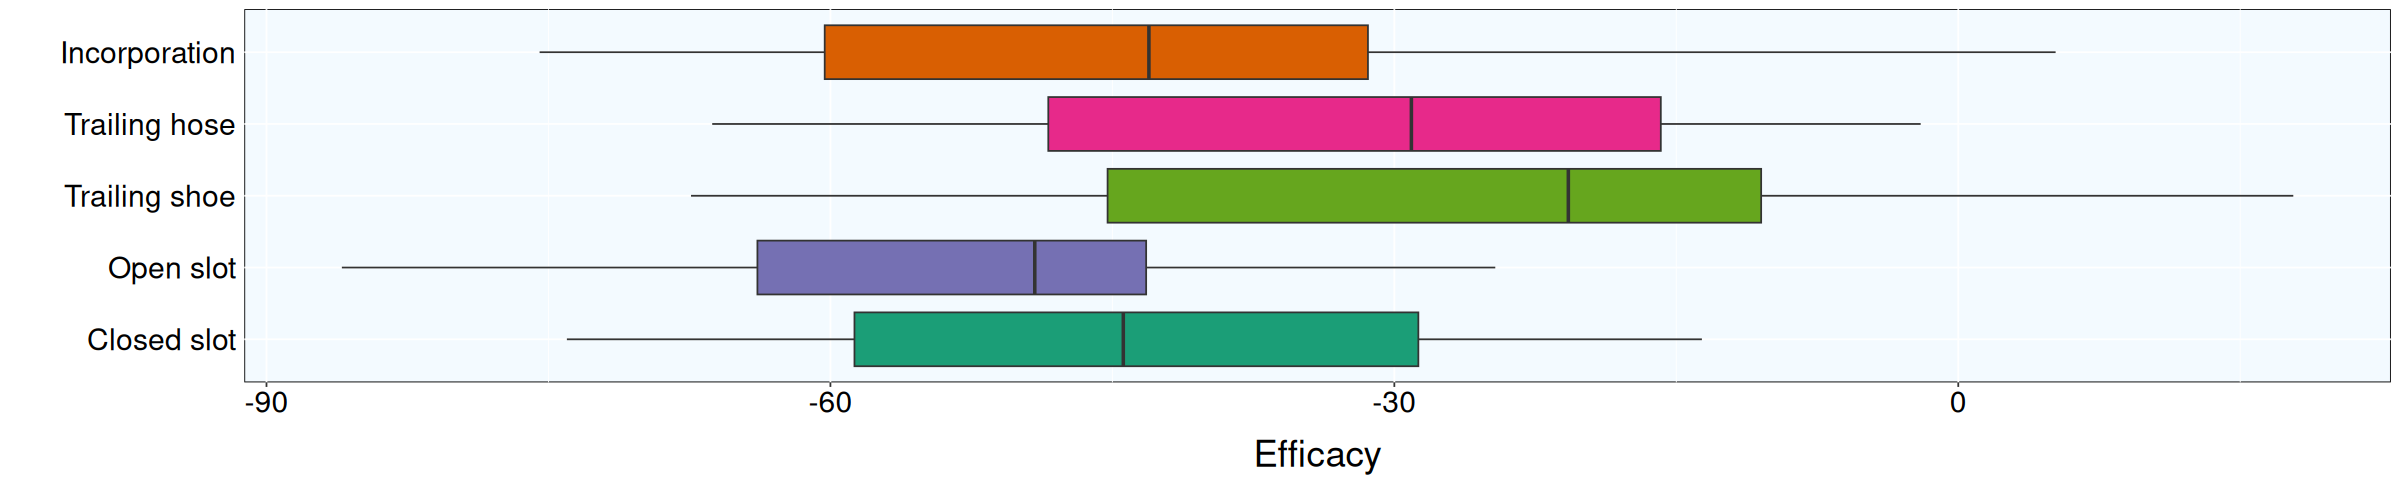

In [156]:
size (20, 4)
df_efficacy_dynamic_rf %>%
    filter (strategy != "Broadcast") %>%
    
    ggplot () +
        
        geom_boxplot (aes (x = efficacy, y = strategy, fill = strategy)) +
        scale_fill_manual (values = Dark2) +
        scale_y_discrete (limits = c ("Closed slot", "Open slot", "Trailing shoe", "Trailing hose", "Incorporation")) +
        ylab ("") + xlab ("Efficacy") +
        theme (legend.position = "none",
               axis.ticks.y = element_blank(),
               strip.text.x = element_text(margin = ggplot2::margin(t = 8, b = 8, r = 0, l = 0))) +
        NULL

## rnn 9 - data a.

Predictions obtained with the 'rnn 9 - data a.' model, using multiple time steps (dt = 2, 4, ..., 10).

In [157]:
predictions_on_scenarios_rnn_data_augmentation = read.csv (file = "02_scripts/04_rnn/results/06_predictions_on_scenarios/predictions_on_scenarios_rnn_data_augmentation.csv")

In [158]:
predictions_on_scenarios_rnn_data_augmentation %>% head %>% embed

scenario 
 pmid 
 strategy 
 group_temp 
 group_wind 
 group_rain 
 ct 
 dt 
 air.temp 
 wind.2m 
 rain.rate 
 tan.app 
 app.mthd 
 app.rate 
 man.dm 
 man.ph 
 man.source 
 incorp 
 t.incorp 
 seq 
 ct_shift 
 prediction_ecum 
 prediction_delta_ecum 
 
 
 
 
 1 
 1 
 Incorporation 
 1 
 1 
 1 
 2 
 2 
 11.2 
 2.3 
 0 
 36.7 
 0 
 18.7 
 3.8 
 7.5 
 0 
 1 
 0 
 2 
 0 
 1.628788 
 1.6287878 
 
 
 1 
 1 
 Incorporation 
 1 
 1 
 1 
 4 
 2 
 11.2 
 2.3 
 0 
 36.7 
 0 
 18.7 
 3.8 
 7.5 
 0 
 1 
 0 
 2 
 2 
 1.662179 
 0.0333915 
 
 
 1 
 1 
 Incorporation 
 1 
 1 
 1 
 6 
 2 
 10.8 
 2.3 
 0 
 36.7 
 0 
 18.7 
 3.8 
 7.5 
 0 
 1 
 0 
 2 
 4 
 1.695571 
 0.0333915 
 
 
 1 
 1 
 Incorporation 
 1 
 1 
 1 
 8 
 2 
 10.8 
 2.3 
 0 
 36.7 
 0 
 18.7 
 3.8 
 7.5 
 0 
 1 
 0 
 2 
 6 
 2.166898 
 0.4713268 
 
 
 1 
 1 
 Incorporation 
 1 
 1 
 1 
 10 
 2 
 8.7 
 1.8 
 0 
 36.7 
 0 
 18.7 
 3.8 
 7.5 
 0 
 1 
 0 
 2 
 8 
 2.251405 
 0.0845073 
 
 
 1 
 1 
 Incorporation 
 1 
 1 
 1 
 12 
 2 
 8.7 
 1.8 
 0 
 36.7 
 0 
 18.7 
 3.8 
 7.5 
 0 
 1 
 0 
 2 
 10 
 2.335433 
 0.0840284

In [159]:
df_efficacy_rnn_data_augmentation = predictions_on_scenarios_rnn_data_augmentation %>%
    filter (ct == max (ct), .by = pmid) %>%
    mutate (efficacy = ((prediction_ecum / prediction_ecum[strategy == "Broadcast"]) - 1) * 100, 
            .by = c (scenario, seq)) %>%
    mutate (model = paste ("dt =", seq)) %>%
    mutate (model = factor (model, levels = c ("dt = 2", "dt = 4", "dt = 6", "dt = 8", "dt = 10"))) %>%
    {.}

png 
  2

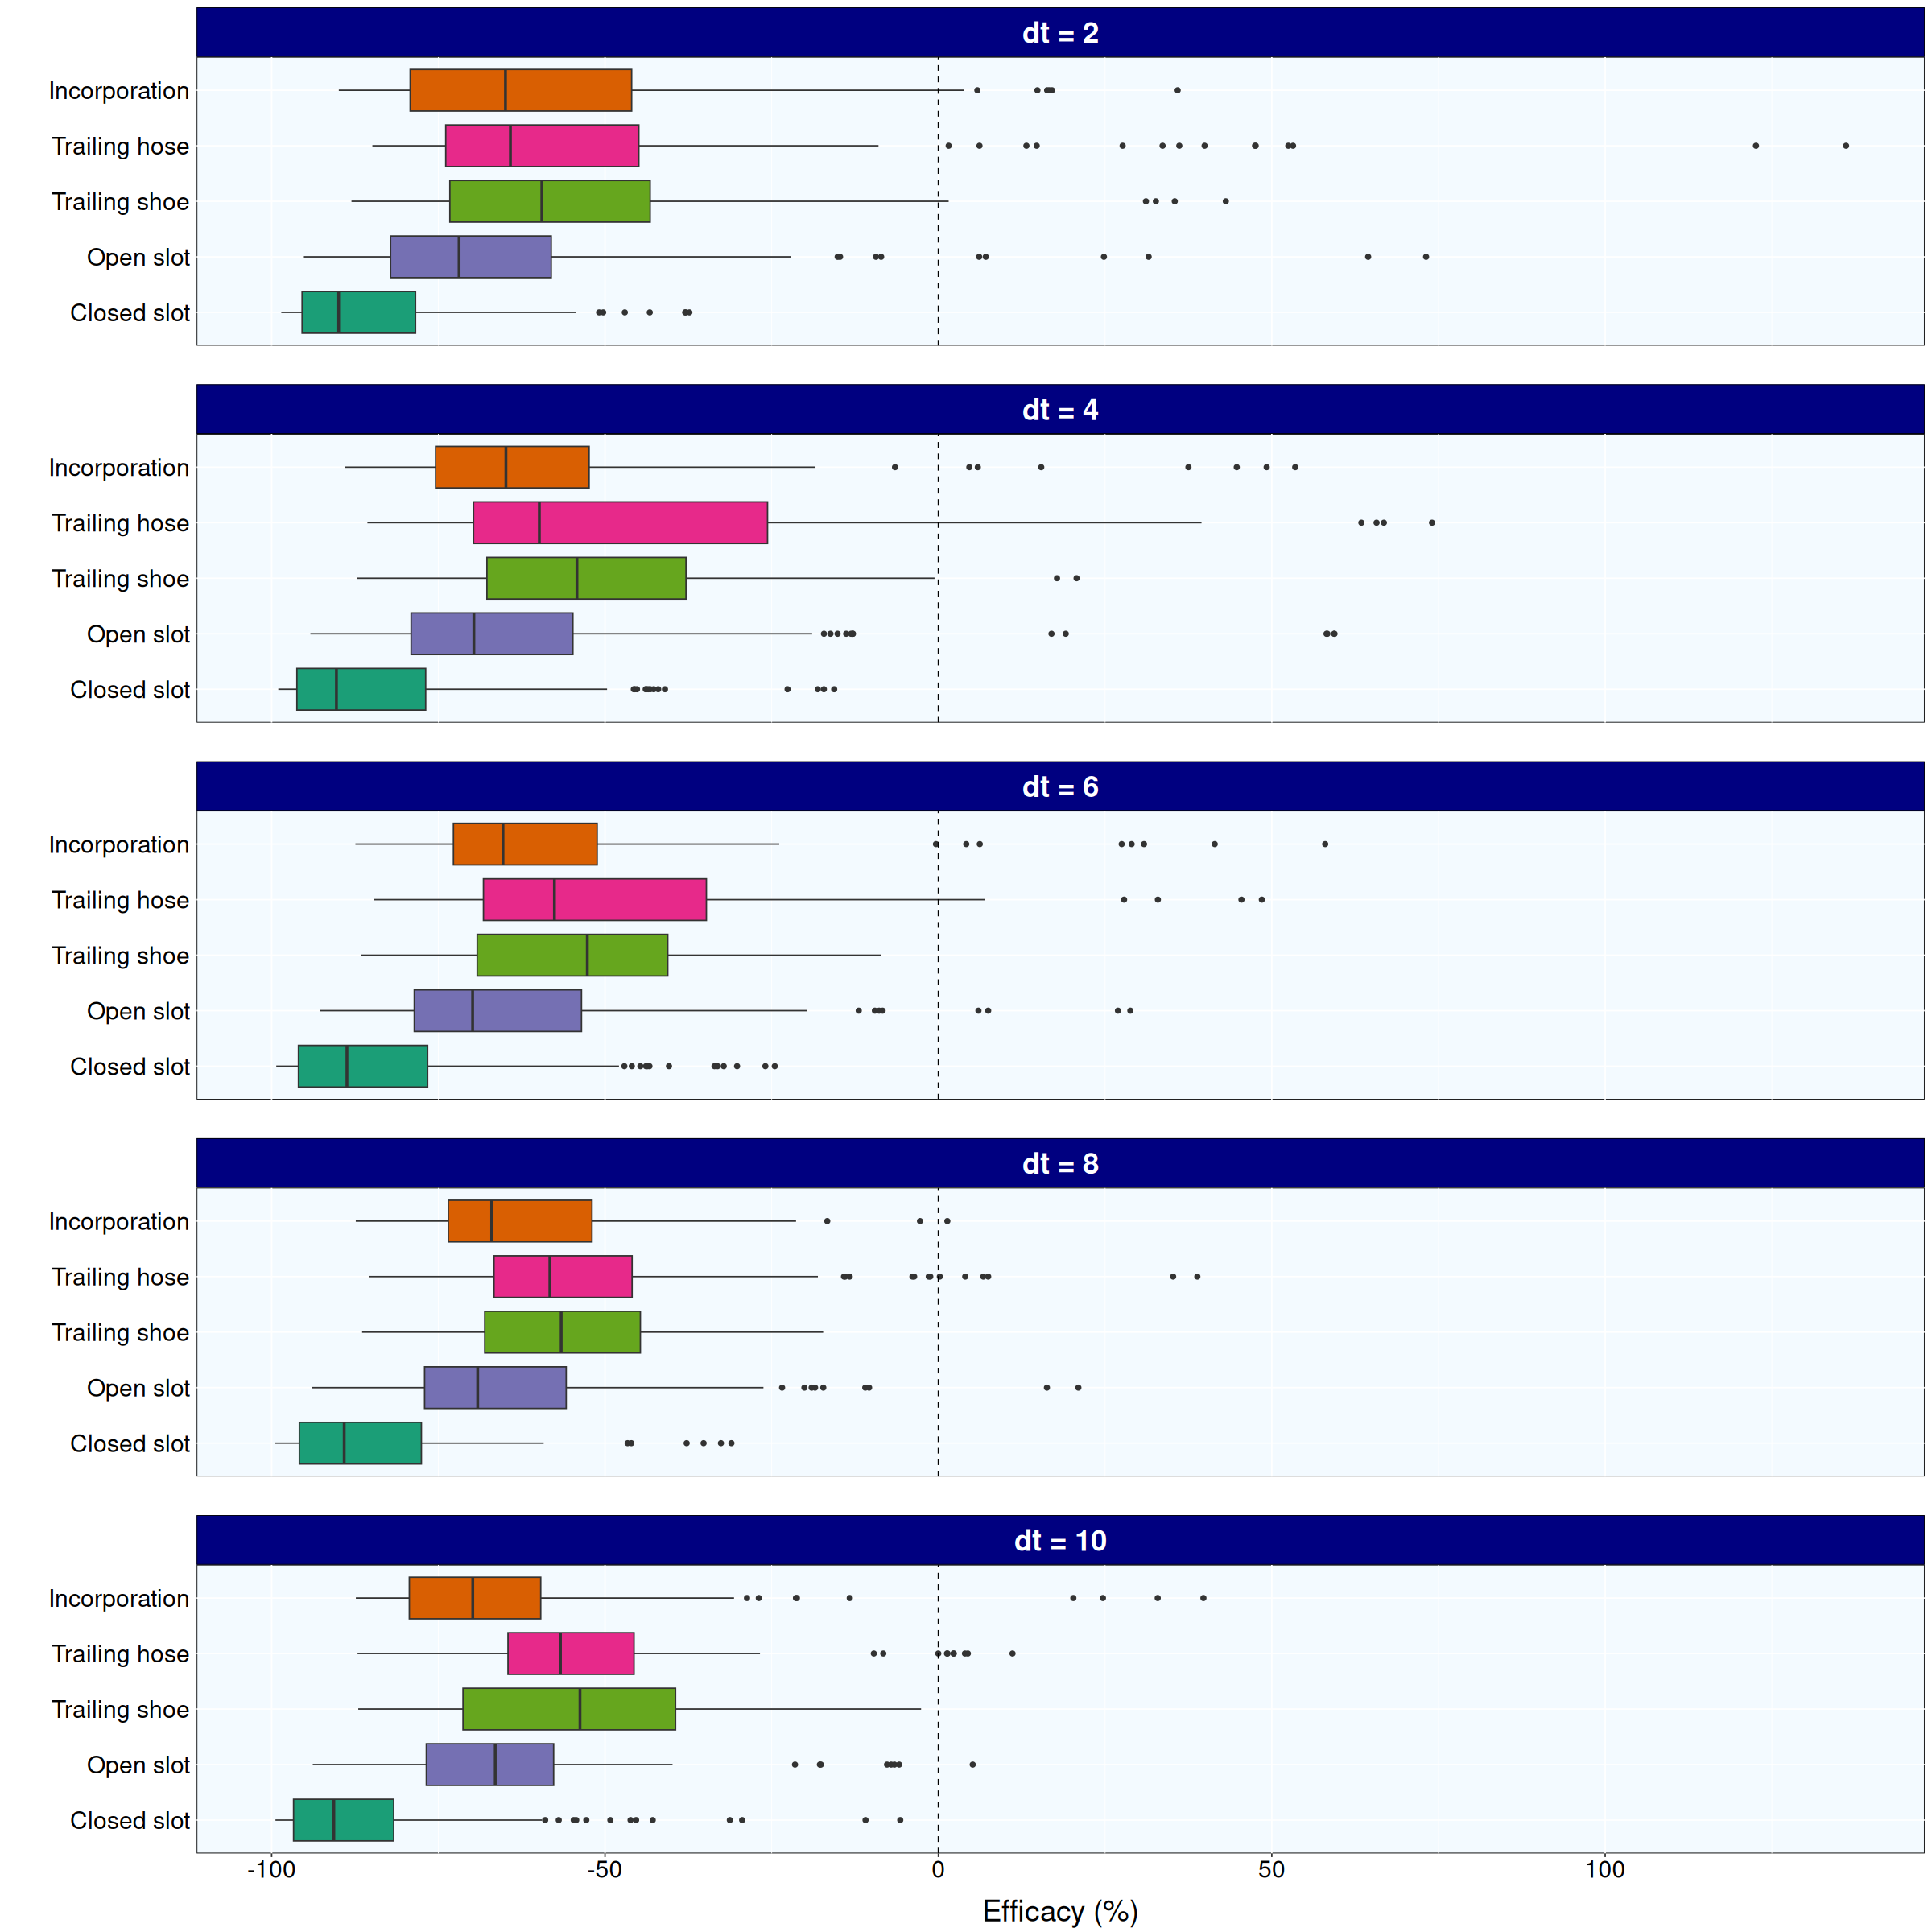

In [160]:
size (20, 20)
figure_time_sequence_effect_rnn_4 = df_efficacy_rnn_data_augmentation %>%
    filter (strategy != "Broadcast") %>% 
    
    ggplot () +
        
        geom_boxplot (aes (x = efficacy, y = strategy, fill = strategy)) +
        scale_fill_manual (values = Dark2) +
        scale_y_discrete (limits = c ("Closed slot", "Open slot", "Trailing shoe", "Trailing hose", "Incorporation")) +
        ylab ("") + xlab ("Efficacy (%)") +
        geom_vline (xintercept = 0, linetype = 2) +
        theme (legend.position = "none",
               axis.ticks.y = element_blank(),
               strip.text.x = element_text(margin = ggplot2::margin(t = 8, b = 8, r = 0, l = 0))) +
        facet_wrap (~ model, ncol = 1) +
        NULL

figure_time_sequence_effect_rnn_4

png (file = "03_images/figure_time_sequence_effect_rnn_4.png", width = 1000, height = 1000)
figure_time_sequence_effect_rnn_4
dev.off()

## Comparison

png 
  2

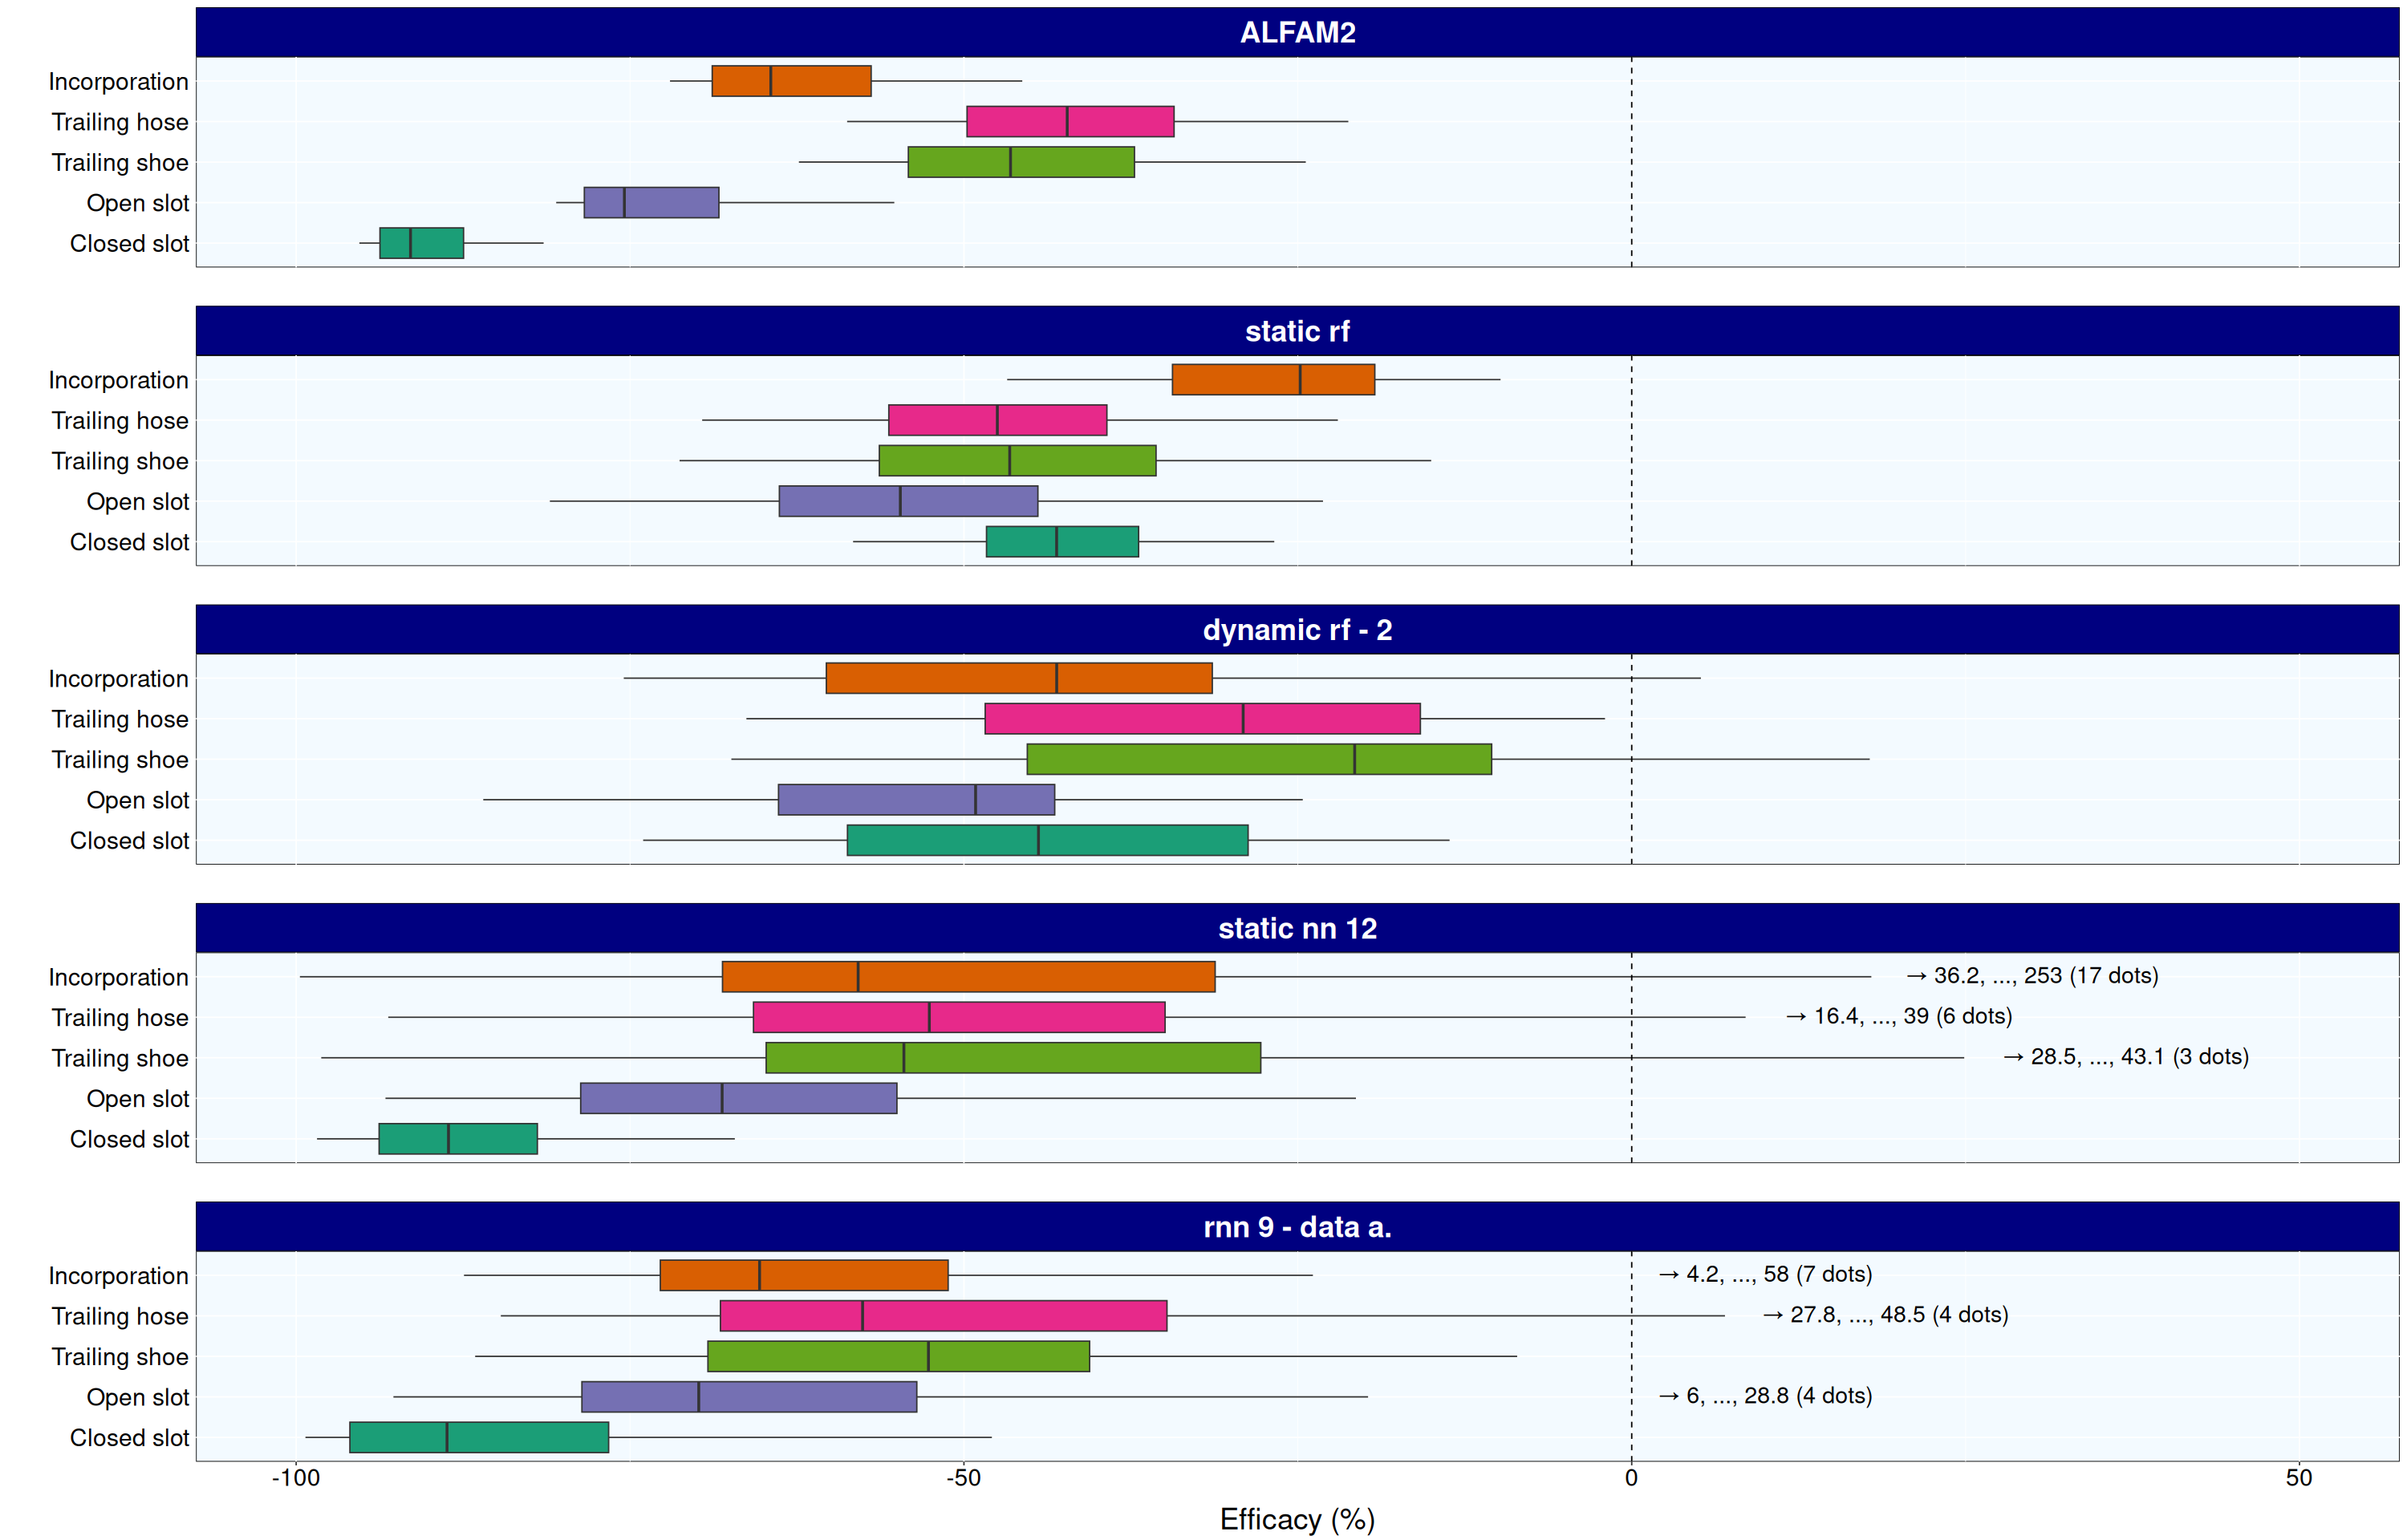

In [161]:
model_order = c ("ALFAM2", "static rf", "dynamic rf - 2", "static nn 12", "rnn 9 - data a.")

size (25, 16)
figure_boxplot_scenario_predictions = rbind (
    df_efficacy_static_rf %>% select (efficacy, model, strategy),
    df_efficacy_dynamic_rf %>% select (efficacy, model, strategy),
    df_efficacy_static_nn %>% select (efficacy, model, strategy),
    df_efficacy_ALFAM2 %>% select (efficacy, model, strategy),
    df_efficacy_rnn_data_augmentation %>% filter (model == "dt = 6") %>% select (efficacy, model, strategy)
) %>%
    mutate (model = ifelse (model == "dt = 6", "rnn 9 - data a.", model)) %>%
    filter (strategy != "Broadcast") %>%

    mutate (model = factor (model, levels = c ("ALFAM2", "static rf", "dynamic rf - 2", "static nn 12", "rnn 9 - data a."))) %>%
    
    ggplot () +
        
        geom_boxplot (aes (x = efficacy, y = strategy, fill = strategy), outlier.shape = NA) +
        scale_fill_manual (values = Dark2) +
        scale_y_discrete (limits = c ("Closed slot", "Open slot", "Trailing shoe", "Trailing hose", "Incorporation")) +
        ylab ("") + xlab ("Efficacy (%)") +
        theme (legend.position = "none",
               axis.ticks.y = element_blank(),
               strip.text.x = element_text(margin = ggplot2::margin(t = 8, b = 8, r = 0, l = 0))) +
        geom_vline (xintercept = 0, linetype = 2) +
        coord_cartesian(xlim = c(-100, 50)) +  
        geom_text (data = data.frame (model = factor("static nn 12", levels = model_order)), 
                   aes (x = 30, y = 5.05, label = "\u2192 36.2, ..., 253 (17 dots)"), size = 6) +
        geom_text (data = data.frame (model = factor("static nn 12", levels = model_order)), 
                   aes (x = 20, y = 4.05, label = "\u2192 16.4, ..., 39 (6 dots)"), size = 6) +
        geom_text (data = data.frame (model = factor("static nn 12", levels = model_order)), 
                   aes (x = 37, y = 3.05, label = "\u2192 28.5, ..., 43.1 (3 dots)"), size = 6) +
        geom_text (data = data.frame (model = factor("rnn 9 - data a.", levels = model_order)), 
                   aes (x = 10, y = 5.05, label = "\u2192 4.2, ..., 58 (7 dots)"), size = 6) +
        geom_text (data = data.frame (model = factor("rnn 9 - data a.", levels = model_order)), 
                   aes (x = 19, y = 4.05, label = "\u2192 27.8, ..., 48.5 (4 dots)"), size = 6) +
        geom_text (data = data.frame (model = factor("rnn 9 - data a.", levels = model_order)), 
                   aes (x = 10, y = 2.05, label = "\u2192 6, ..., 28.8 (4 dots)"), size = 6) +
        facet_wrap (~ model, ncol = 1) +
        NULL

figure_boxplot_scenario_predictions

png (file = "03_images/figure_boxplot_scenario_predictions.png", width = 1700, height = 1400)
figure_boxplot_scenario_predictions +
    theme (axis.text.y = element_text (size = 30)) +
    theme (strip.text = element_text (size = 32))
dev.off()

In [162]:
rbind (
    df_efficacy_static_rf %>% select (efficacy, model, strategy),
    df_efficacy_dynamic_rf %>% select (efficacy, model, strategy),
    df_efficacy_static_nn %>% select (efficacy, model, strategy),
    df_efficacy_ALFAM2 %>% select (efficacy, model, strategy),
    df_efficacy_rnn_data_augmentation %>% filter (model == "dt = 6") %>% select (efficacy, model, strategy)
) %>%
    mutate (model = ifelse (model == "dt = 6", "rnn 9 - data a.", model)) %>%
    filter (strategy != "Broadcast") %>%

    mutate (model = factor (model, levels = c ("ALFAM2", "static rf", "dynamic rf - 2", "static nn 12", "rnn 9 - data a."))) %>%

    summarise (
        mean_efficacy = mean (efficacy),
        median_efficacy = median (efficacy),
        .by = c (model, strategy)
    ) %>%
    arrange (model, desc (mean_efficacy))

model           strategy      mean_efficacy median_efficacy
1  ALFAM2          Trailing hose -41.64357     -42.26700      
2  ALFAM2          Trailing shoe -45.51393     -46.51143      
3  ALFAM2          Incorporation -62.04118     -64.46105      
4  ALFAM2          Open slot     -72.16261     -75.42339      
5  ALFAM2          Closed slot   -90.11967     -91.43710      
6  static rf       Incorporation -26.61814     -24.82241      
7  static rf       Closed slot   -42.60935     -43.06154      
8  static rf       Trailing shoe -45.37496     -46.57332      
9  static rf       Trailing hose -47.48435     -47.49861      
10 static rf       Open slot     -53.83350     -54.76239      
11 dynamic rf - 2  Trailing shoe -26.10958     -20.74392      
12 dynamic rf - 2  Trailing hose -32.51798     -29.09303      
13 dynamic rf - 2  Incorporation -43.10548     -43.05622      
14 dynamic rf - 2  Closed slot   -44.53708     -44.41892      
15 dynamic rf - 2  Open slot     -53.57604     -49.12802      
16 static nn 12    Incorporation -33.20965     -57.92209      
17 static nn 12    Trailing shoe -44.64030     -54.49528      
18 static nn 12    Trailing hose -47.84071     -52.59099      
19 static nn 12    Open slot     -64.85346     -68.10484      
20 static nn 12    Closed slot   -87.10337     -88.59434      
21 rnn 9 - data a. Trailing hose -48.15289     -57.58779      
22 rnn 9 - data a. Trailing shoe -53.80425     -52.65683      
23 rnn 9 - data a. Incorporation -58.30218     -65.30213      
24 rnn 9 - data a. Open slot     -62.30823     -69.85598      
25 rnn 9 - data a. Closed slot   -81.95139     -88.70515

Positive efficacy for the 'static nn 12' and 'rnn 9 - data a.' models:

In [163]:
df_efficacy_static_nn %>% filter (strategy == "Incorporation") %>% arrange (desc (efficacy)) %>% head (n = 17) %>% pull (efficacy) %>% round (digits = 1)

[1] 253.0 205.0 189.4 189.3 169.5 152.9 121.3 118.3 113.1 107.9  95.7  85.9
[13]  62.0  51.6  49.8  46.5  36.2

In [164]:
df_efficacy_static_nn %>% filter (strategy == "Trailing hose") %>% arrange (desc (efficacy)) %>% head (n = 6) %>% pull (efficacy) %>% round (digits = 1)

[1] 39.0 37.7 34.9 29.9 17.5 16.4

In [165]:
df_efficacy_static_nn %>% filter (strategy == "Trailing shoe") %>% arrange (desc (efficacy)) %>% head (n = 3) %>% pull (efficacy) %>% round (digits = 1)

[1] 43.1 31.2 28.5

In [166]:
df_efficacy_rnn_data_augmentation %>% 
    filter (seq == 6) %>% filter (strategy == "Incorporation") %>% arrange (desc (efficacy)) %>% head (n = 7) %>% pull (efficacy) %>% round (digits = 1)

[1] 58.0 41.4 30.8 29.0 27.5  6.2  4.2

In [167]:
df_efficacy_rnn_data_augmentation %>% 
    filter (seq == 6) %>% filter (strategy == "Trailing hose") %>% arrange (desc (efficacy)) %>% head (n = 4) %>% pull (efficacy) %>% round (digits = 1)

[1] 48.5 45.5 32.9 27.8

In [168]:
df_efficacy_rnn_data_augmentation %>% 
    filter (seq == 6) %>% filter (strategy == "Open slot") %>% arrange (desc (efficacy)) %>% head (n = 4) %>% pull (efficacy) %>% round (digits = 1)

[1] 28.8 26.9  7.5  6.0

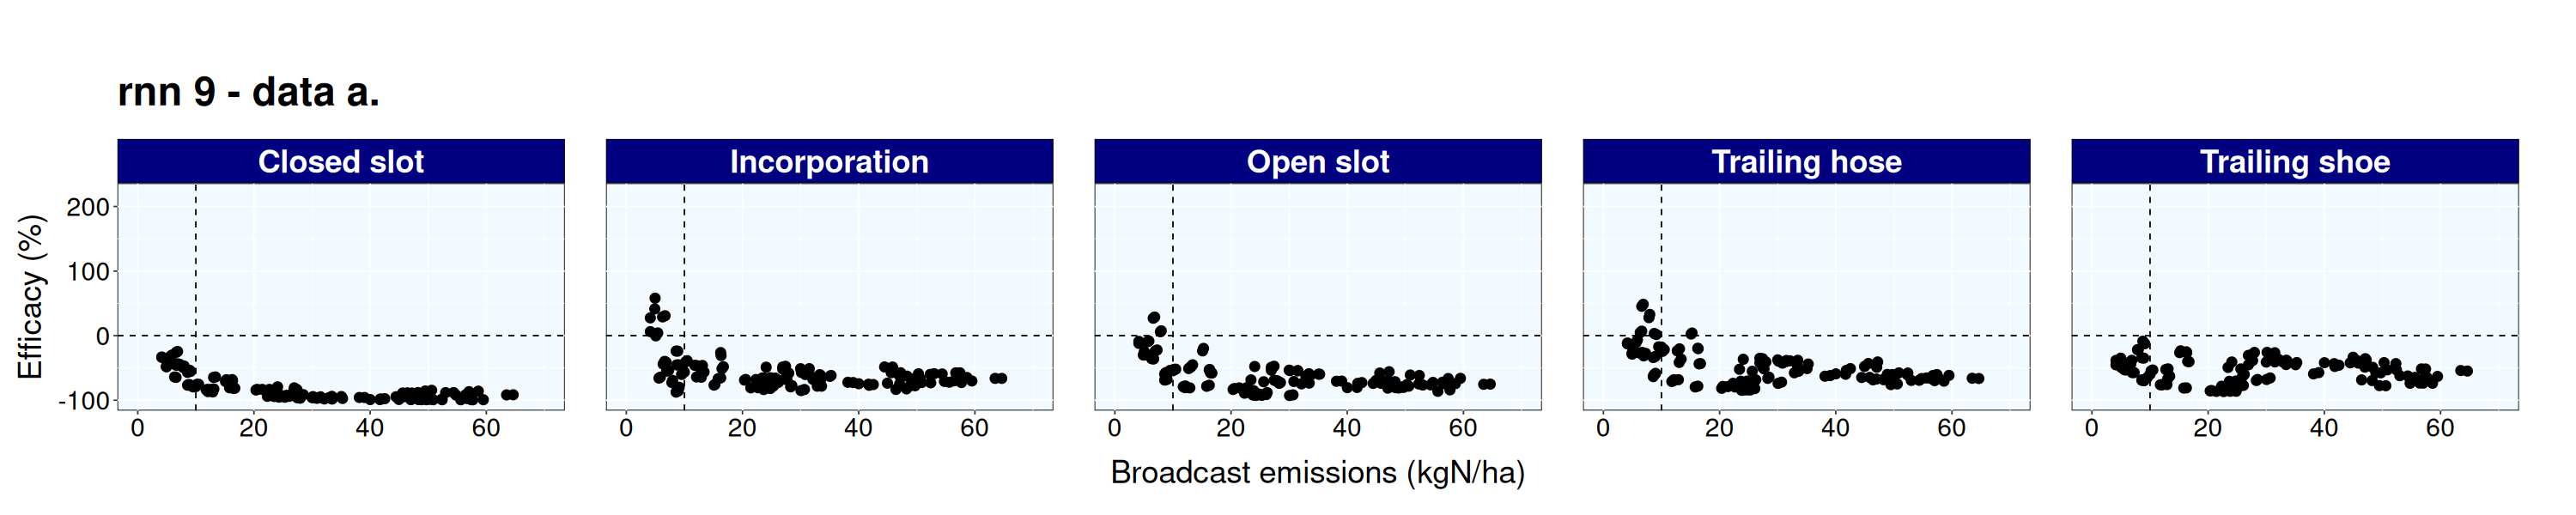

In [169]:
size (25, 5)
efficacy_vs_bc_emissions_rnn = df_efficacy_rnn_data_augmentation %>% filter (model == "dt = 6") %>%
    select (strategy, scenario, prediction_ecum, efficacy) %>%
    mutate (prediction_ecum_bc = prediction_ecum[strategy == "Broadcast"], .by = scenario) %>%
    filter (strategy != "Broadcast") %>%
    ggplot () +
        geom_point (aes (y = efficacy, x = prediction_ecum_bc)) +
        facet_wrap (~ strategy, nrow = 1) +
        xlab ("Broadcast emissions (kgN/ha)") +
        geom_vline (xintercept = 10, linetype = 2) +
        expand_limits (x = c (0, 70), y = c (- 100, 220)) +
        geom_hline (yintercept = 0, linetype = 2) +
        theme (plot.margin = ggplot2::margin (30, 40, 20, 10, "pt")) +
        ggtitle ("rnn 9 - data a.") +
        theme (plot.title = element_text (hjust = 0)) +
        ylab ("Efficacy (%)")

efficacy_vs_bc_emissions_rnn

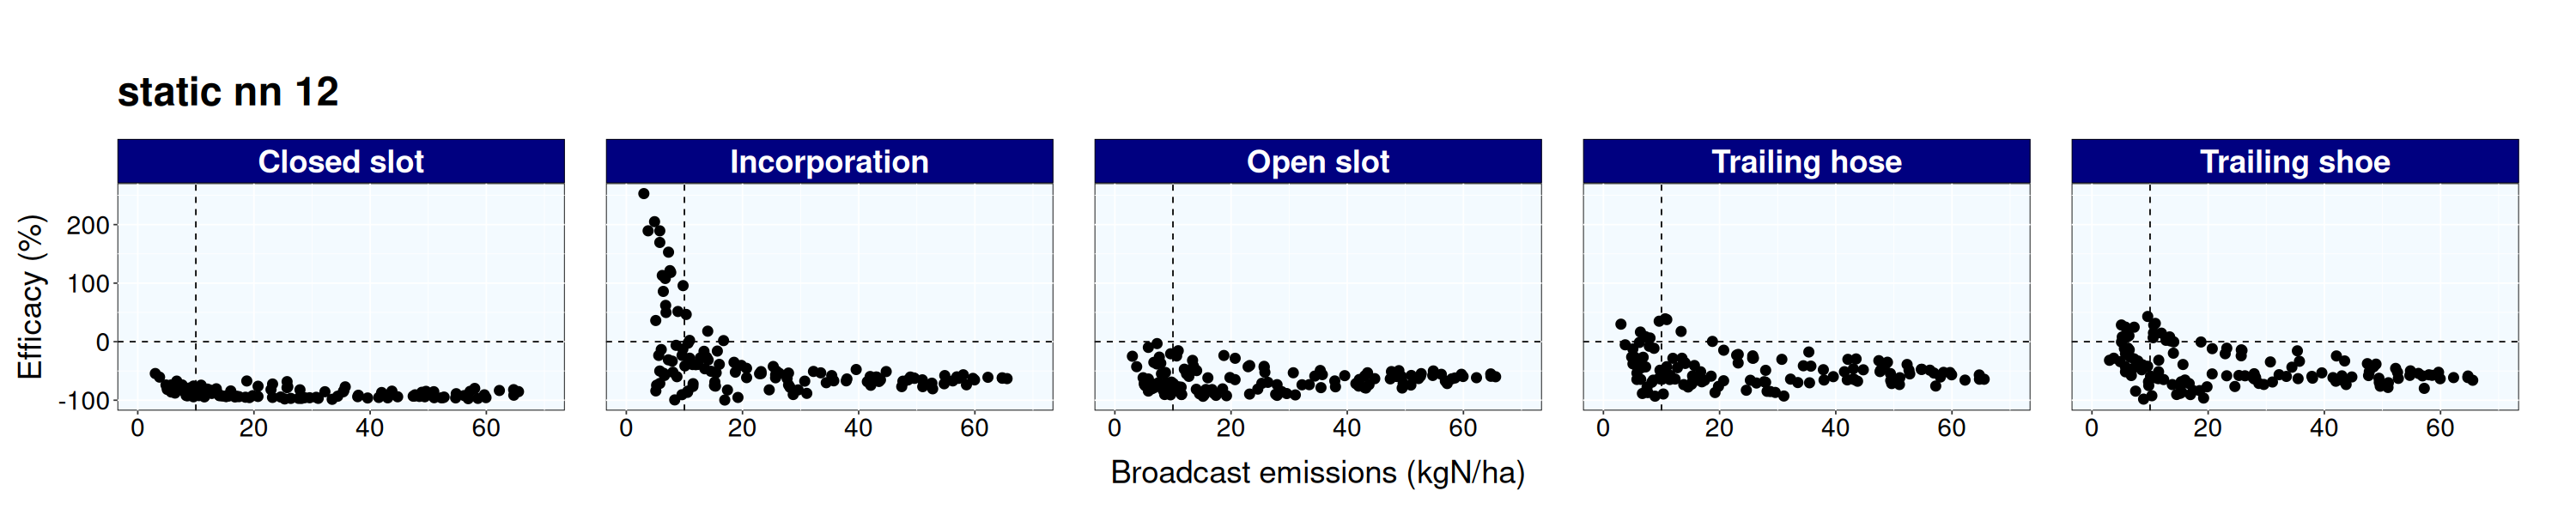

In [170]:
efficacy_vs_bc_emissions_static_nn = df_efficacy_static_nn %>%
    select (strategy, scenario, prediction_ecum, efficacy) %>%
    mutate (prediction_ecum_bc = prediction_ecum[strategy == "Broadcast"], .by = scenario) %>%
    filter (strategy != "Broadcast") %>%
    ggplot () +
        geom_point (aes (y = efficacy, x = prediction_ecum_bc)) +
        facet_wrap (~ strategy, nrow = 1) +
        xlab ("Broadcast emissions (kgN/ha)") +
        geom_vline (xintercept = 10, linetype = 2) +
        expand_limits (x = c (0, 70), y = c (- 100, 220)) +
        geom_hline (yintercept = 0, linetype = 2) +
        theme (plot.margin = ggplot2::margin (30, 40, 20, 10, "pt")) +
        ggtitle ("static nn 12") +
        theme (plot.title = element_text (hjust = 0)) +
        ylab ("Efficacy (%)")

efficacy_vs_bc_emissions_static_nn

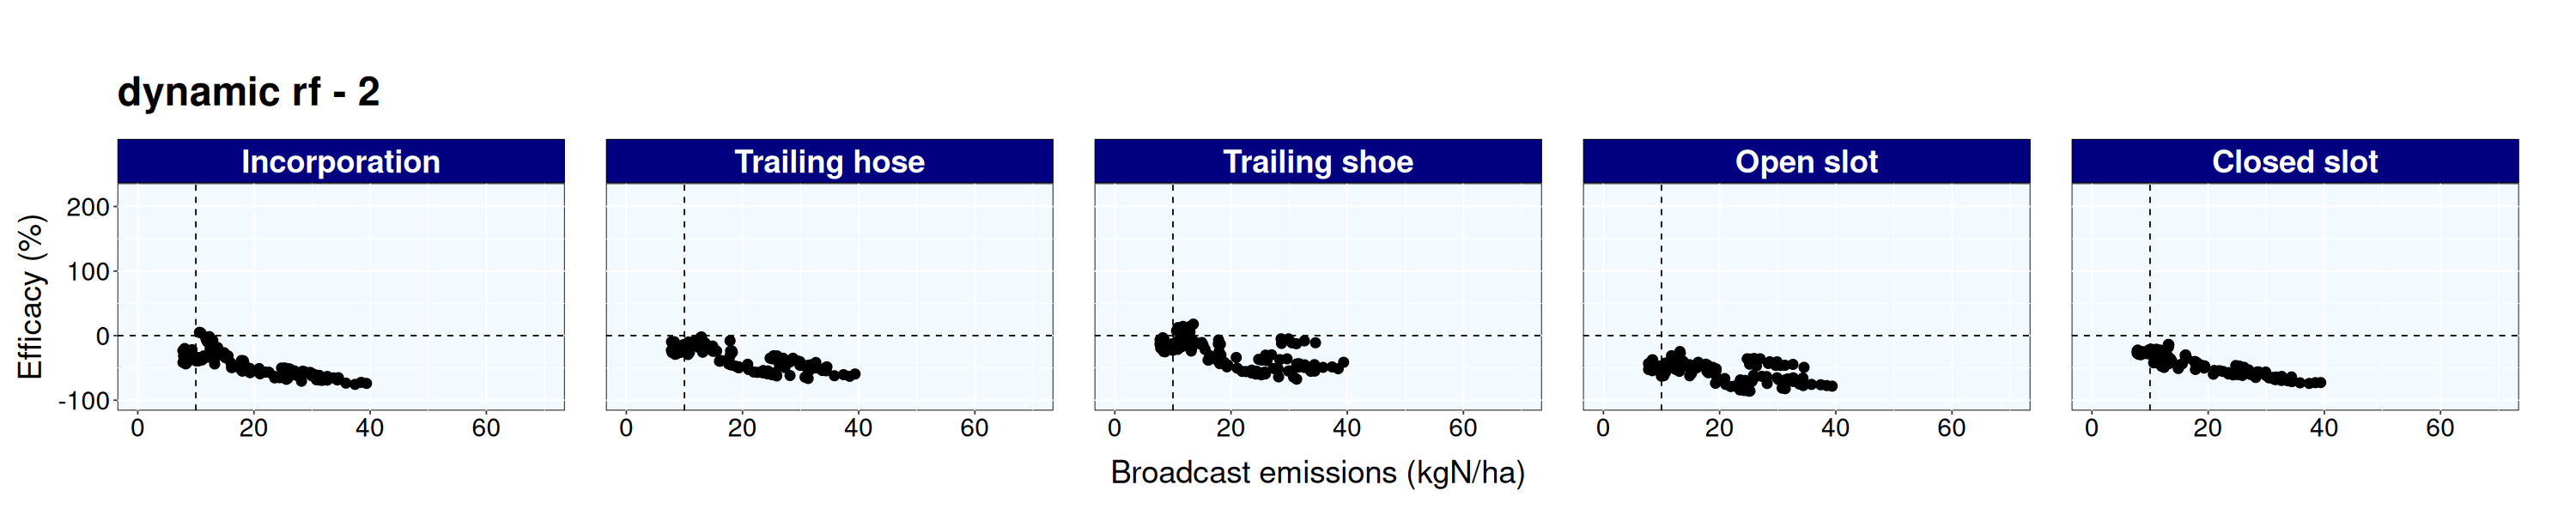

In [171]:
size (25, 5)
efficacy_vs_bc_emissions_dynamic_random_forest = df_efficacy_dynamic_rf %>%
    mutate (strategy = factor (strategy, levels = c ("Broadcast", "Incorporation", "Trailing hose", "Trailing shoe", "Open slot", "Closed slot"))) %>%
    select (strategy, scenario, prediction_ecum = e.cum_hat, efficacy) %>%
    mutate (prediction_ecum_bc = prediction_ecum[strategy == "Broadcast"], .by = scenario) %>%
    filter (strategy != "Broadcast") %>%
    ggplot () +
        geom_point (aes (y = efficacy, x = prediction_ecum_bc)) +
        facet_wrap (~ strategy, nrow = 1) +
        xlab ("Broadcast emissions (kgN/ha)") +
        geom_vline (xintercept = 10, linetype = 2) +
        geom_hline (yintercept = 0, linetype = 2) +
        expand_limits (x = c (0, 70), y = c (- 100, 220)) +
        theme (plot.margin = ggplot2::margin (30, 40, 20, 10, "pt")) +
        ggtitle ("dynamic rf - 2") +
        theme (plot.title = element_text (hjust = 0)) +
        ylab ("Efficacy (%)")

efficacy_vs_bc_emissions_dynamic_random_forest

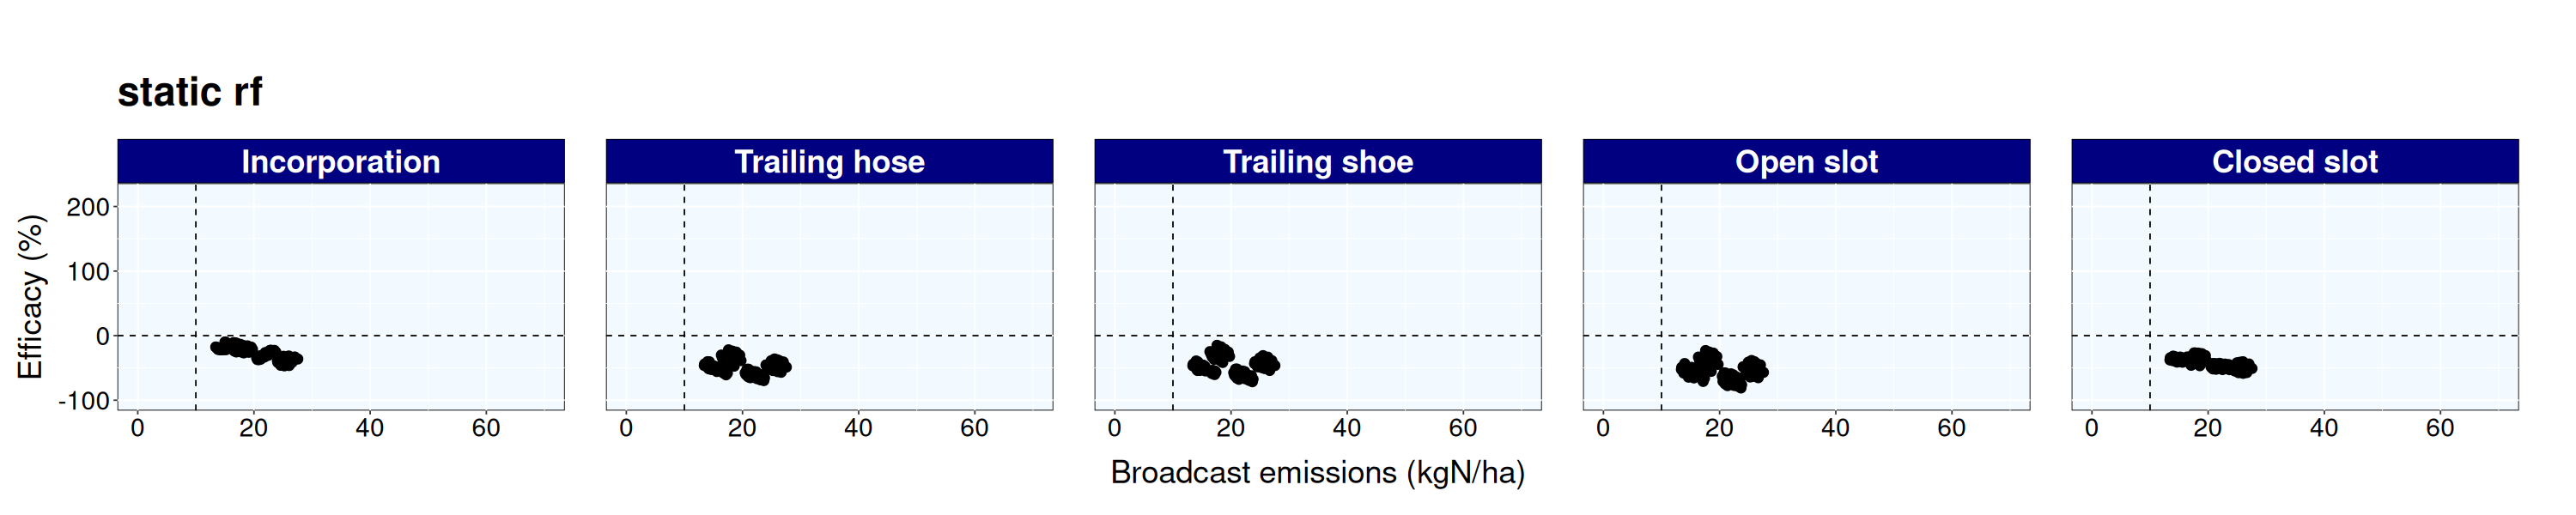

In [172]:
size (25, 5)
efficacy_vs_bc_emissions_static_random_forest = df_efficacy_static_rf %>%
    mutate (strategy = factor (strategy, levels = c ("Broadcast", "Incorporation", "Trailing hose", "Trailing shoe", "Open slot", "Closed slot"))) %>%
    select (strategy, scenario, prediction_ecum = e.cum_hat, efficacy) %>%
    mutate (prediction_ecum_bc = prediction_ecum[strategy == "Broadcast"], .by = scenario) %>%
    filter (strategy != "Broadcast") %>%
    ggplot () +
        geom_point (aes (y = efficacy, x = prediction_ecum_bc)) +
        facet_wrap (~ strategy, nrow = 1) +
        xlab ("Broadcast emissions (kgN/ha)") +
        geom_vline (xintercept = 10, linetype = 2) +
        geom_hline (yintercept = 0, linetype = 2) +
        expand_limits (x = c (0, 70), y = c (- 100, 220)) +
        theme (plot.margin = ggplot2::margin (30, 40, 20, 10, "pt")) +
        ggtitle ("static rf") +
        theme (plot.title = element_text (hjust = 0)) +
        ylab ("Efficacy (%)")

efficacy_vs_bc_emissions_static_random_forest

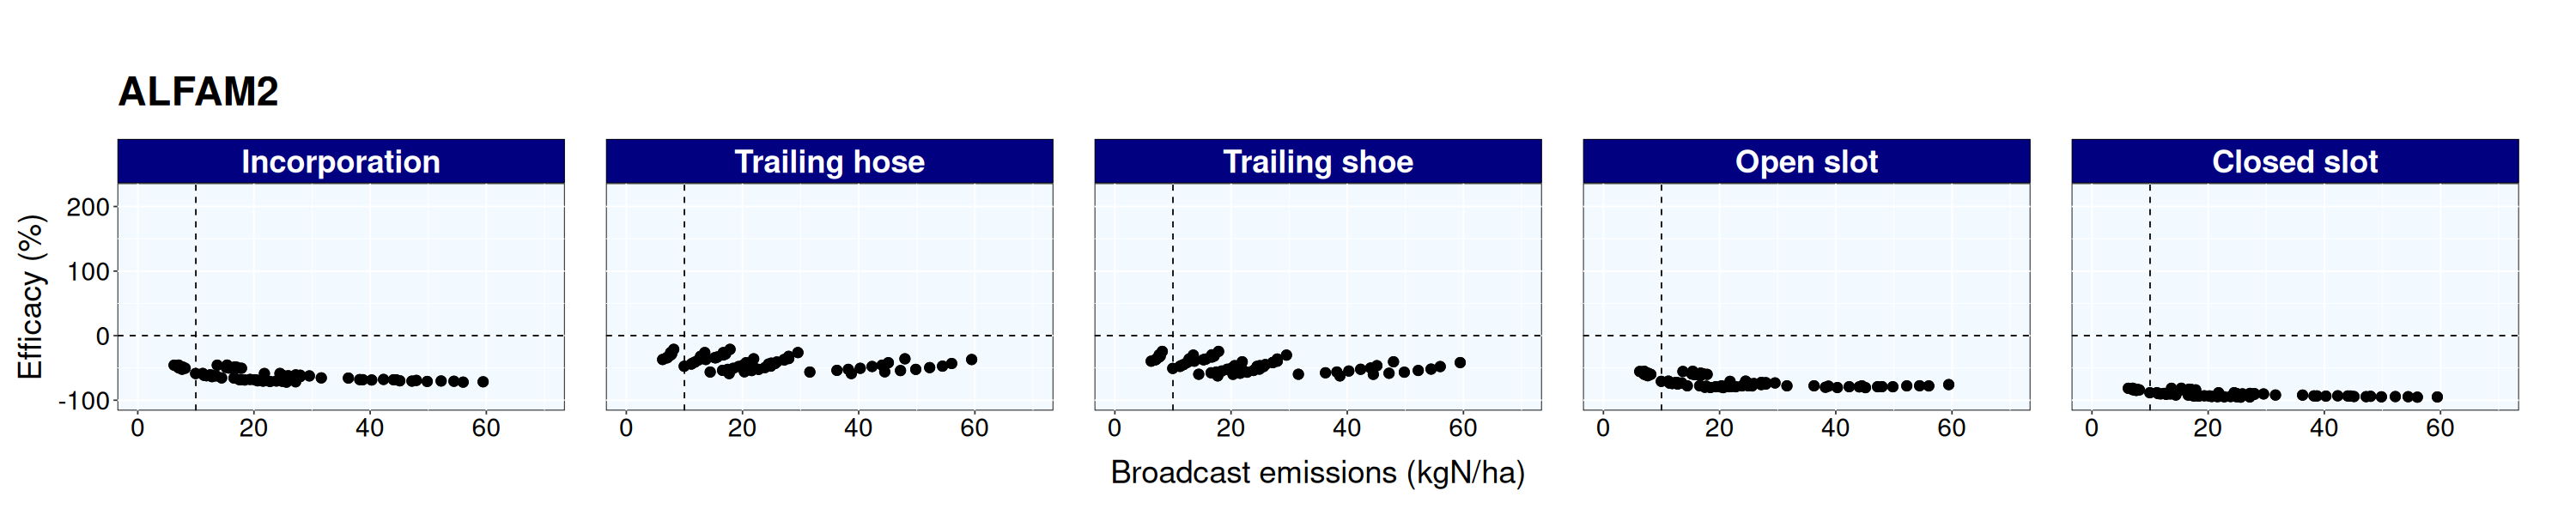

In [173]:
size (25, 5)
efficacy_vs_bc_emissions_ALFAM2 = df_efficacy_ALFAM2 %>%
    mutate (strategy = factor (strategy, levels = c ("Broadcast", "Incorporation", "Trailing hose", "Trailing shoe", "Open slot", "Closed slot"))) %>%
    select (strategy, scenario, prediction_ecum, efficacy) %>%
    mutate (prediction_ecum_bc = prediction_ecum[strategy == "Broadcast"], .by = scenario) %>%
    filter (strategy != "Broadcast") %>%
    ggplot () +
        geom_point (aes (y = efficacy, x = prediction_ecum_bc)) +
        facet_wrap (~ strategy, nrow = 1) +
        xlab ("Broadcast emissions (kgN/ha)") +
        geom_vline (xintercept = 10, linetype = 2) +
        geom_hline (yintercept = 0, linetype = 2) +
        expand_limits (x = c (0, 70), y = c (- 100, 220)) +
        theme (plot.margin = ggplot2::margin (30, 40, 20, 10, "pt")) +
        ggtitle ("ALFAM2") +
        theme (plot.title = element_text (hjust = 0)) +
        ylab ("Efficacy (%)")

efficacy_vs_bc_emissions_ALFAM2

png 
  2

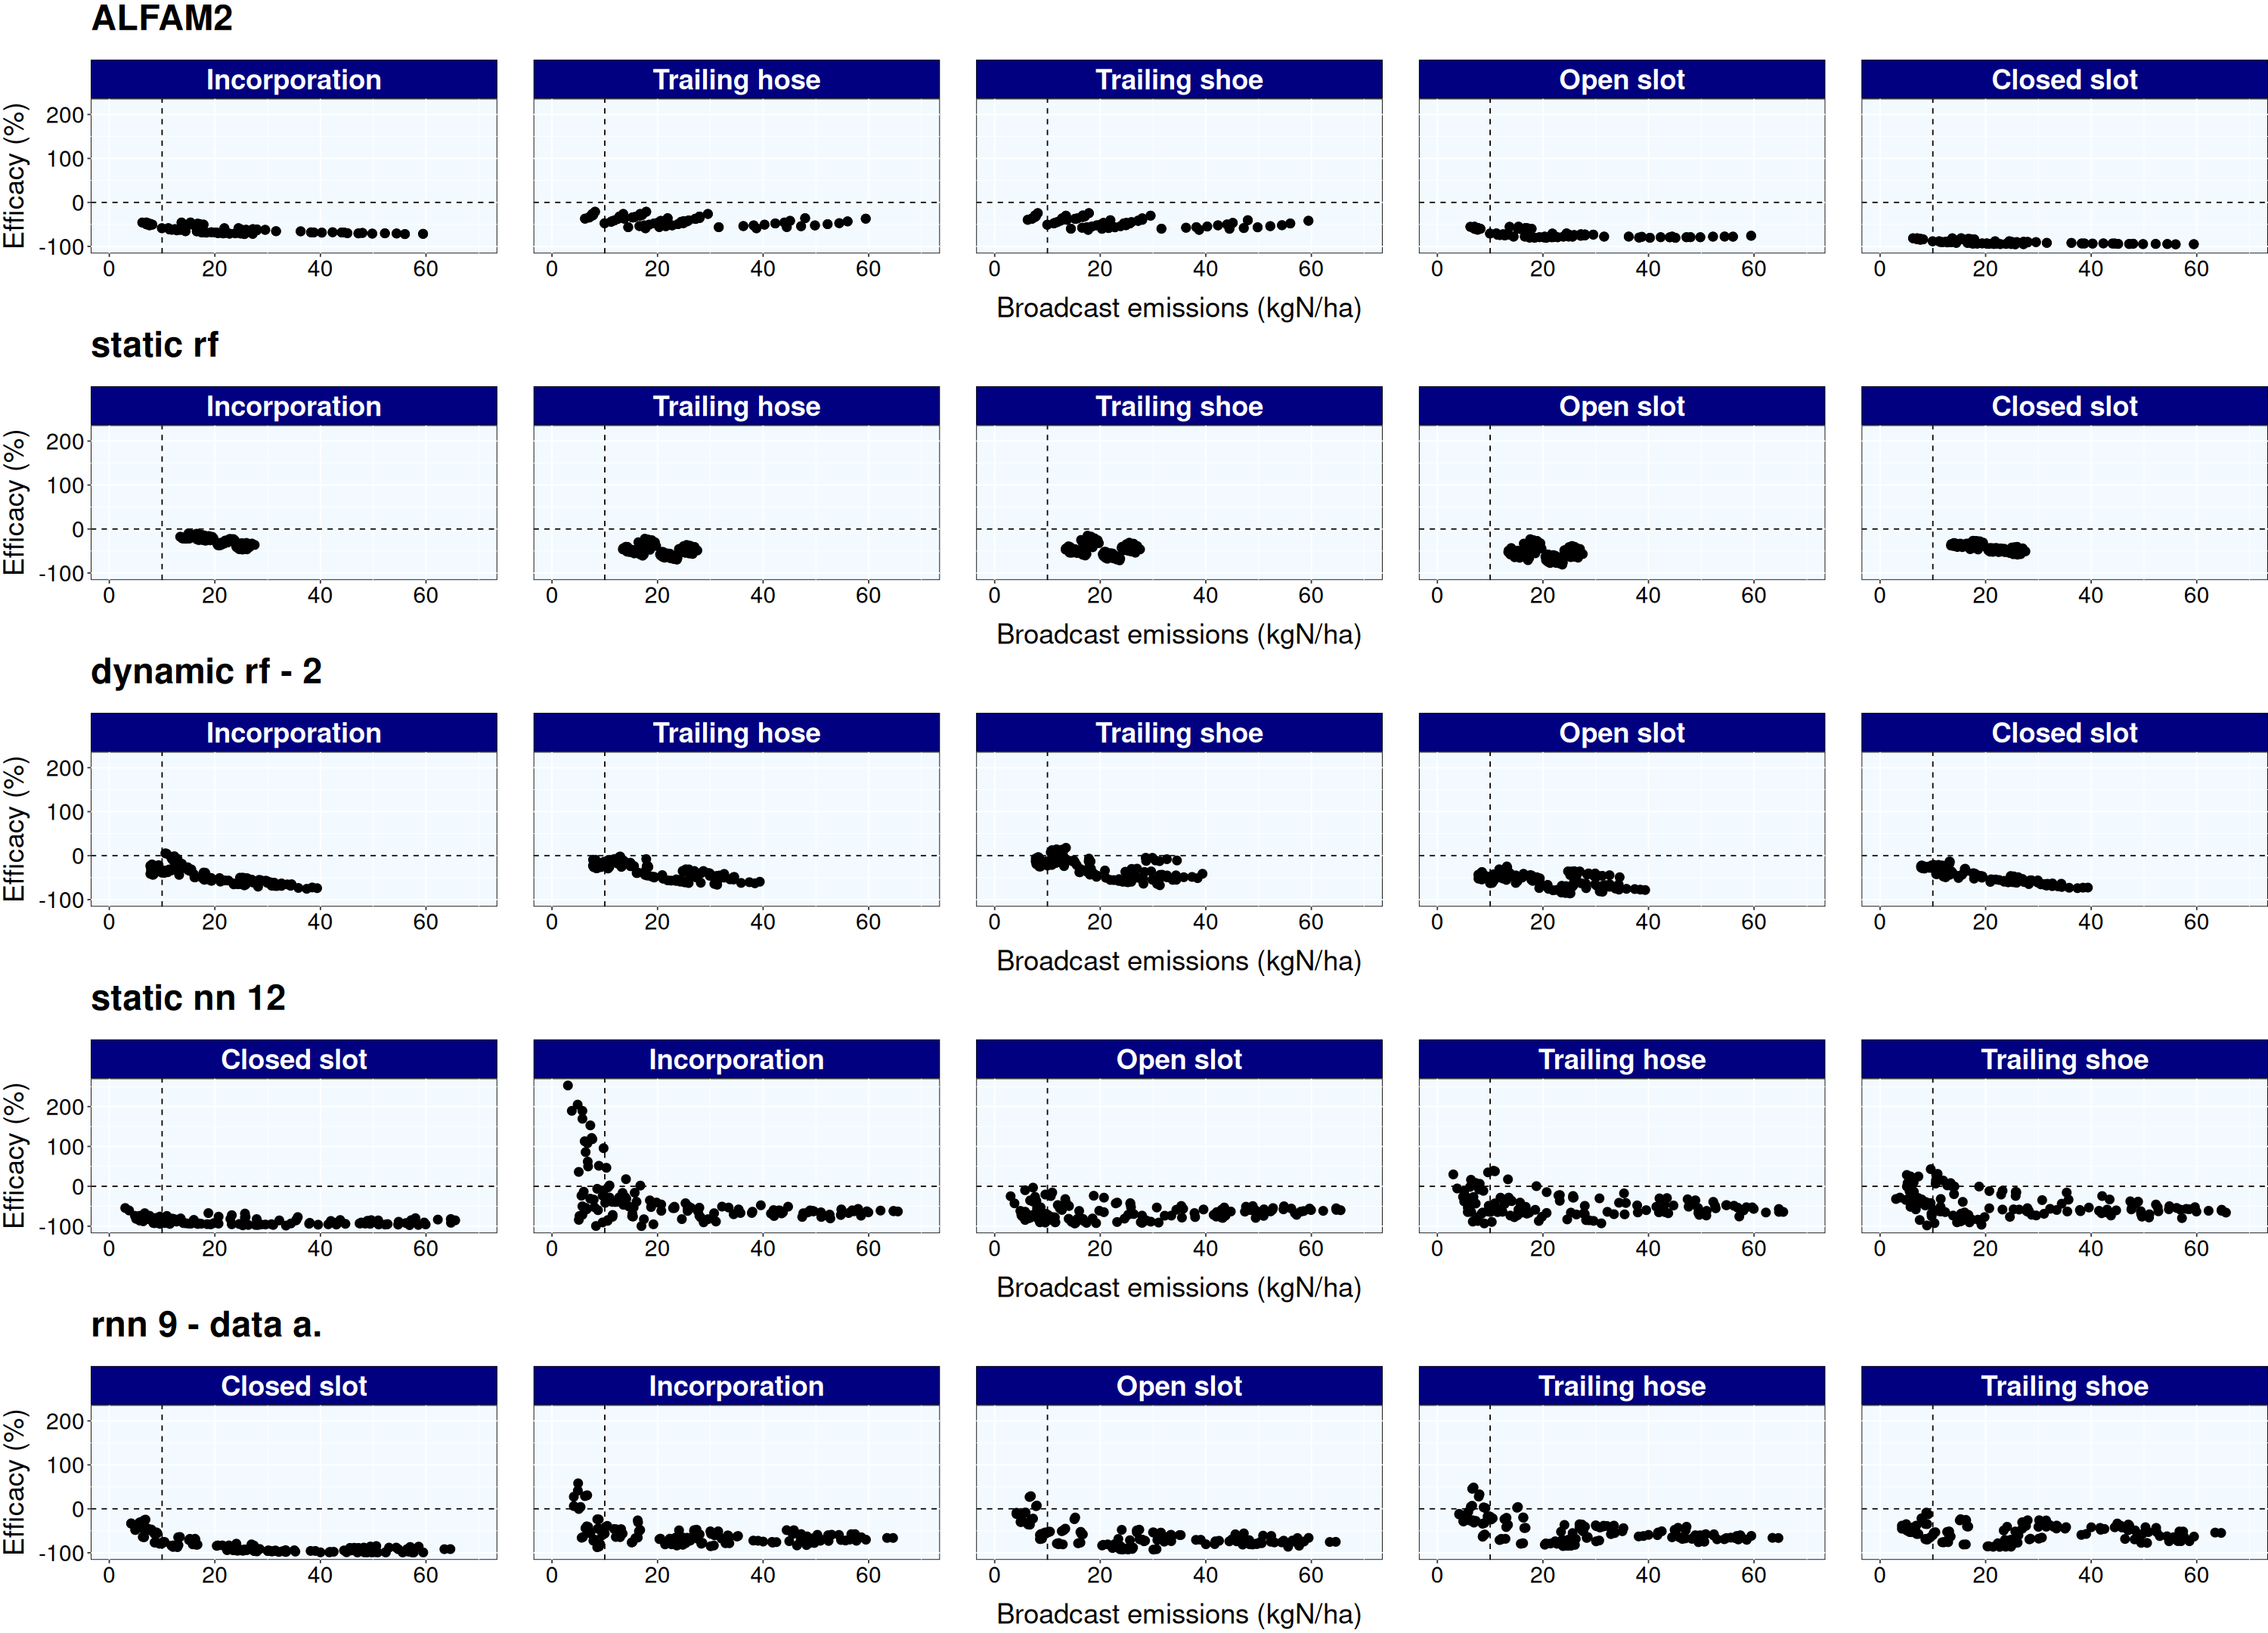

In [175]:
size (25, 18)
x = 5
y = - 20
grid.arrange (
    efficacy_vs_bc_emissions_ALFAM2 + theme (plot.margin = ggplot2::margin (y, 0, x, 0)),
    efficacy_vs_bc_emissions_static_random_forest + theme (plot.margin = ggplot2::margin (y, 0, x, 0)),
    efficacy_vs_bc_emissions_dynamic_random_forest + theme (plot.margin = ggplot2::margin (y, 0, x, 0)),
    efficacy_vs_bc_emissions_static_nn + theme (plot.margin = ggplot2::margin (y, 0, x, 0)), 
    efficacy_vs_bc_emissions_rnn + theme (plot.margin = ggplot2::margin (y, 0, x, 0)),
    ncol = 1
)

png (file = "03_images/figure_positive_efficacies.png", width = 1400, height = 1400)
grid.arrange (
    efficacy_vs_bc_emissions_ALFAM2 + theme (plot.margin = ggplot2::margin (y, 0, x, 0)),
    efficacy_vs_bc_emissions_static_random_forest + theme (plot.margin = ggplot2::margin (y, 0, x, 0)),
    efficacy_vs_bc_emissions_dynamic_random_forest + theme (plot.margin = ggplot2::margin (y, 0, x, 0)),
    efficacy_vs_bc_emissions_static_nn + theme (plot.margin = ggplot2::margin (y, 0, x, 0)), 
    efficacy_vs_bc_emissions_rnn + theme (plot.margin = ggplot2::margin (y, 0, x, 0)),
    ncol = 1
)
dev.off()

# End